In [4]:
###📄 Introduction: India’s GDP and Its Future Outlook
###India’s Gross Domestic Product (GDP) represents the overall economic performance of the country and has been a critical indicator of its growth trajectory over the decades. As one of the fastest-growing major economies, India has shown remarkable resilience and expansion despite global economic challenges. Historically, India’s GDP has seen steady growth, particularly post-1991 liberalization, driven by the service sector, industrial advancements, and strong domestic consumption.
###Using the available historical GDP data from 1960 to 2020, we analyzed the trend and projected the GDP for the years 2021 to 2025 using a linear regression model. The model suggests a continued upward trajectory for India’s economy. According to the predictions:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
file_path = r'C:\Users\Osama\OneDrive\Desktop\BrainyBeam\archive\gdp.csv' # replace with your actual file path
data = pd.read_csv(file_path)


In [9]:
print(data.head())

                  Country Name Code          1960          1961          1962  \
0                        Aruba  ABW           NaN           NaN           NaN   
1  Africa Eastern and Southern  AFE  1.931311e+10  1.972349e+10  2.149392e+10   
2                  Afghanistan  AFG  5.377778e+08  5.488889e+08  5.466667e+08   
3   Africa Western and Central  AFW  1.040428e+10  1.112805e+10  1.194335e+10   
4                       Angola  AGO           NaN           NaN           NaN   

           1963          1964          1965          1966          1967  ...  \
0           NaN           NaN           NaN           NaN           NaN  ...   
1  2.573321e+10  2.352744e+10  2.681057e+10  2.915216e+10  3.017317e+10  ...   
2  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09  ...   
3  1.267652e+10  1.383858e+10  1.486247e+10  1.583285e+10  1.442643e+10  ...   
4           NaN           NaN           NaN           NaN           NaN  ...   

           2012          2013   

In [11]:
countries = data['Country Name'].unique()


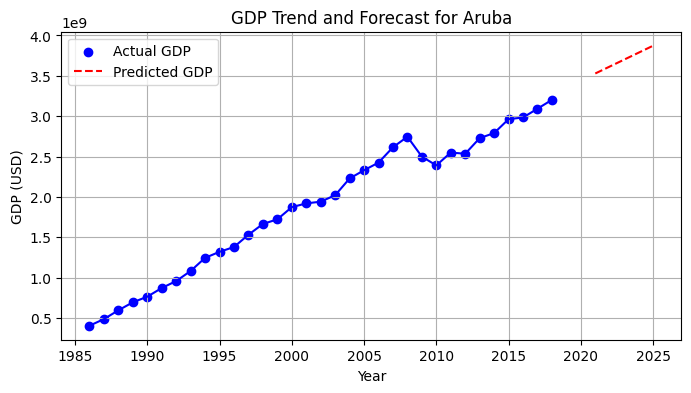

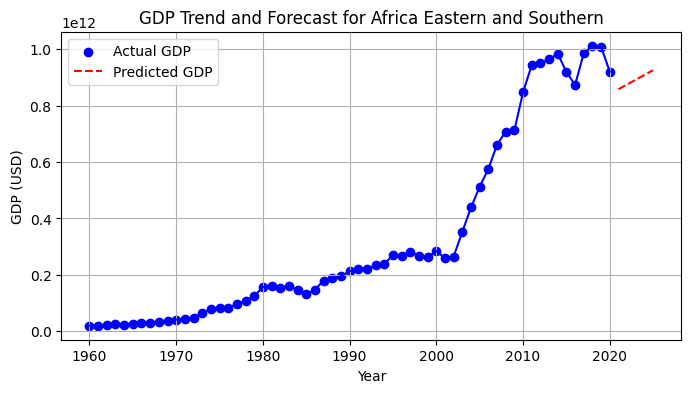

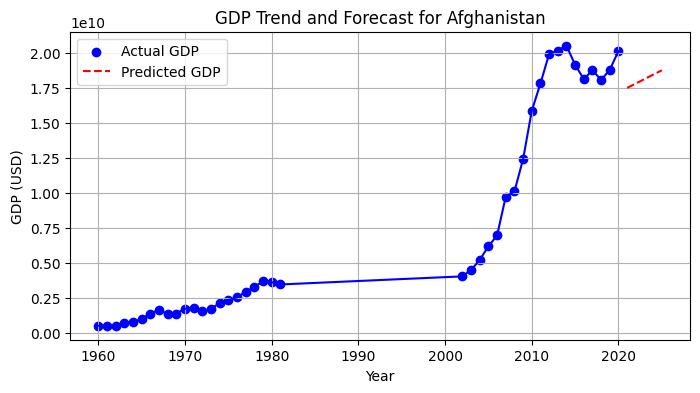

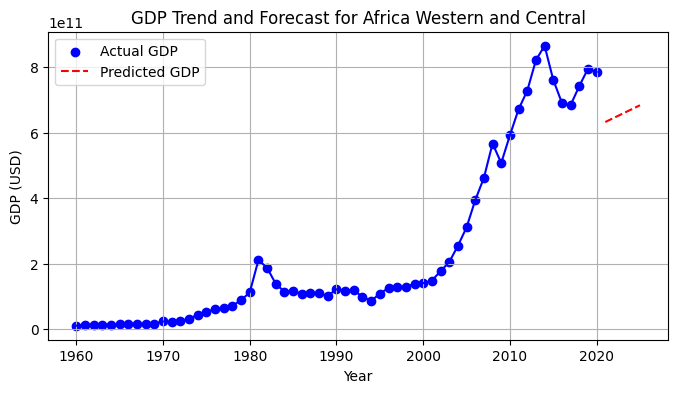

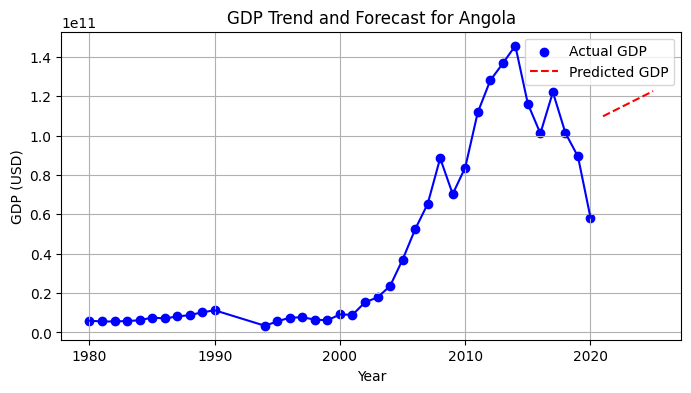

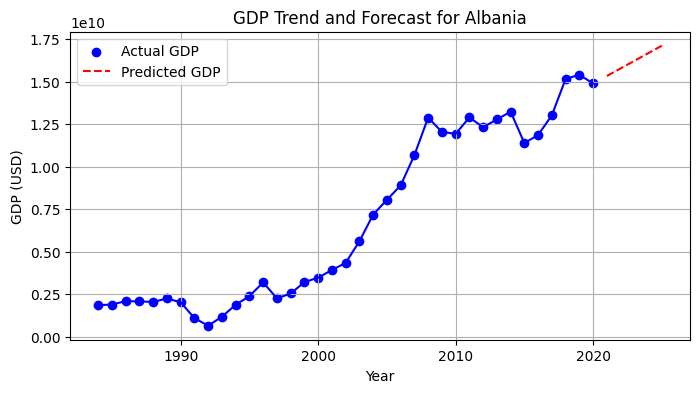

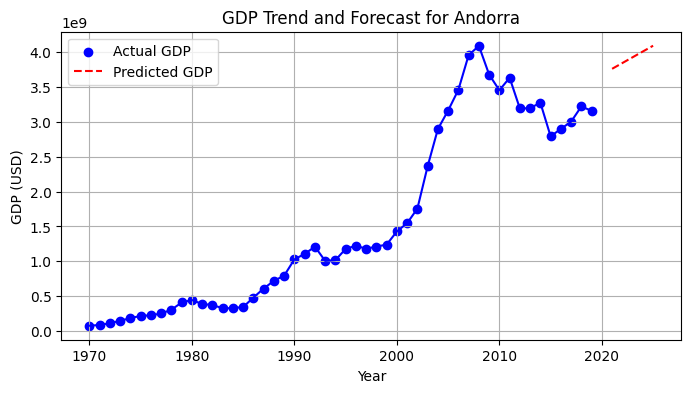

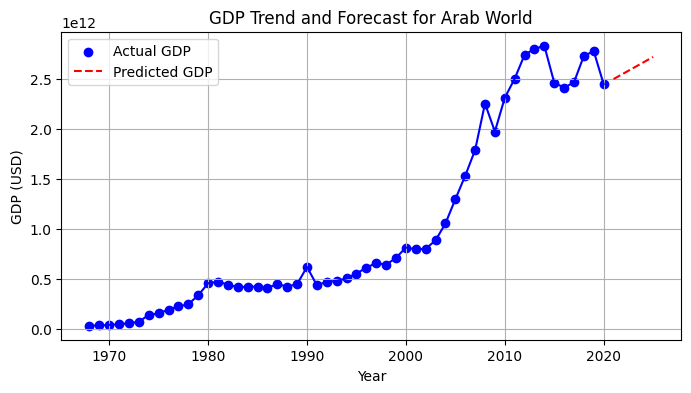

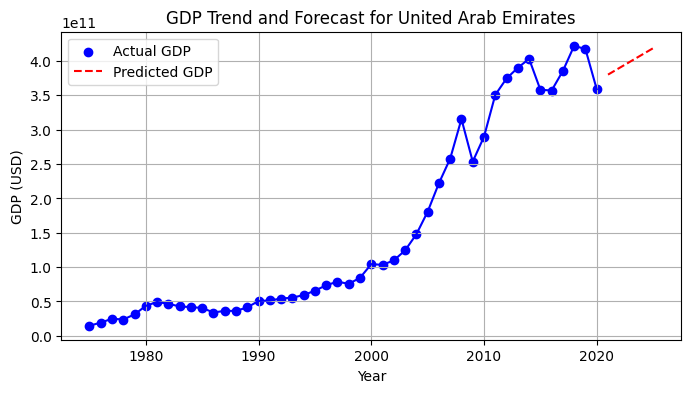

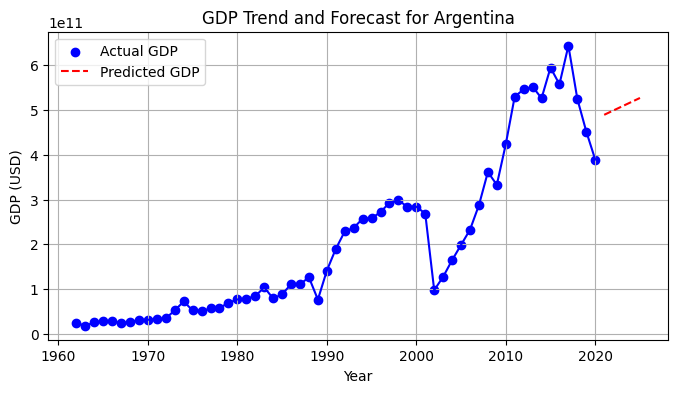

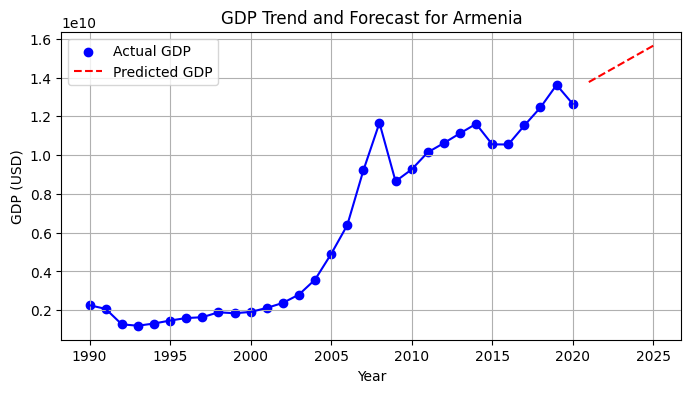

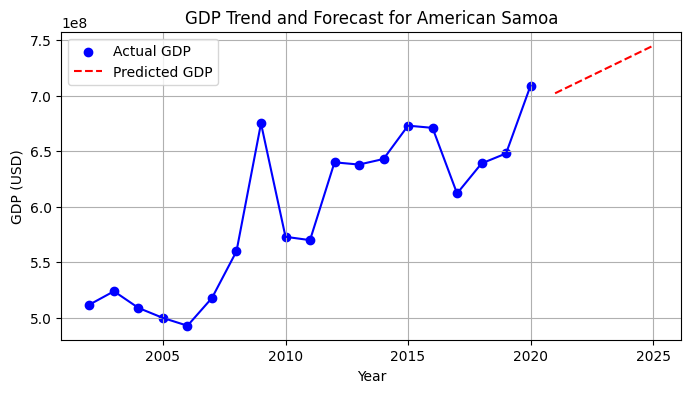

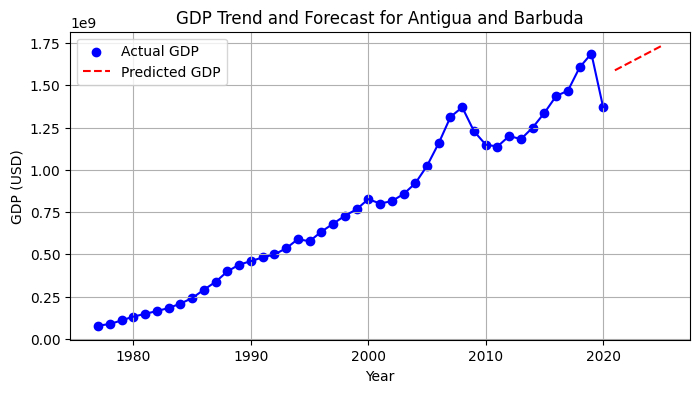

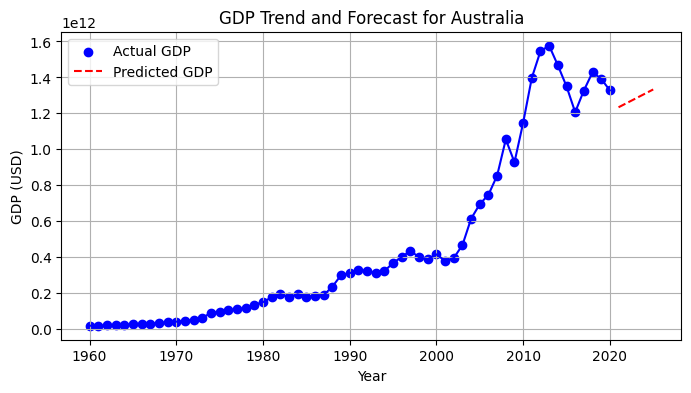

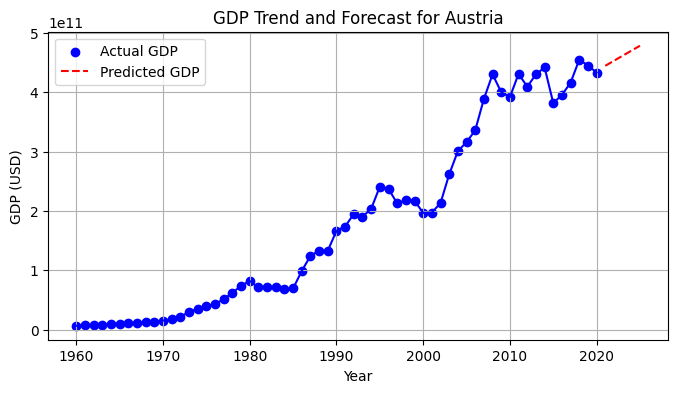

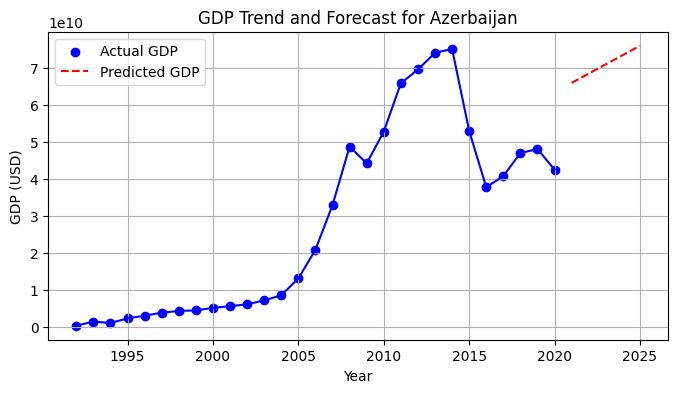

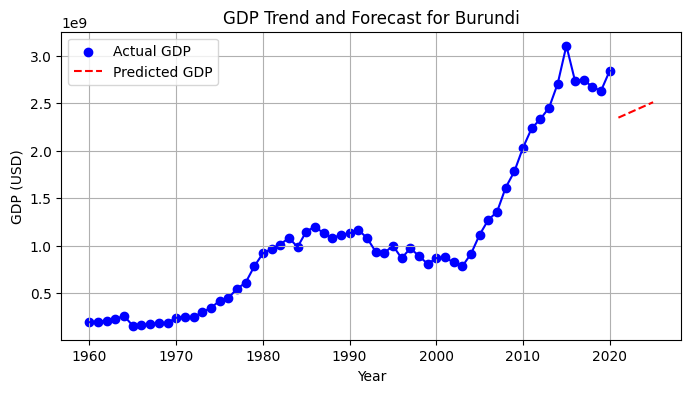

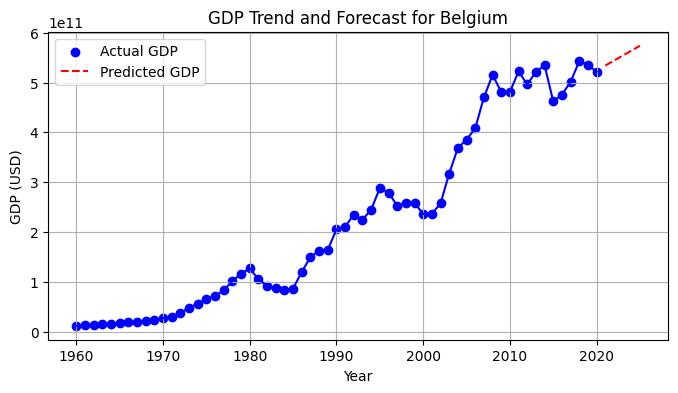

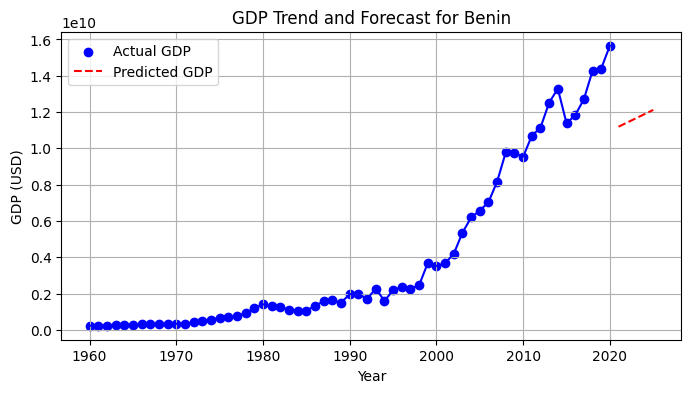

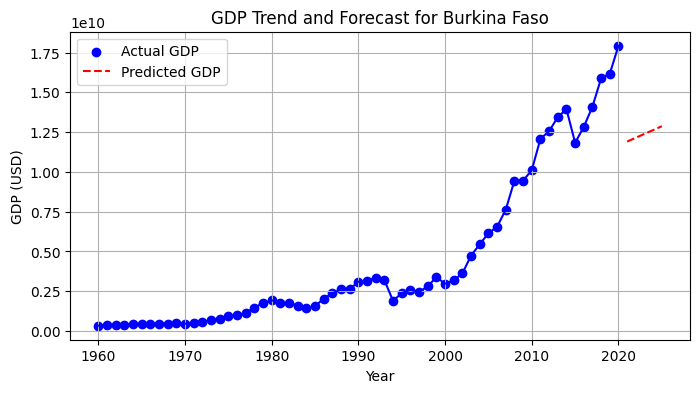

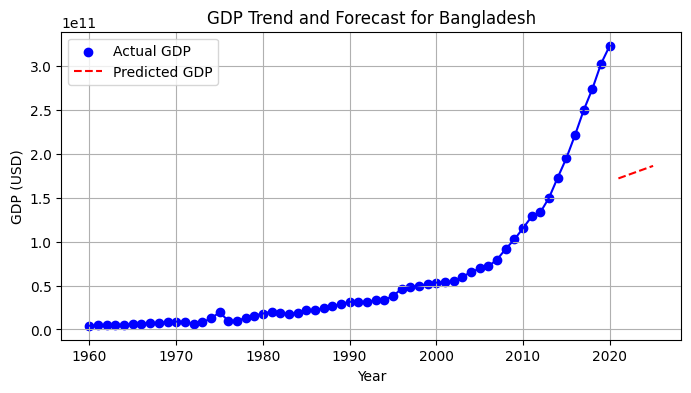

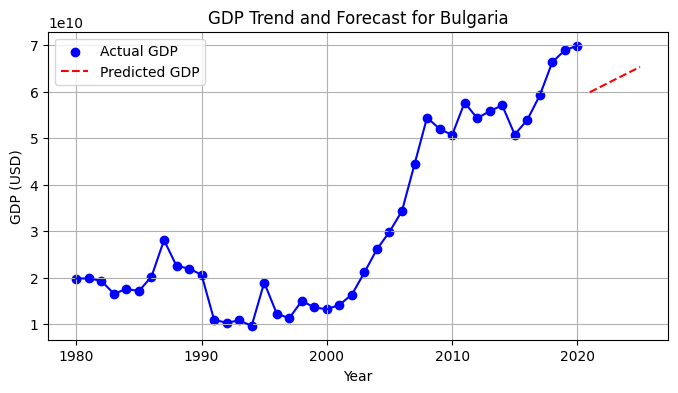

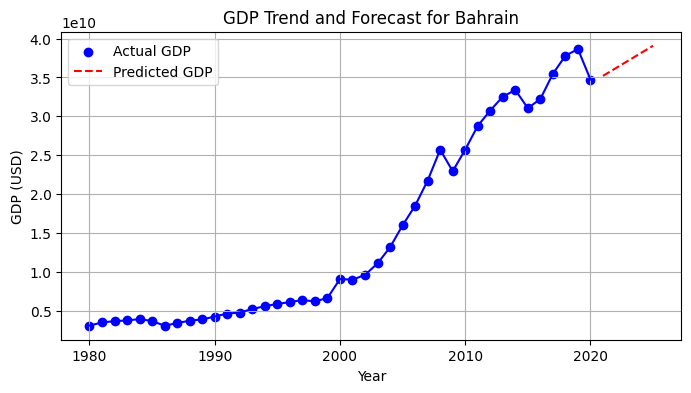

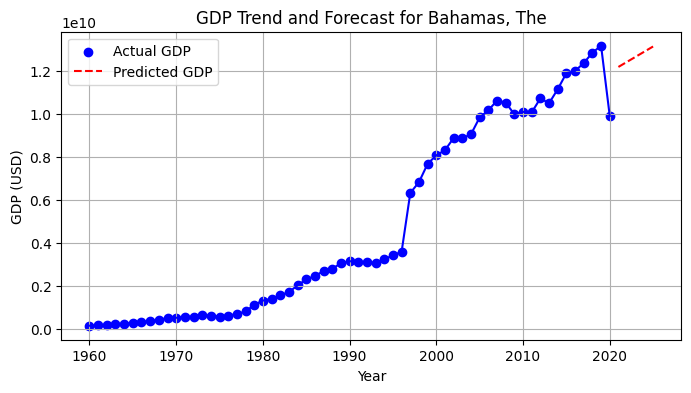

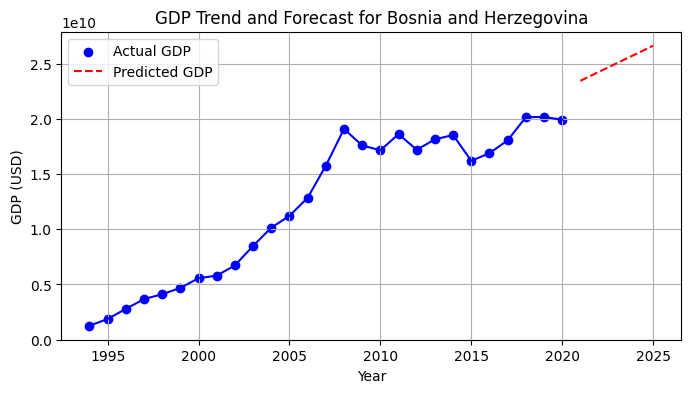

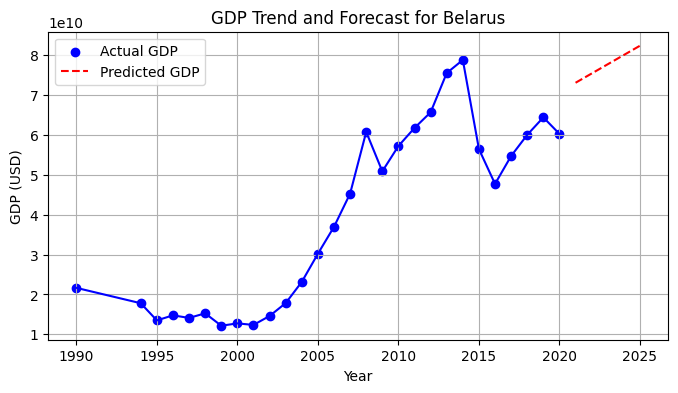

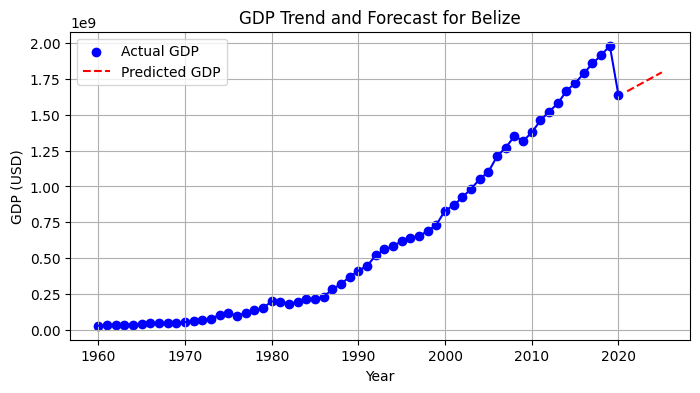

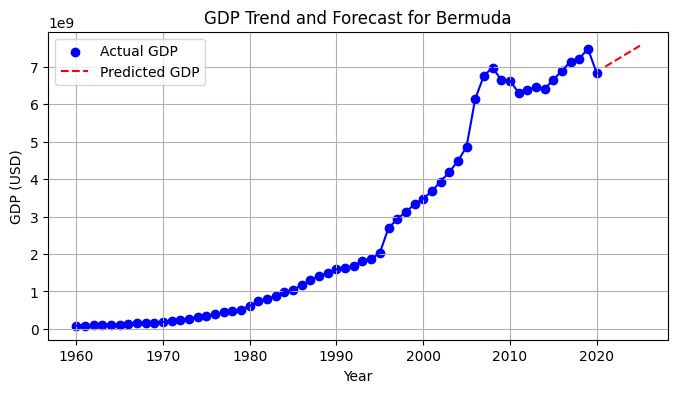

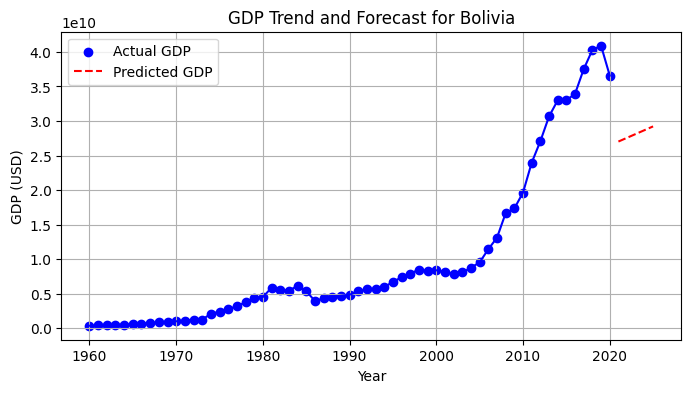

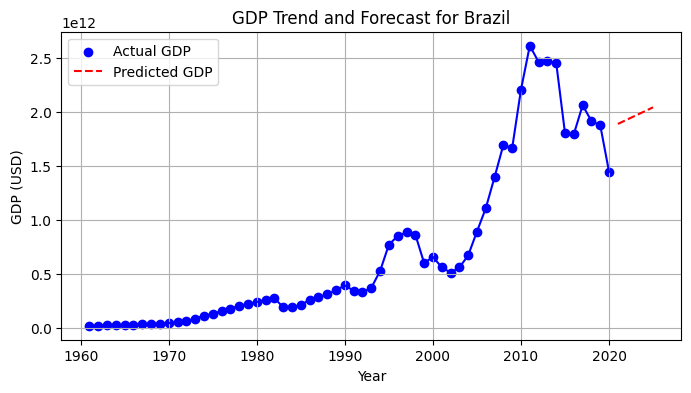

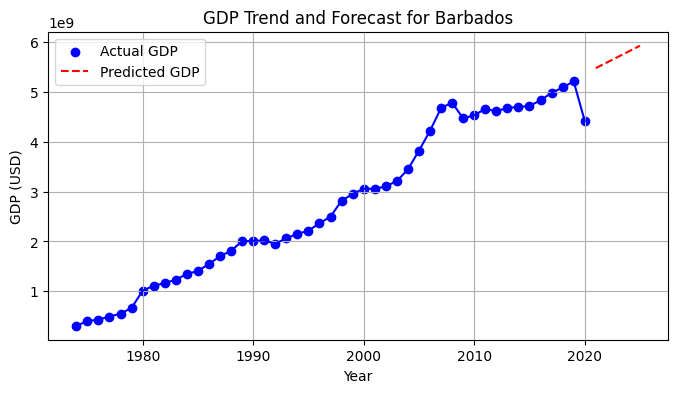

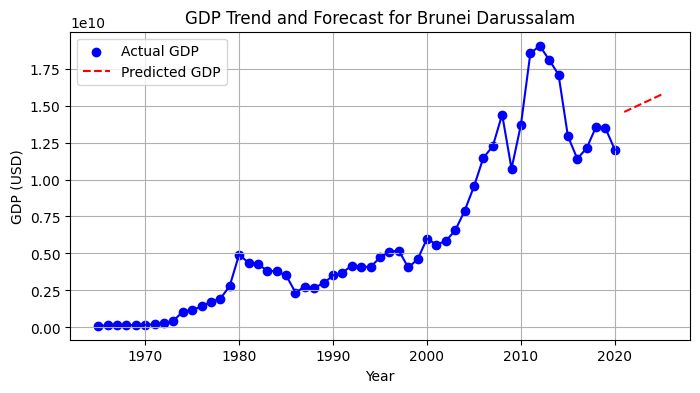

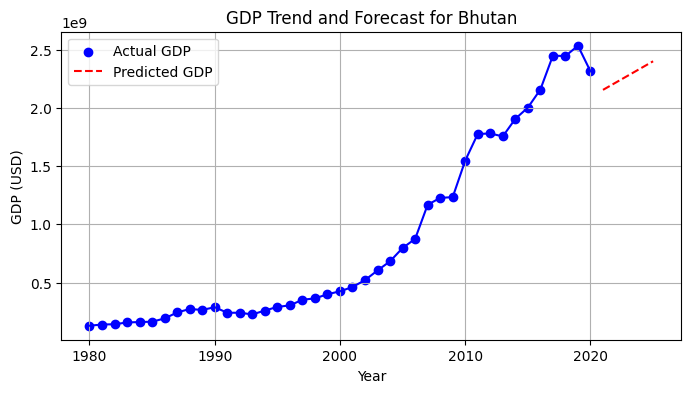

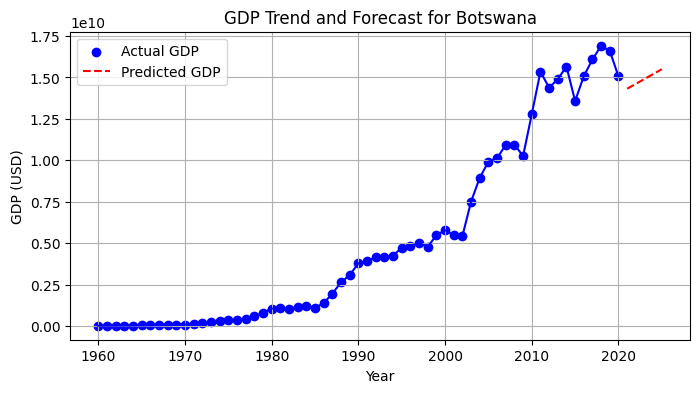

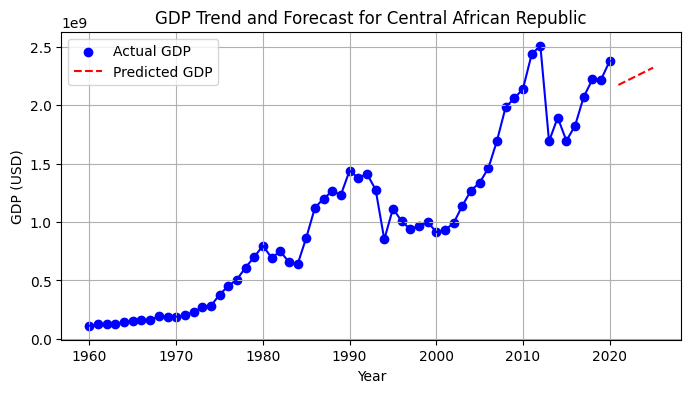

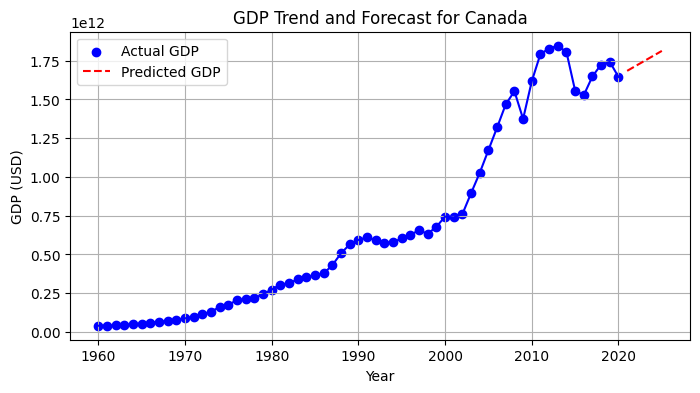

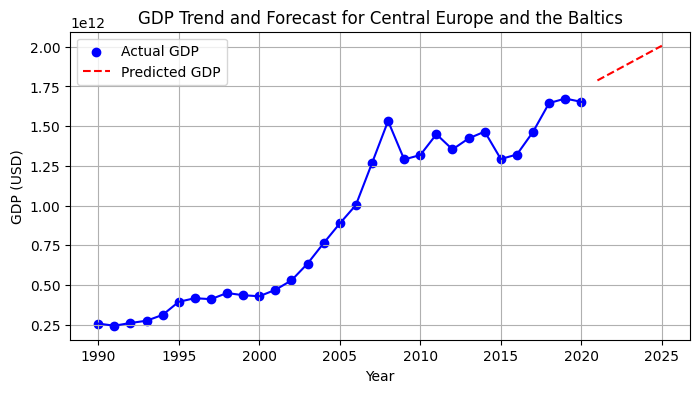

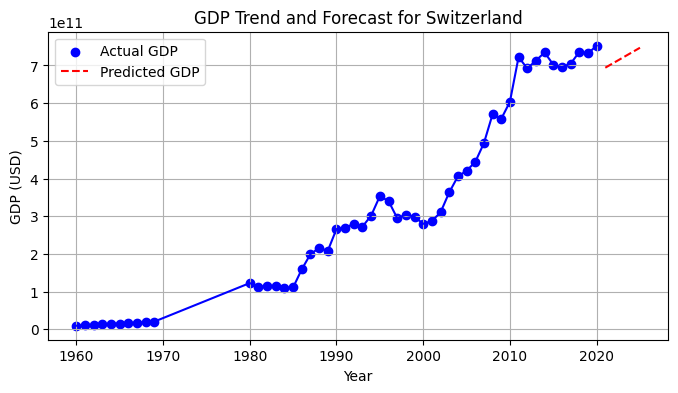

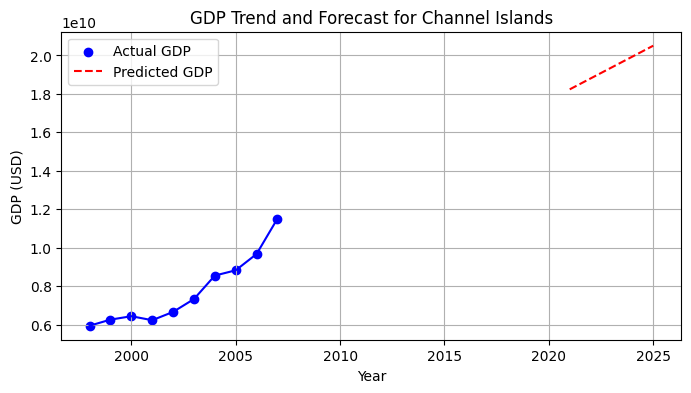

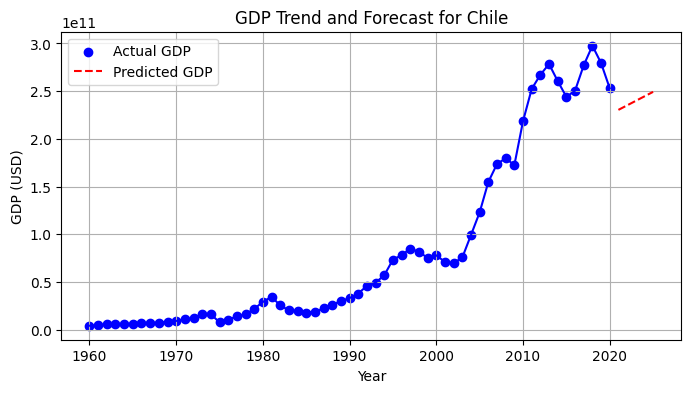

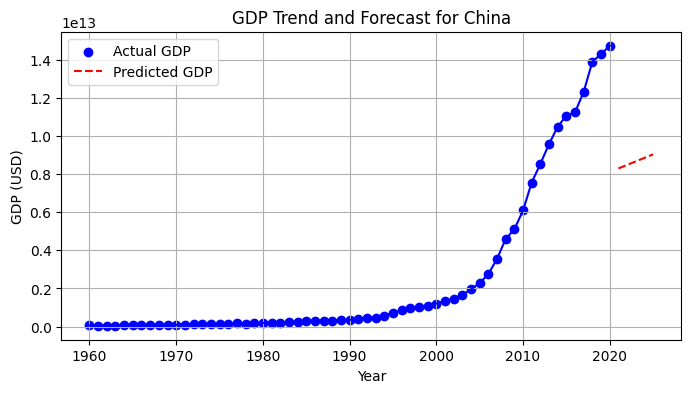

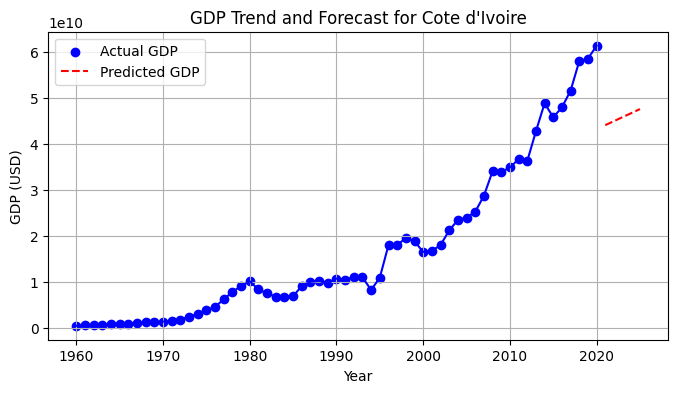

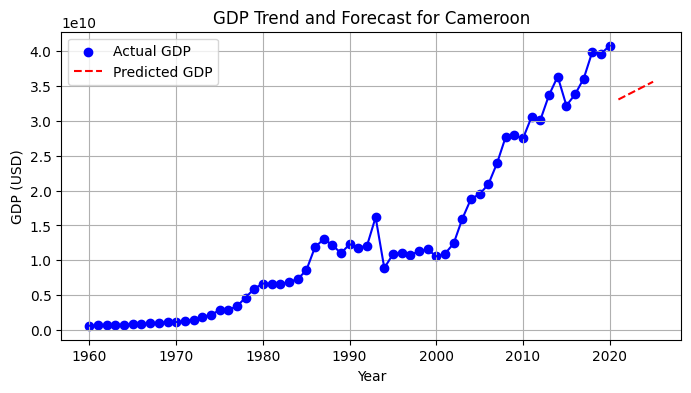

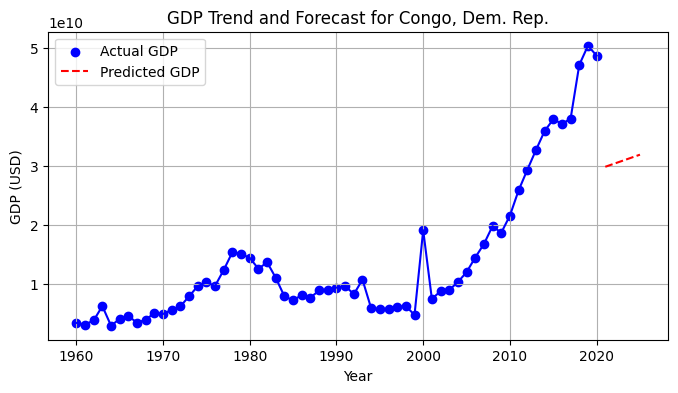

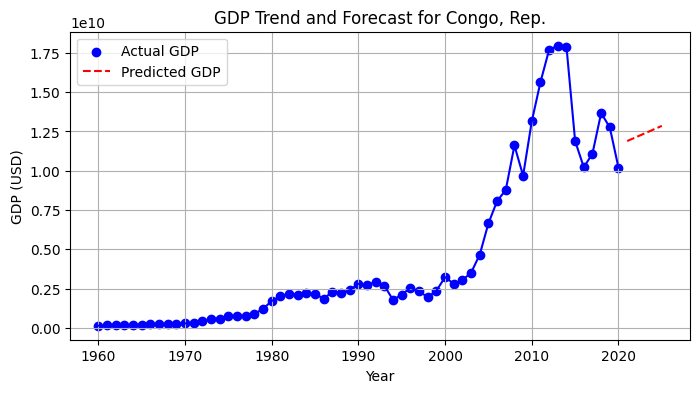

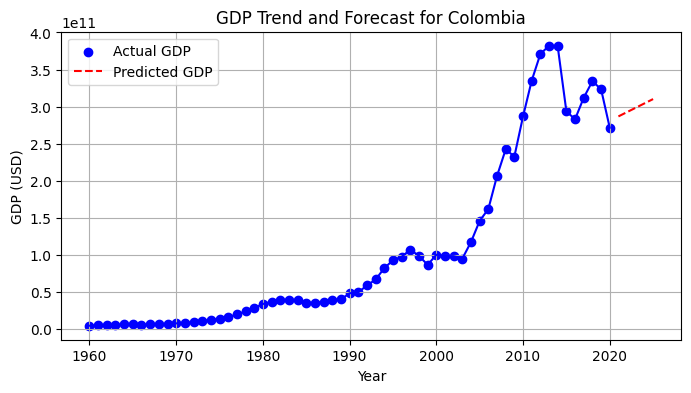

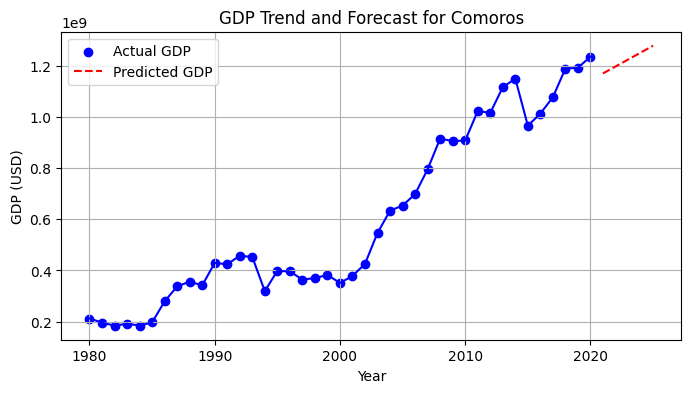

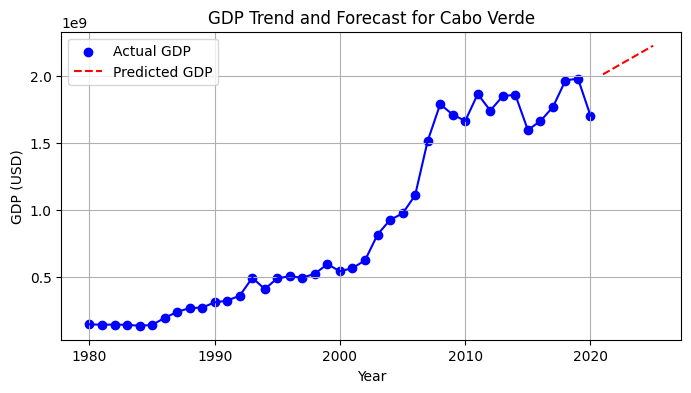

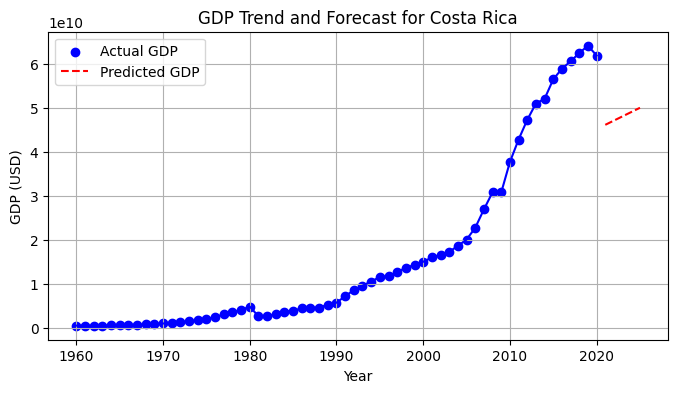

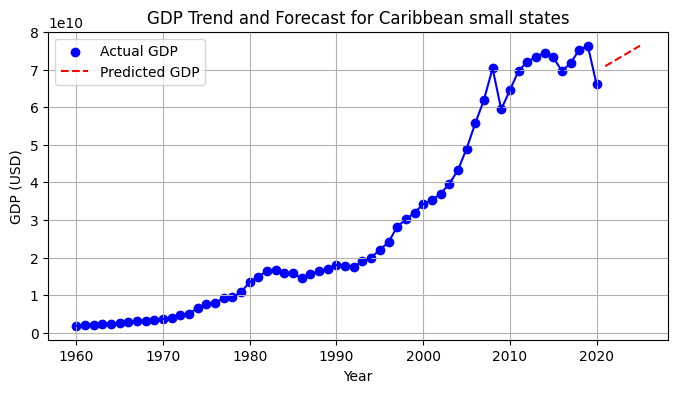

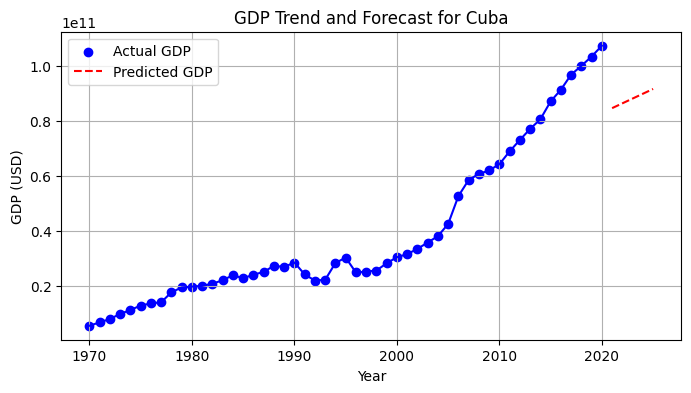

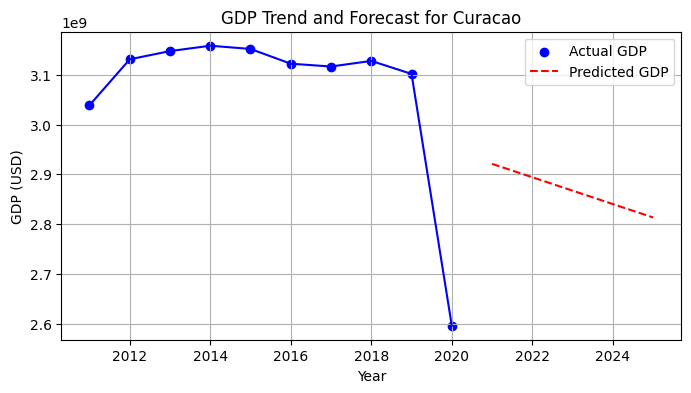

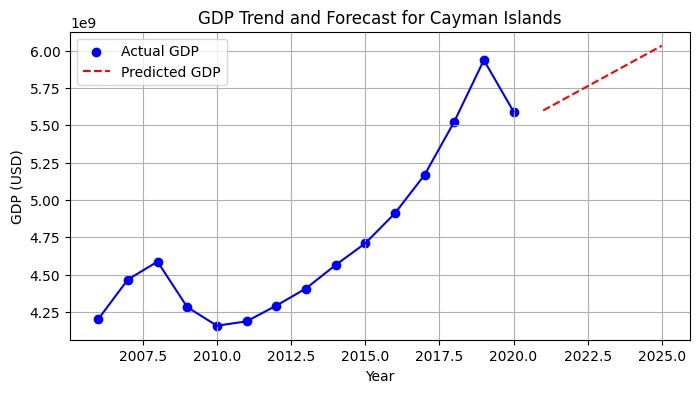

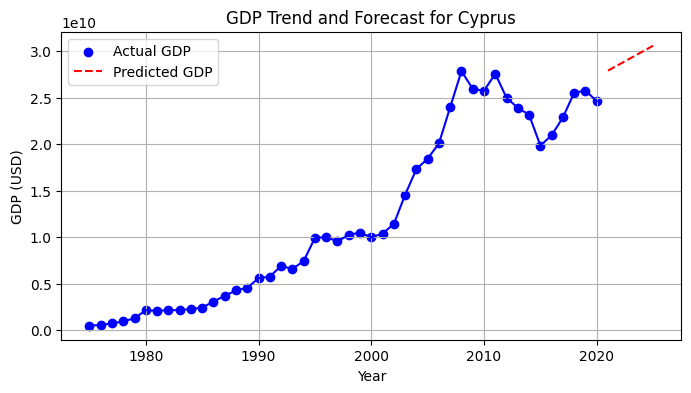

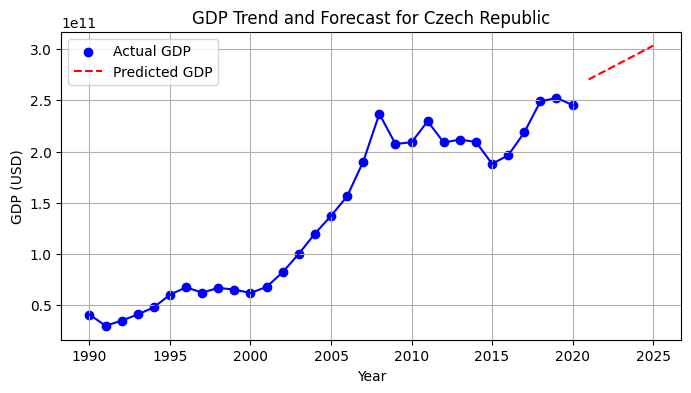

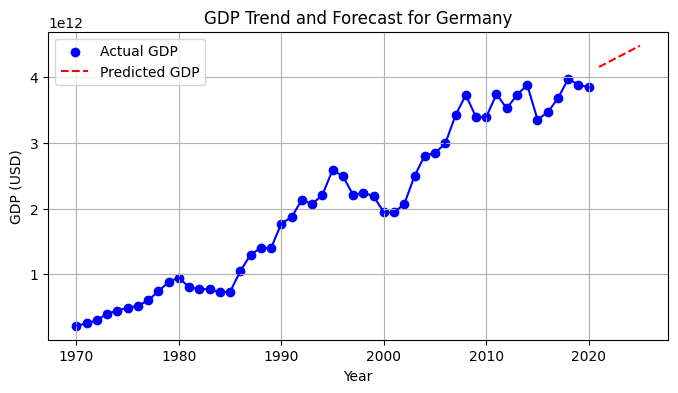

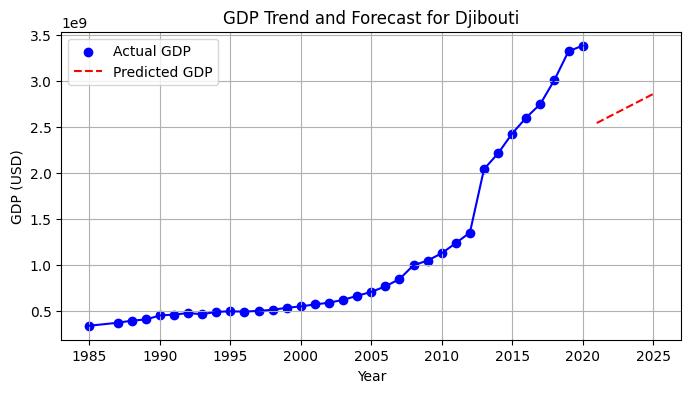

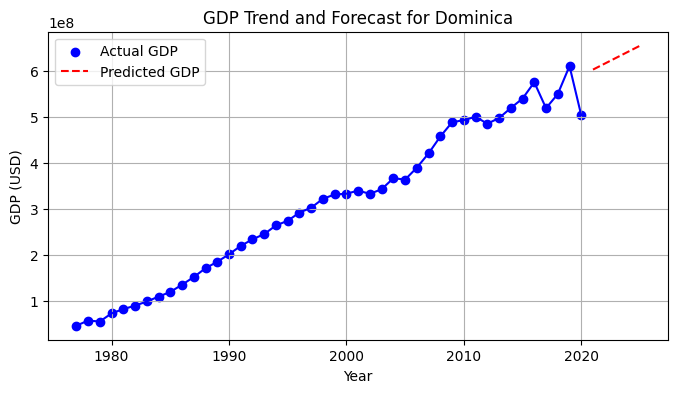

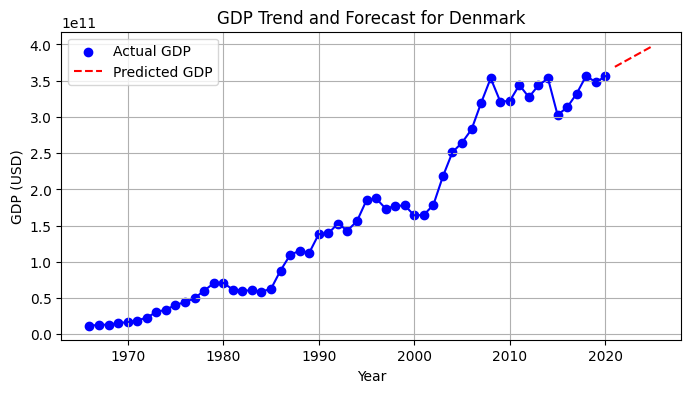

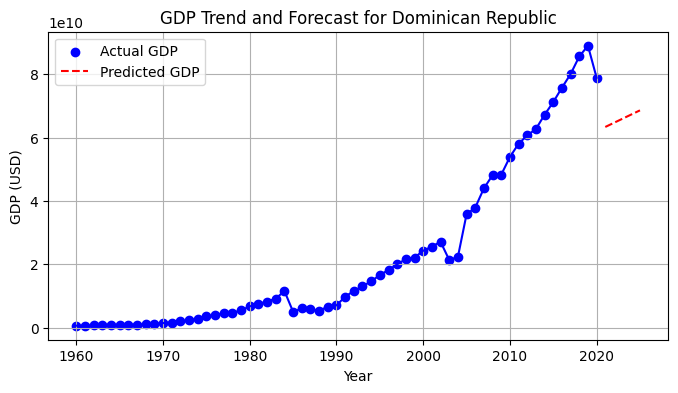

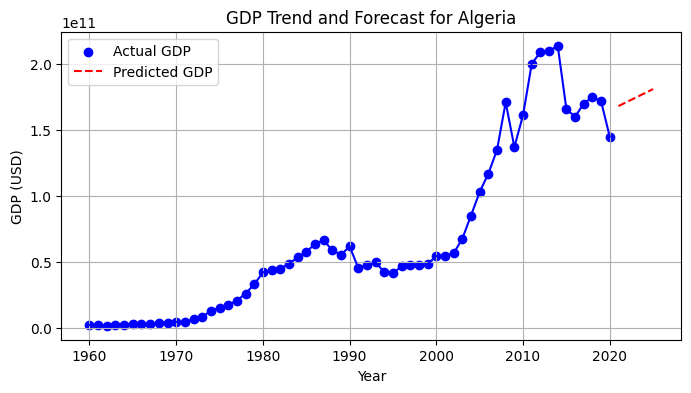

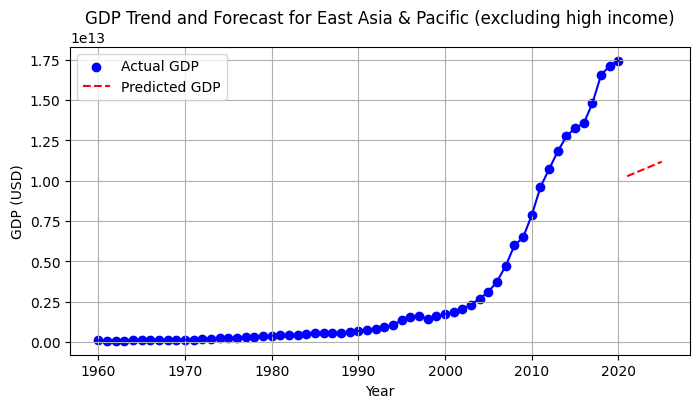

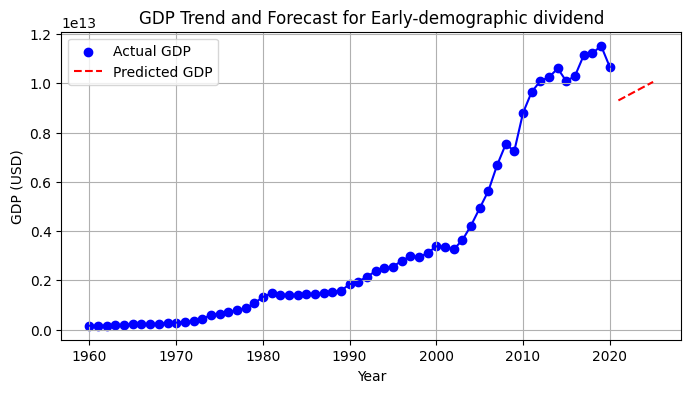

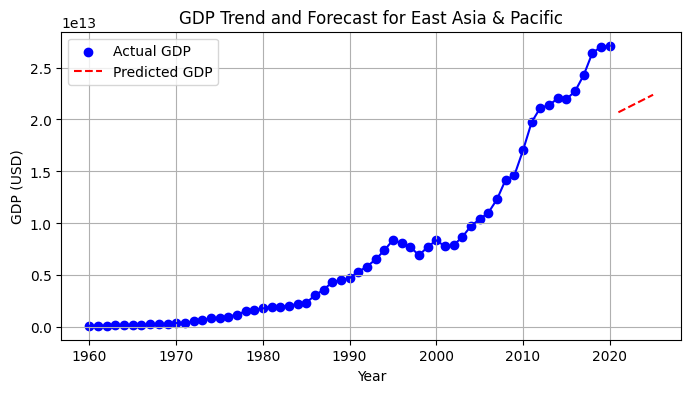

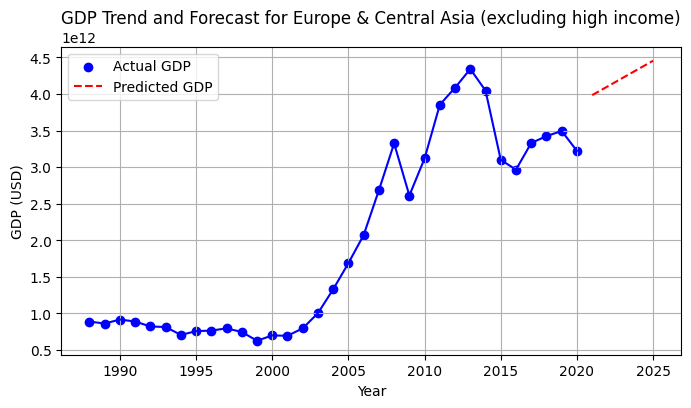

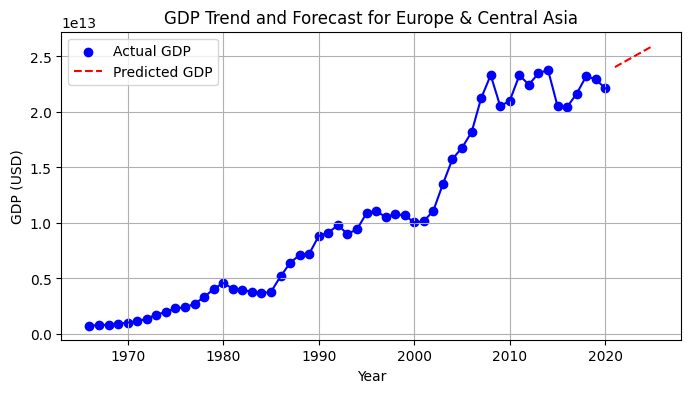

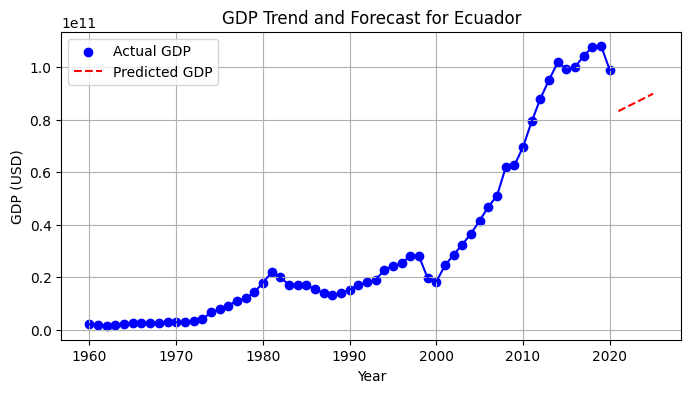

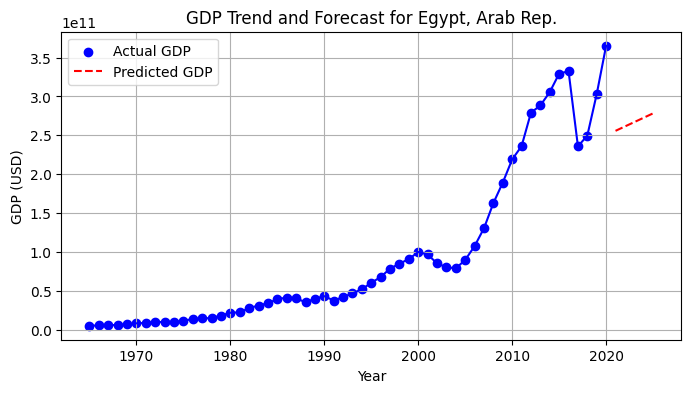

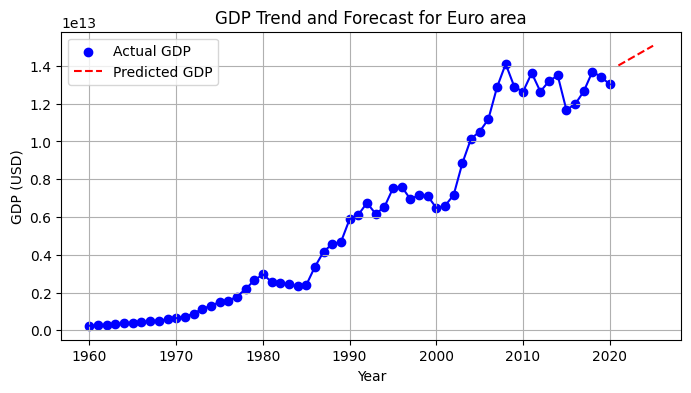

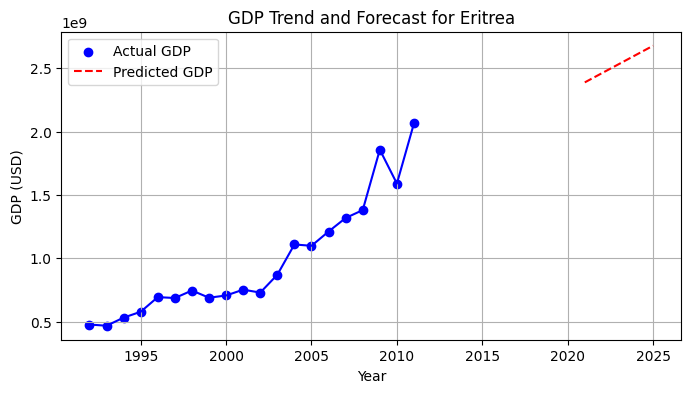

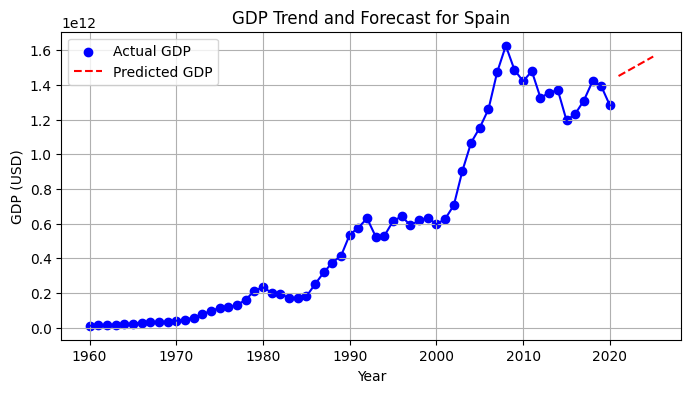

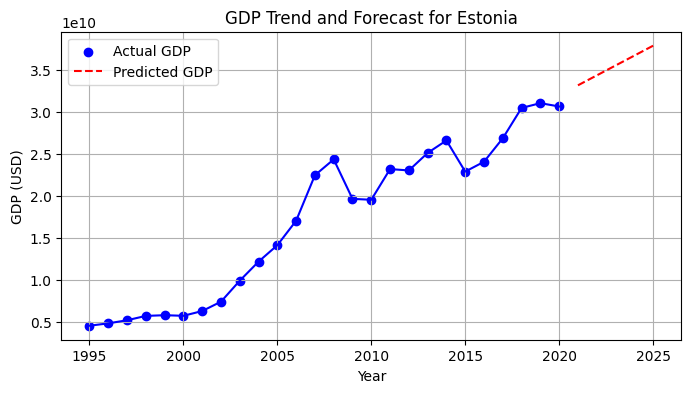

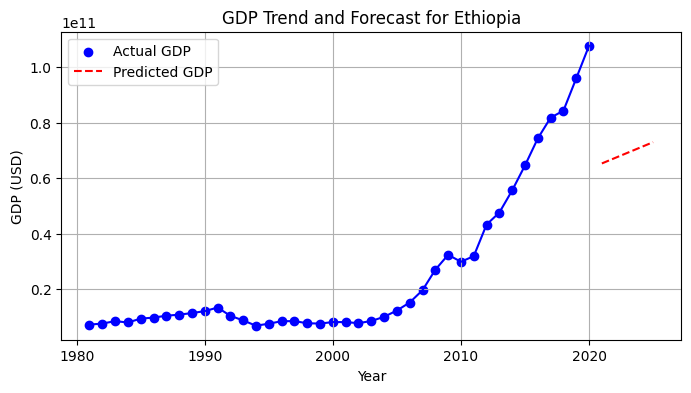

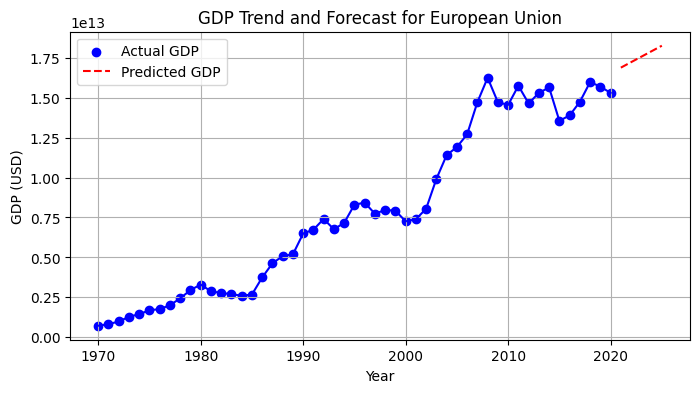

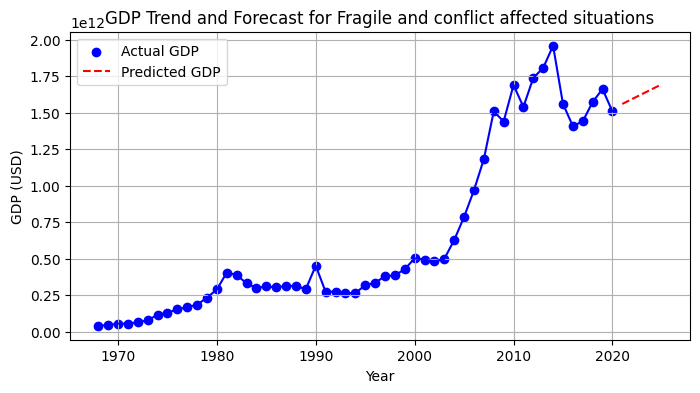

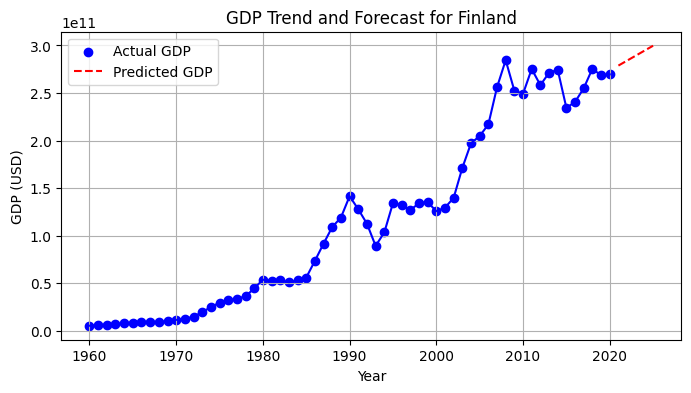

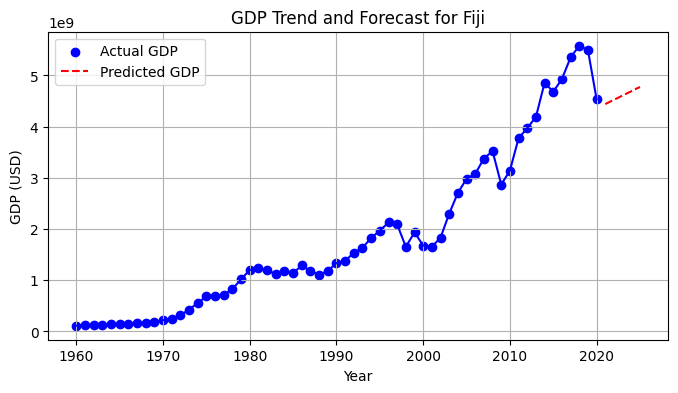

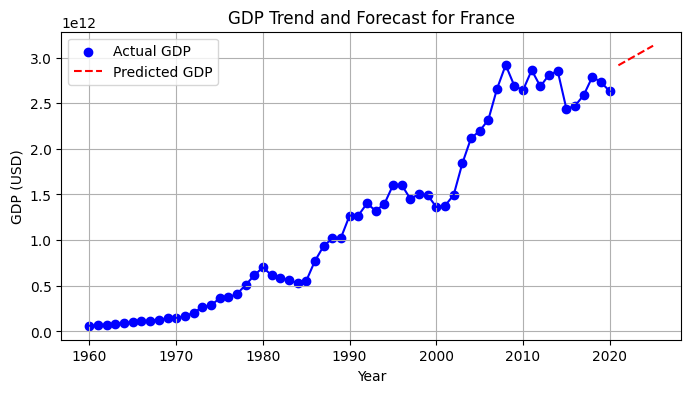

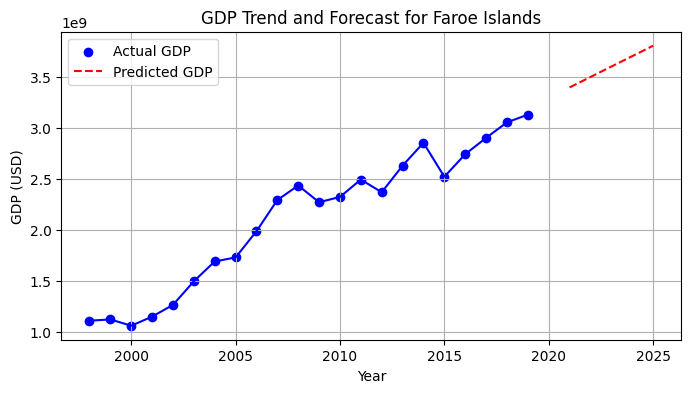

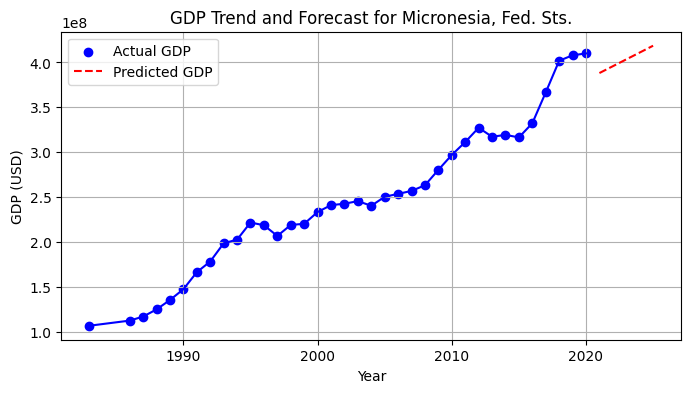

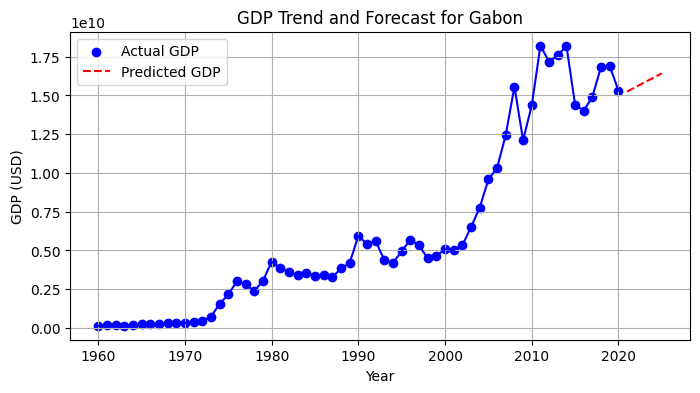

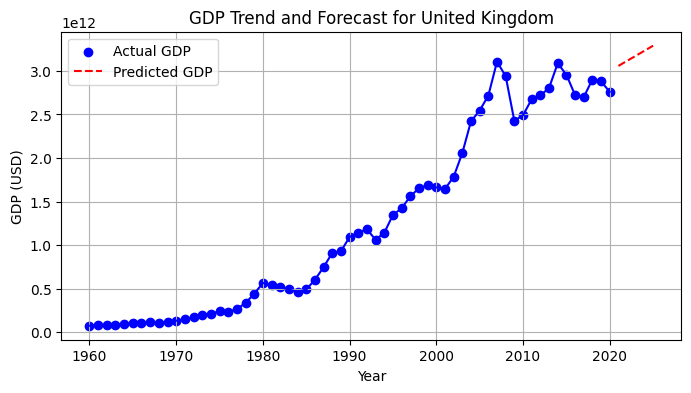

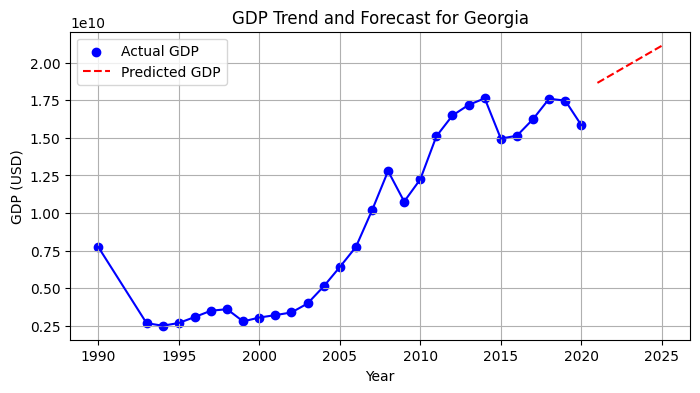

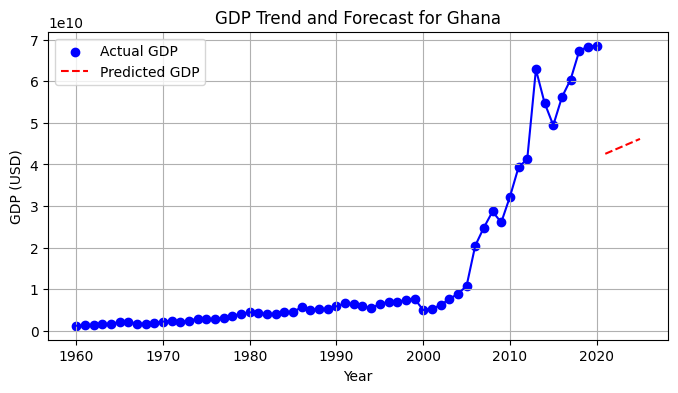

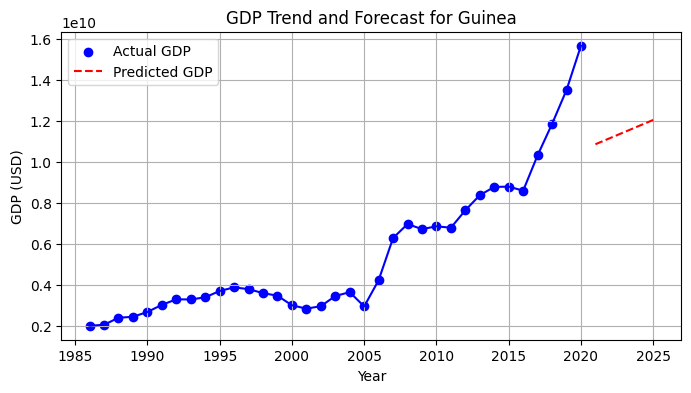

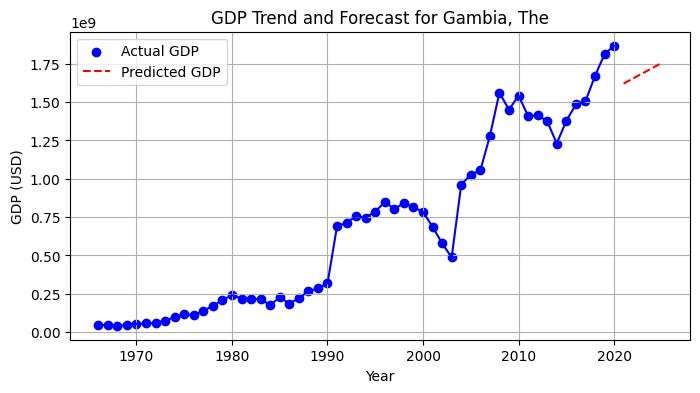

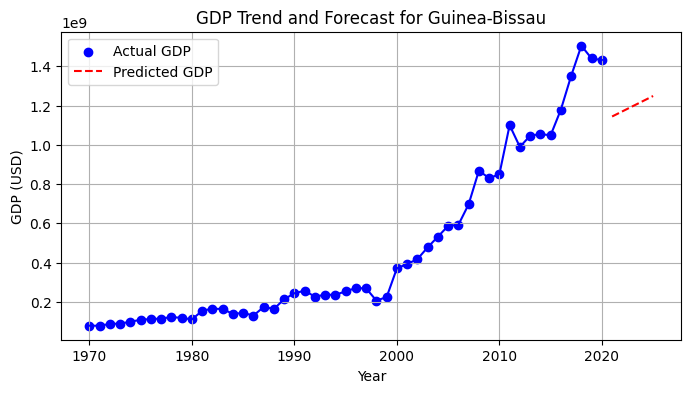

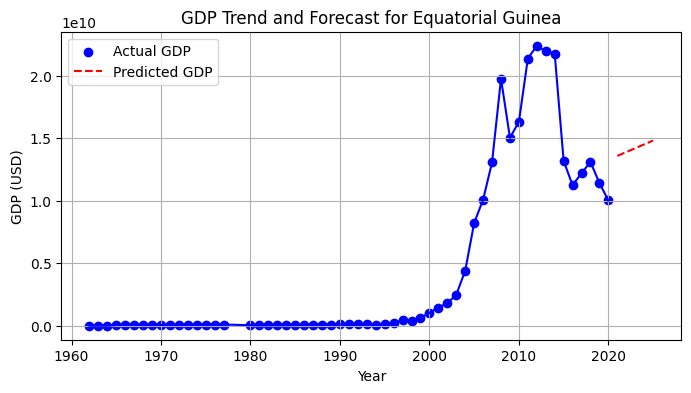

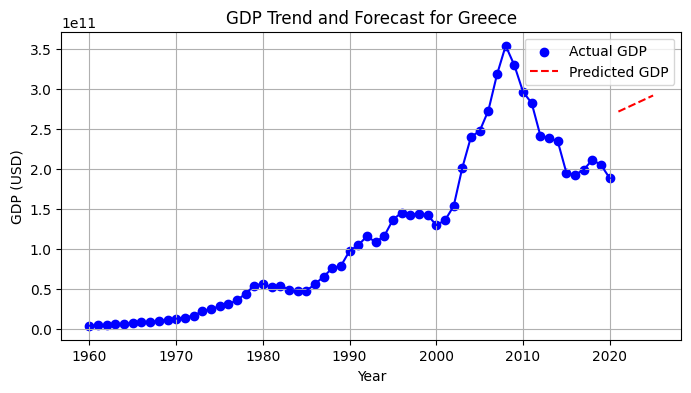

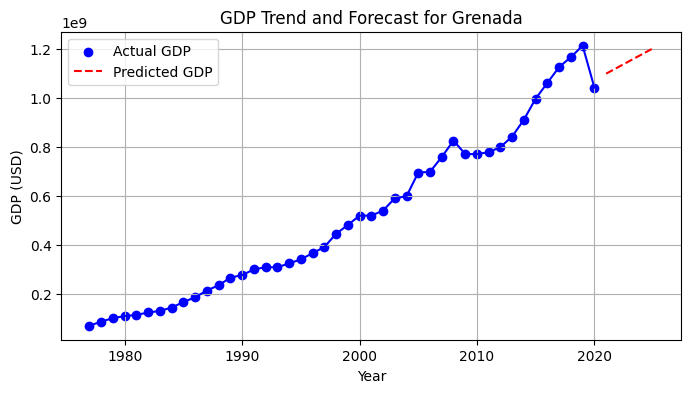

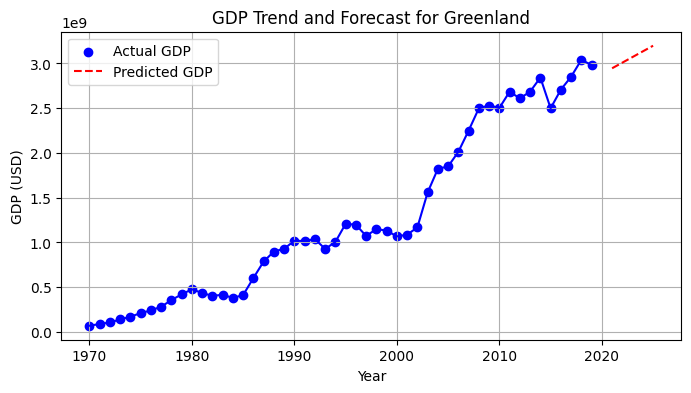

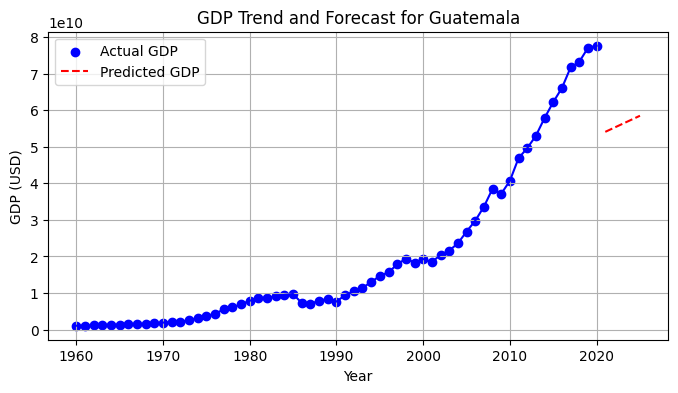

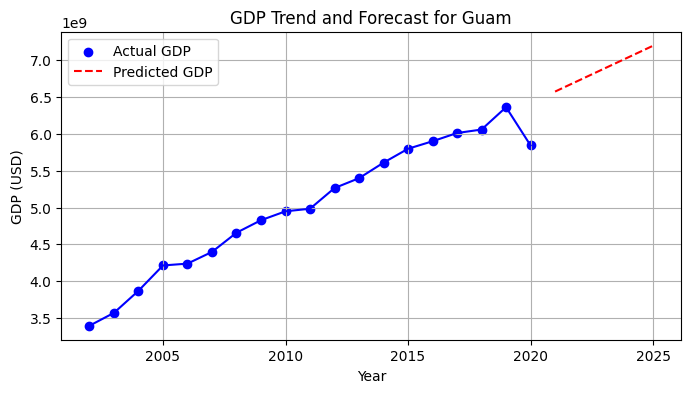

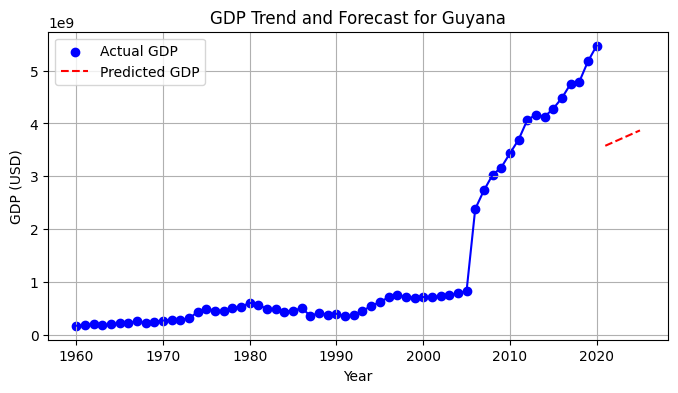

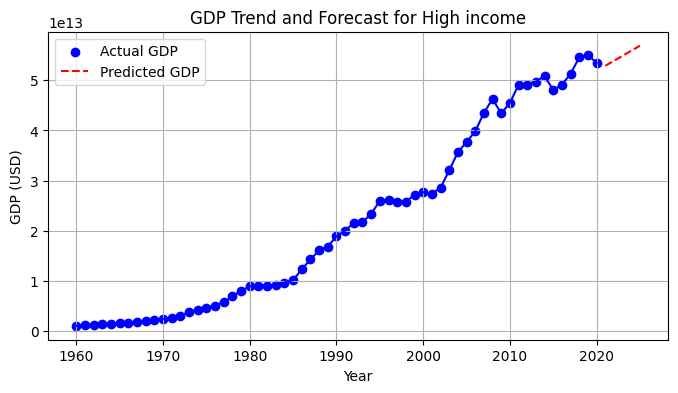

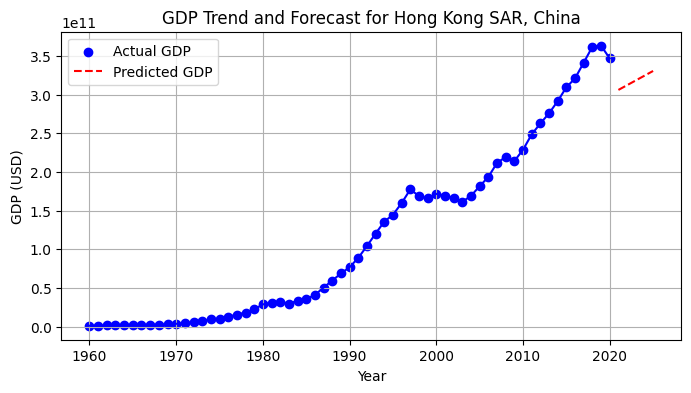

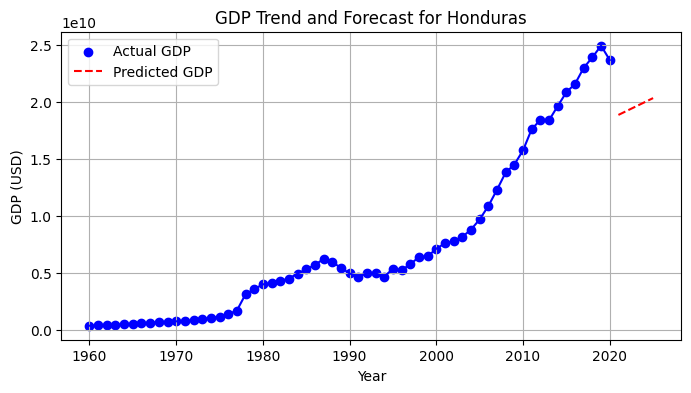

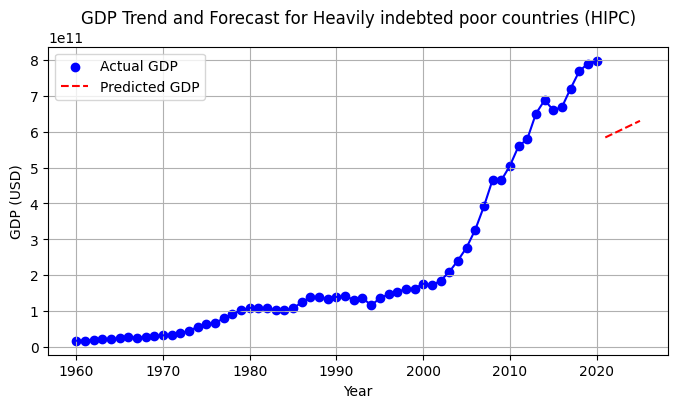

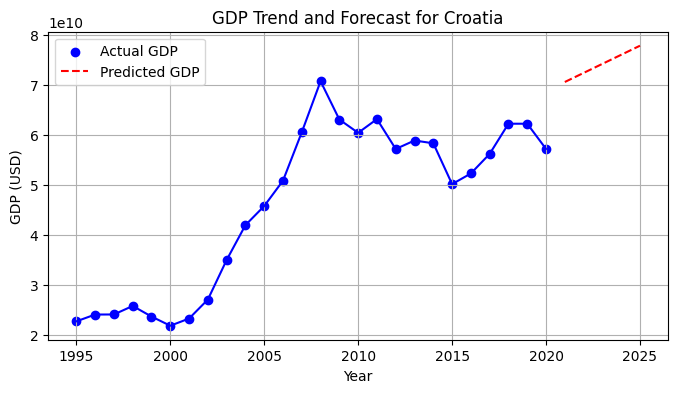

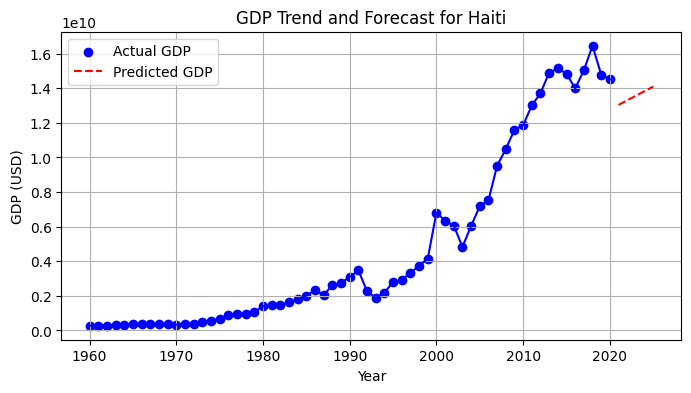

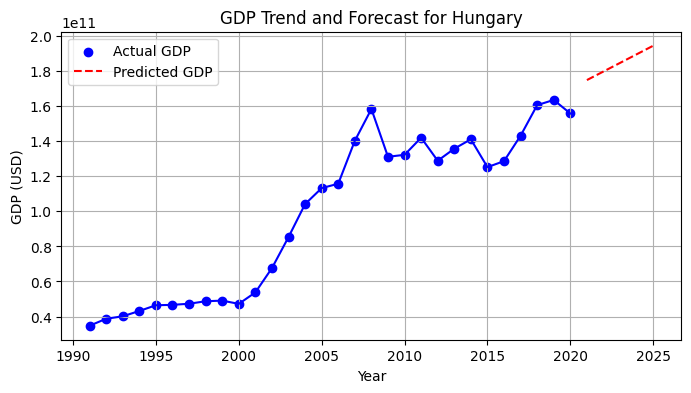

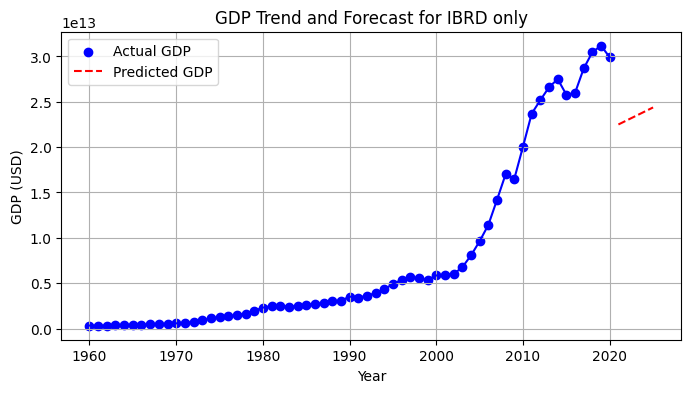

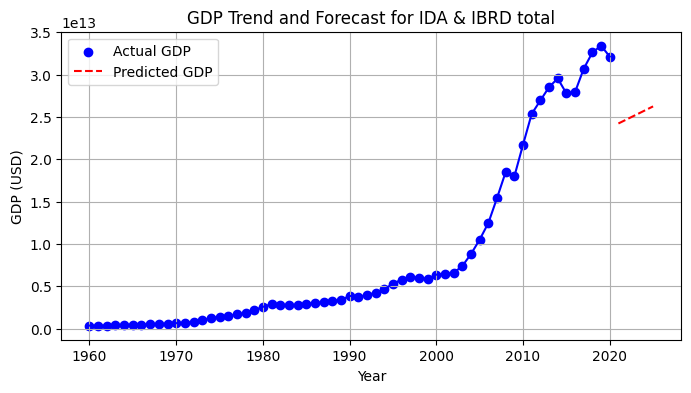

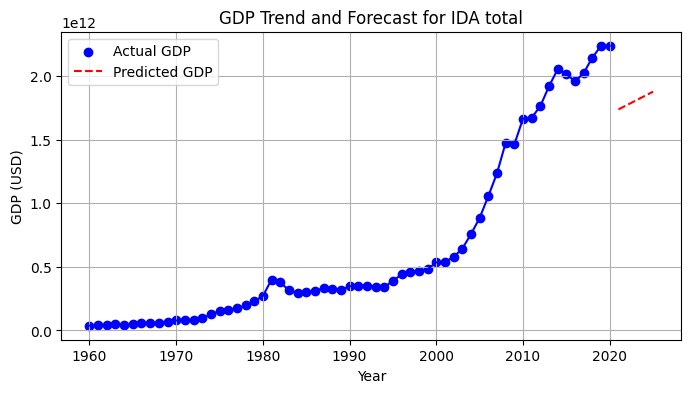

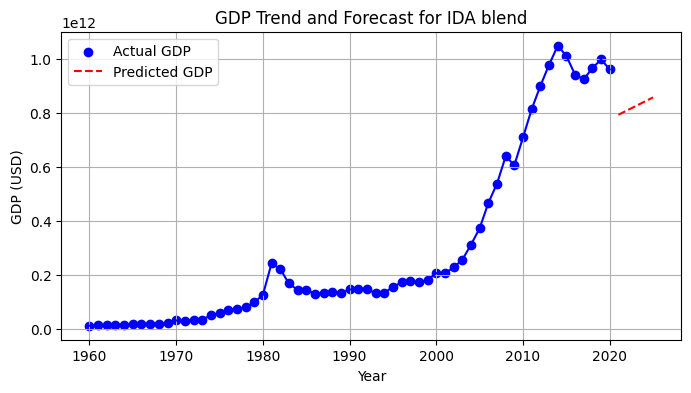

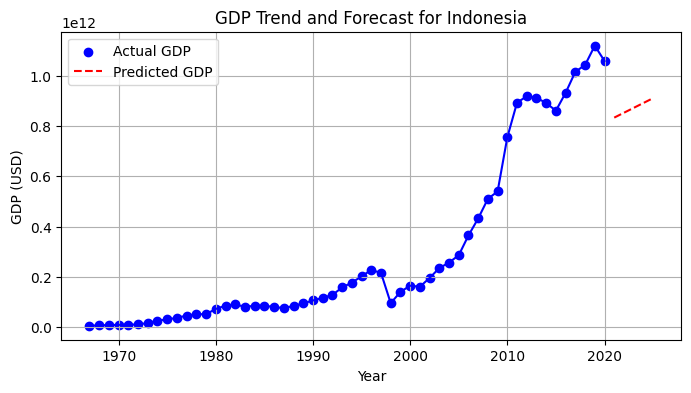

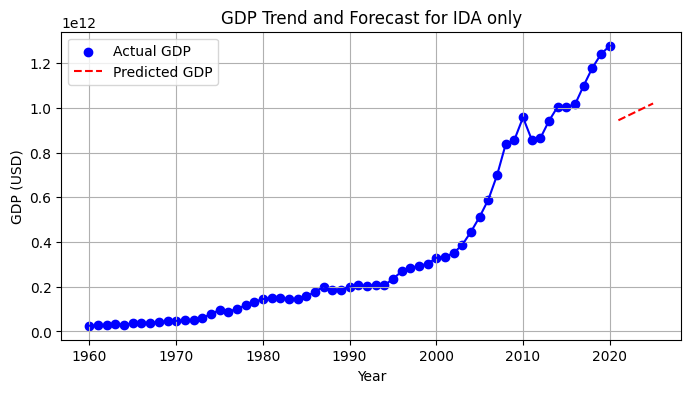

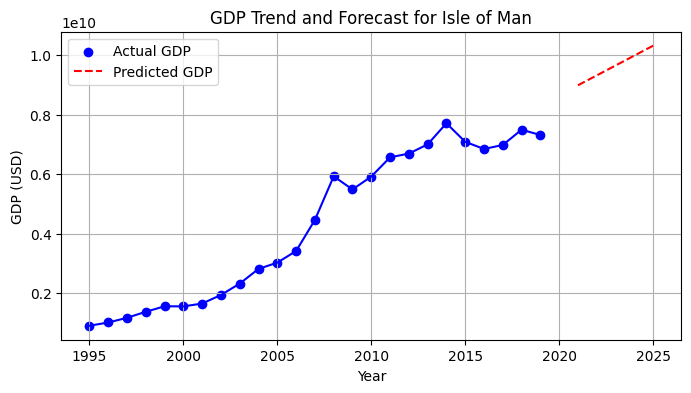

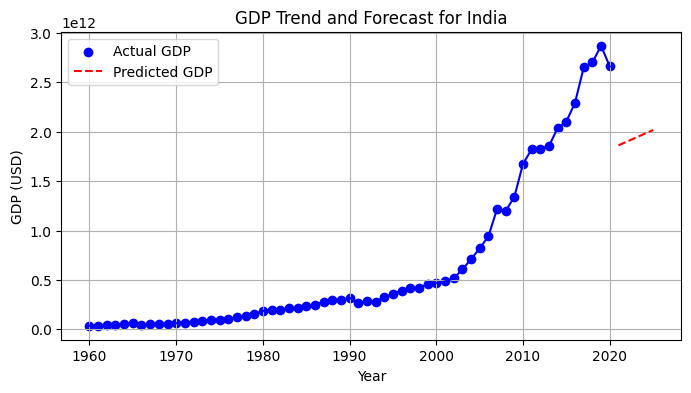

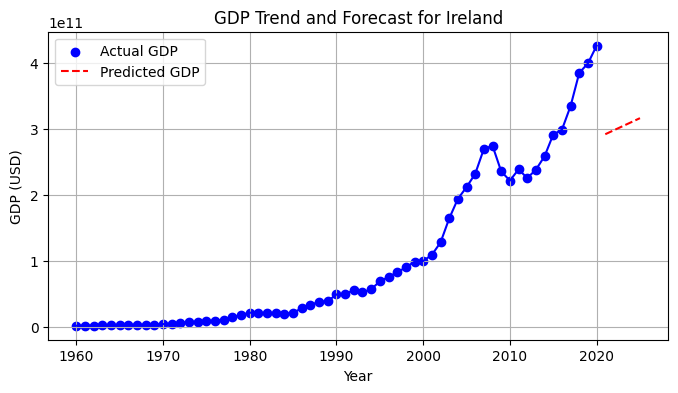

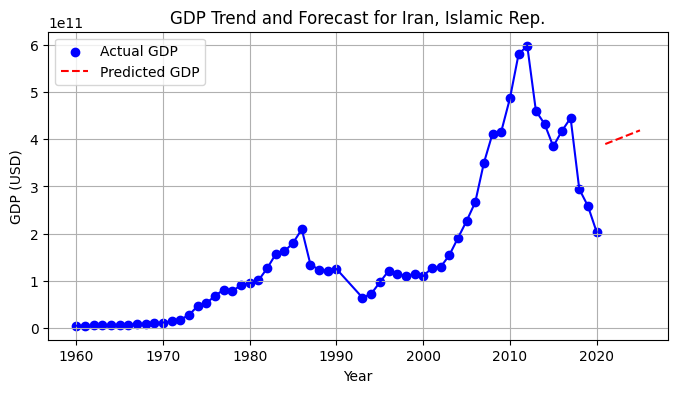

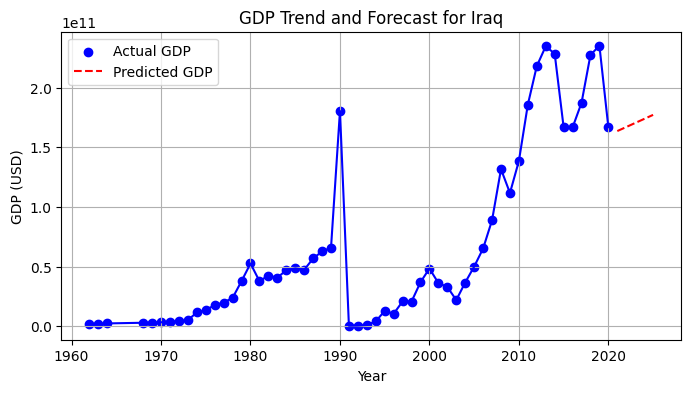

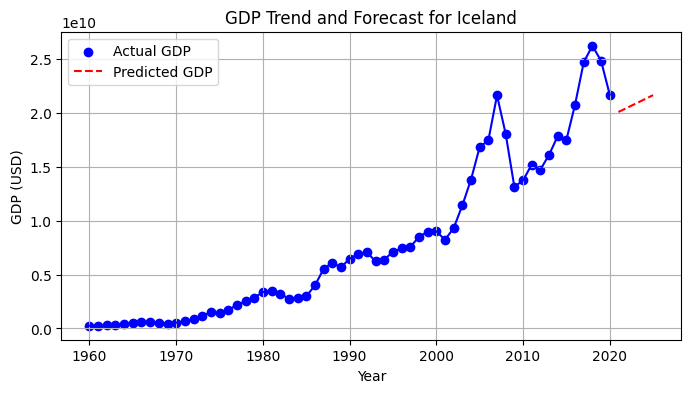

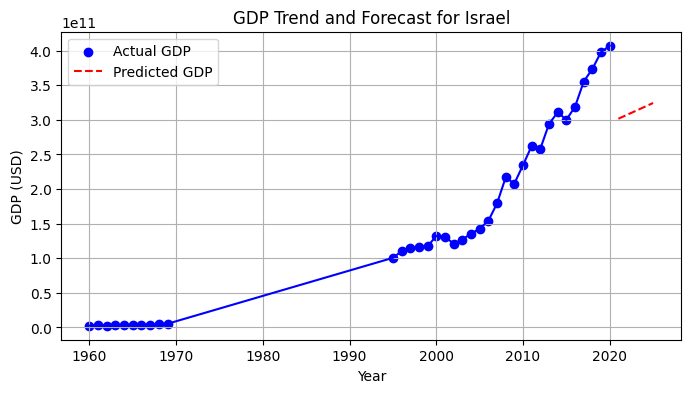

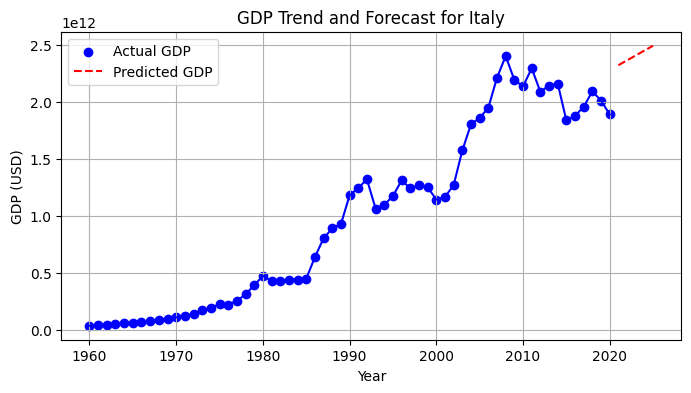

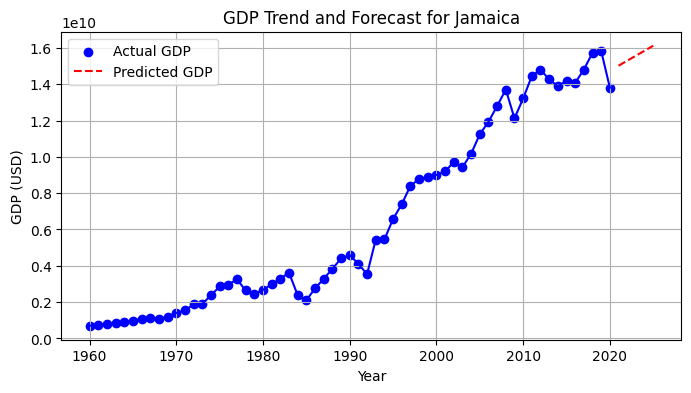

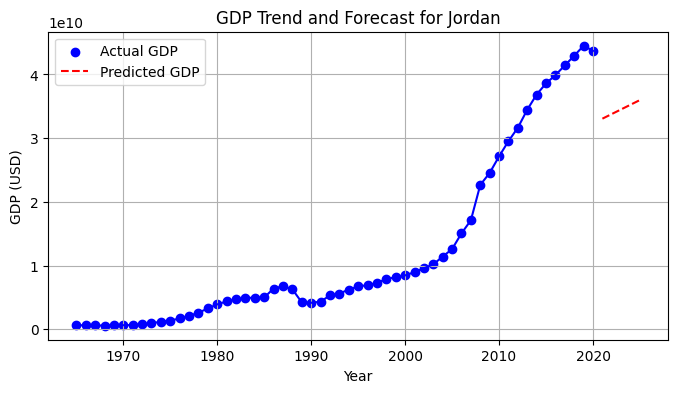

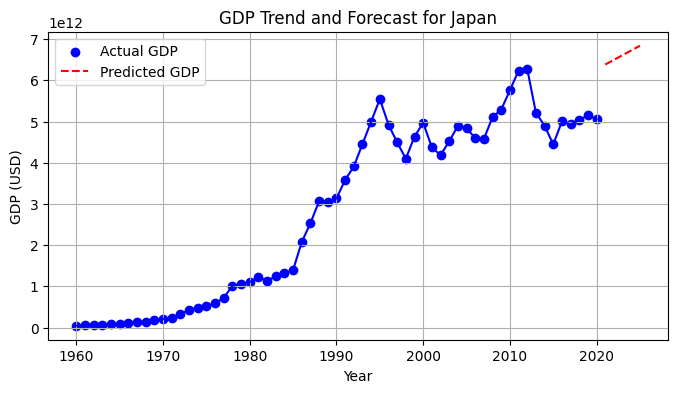

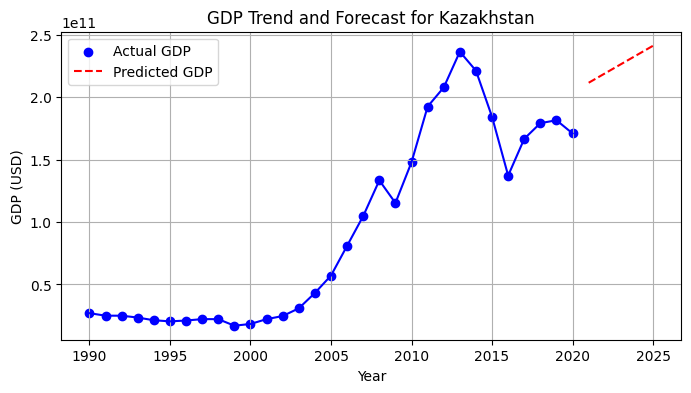

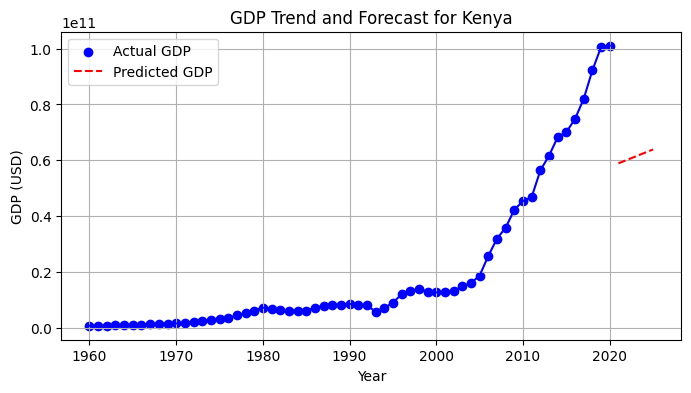

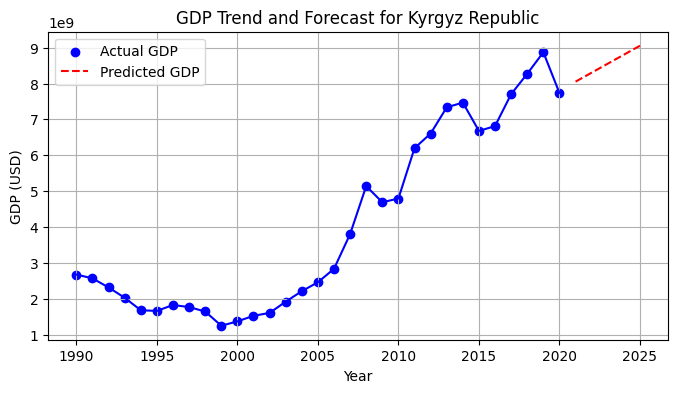

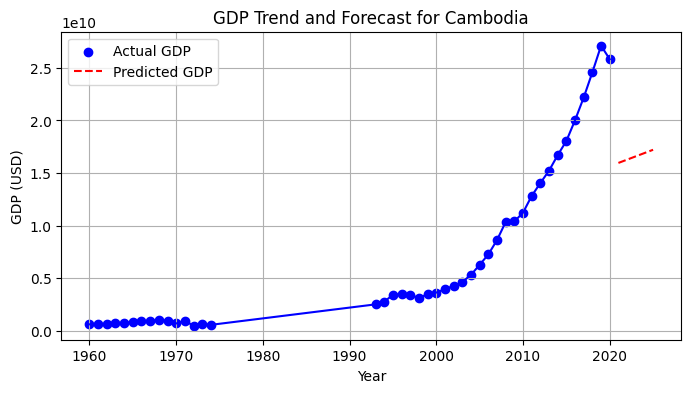

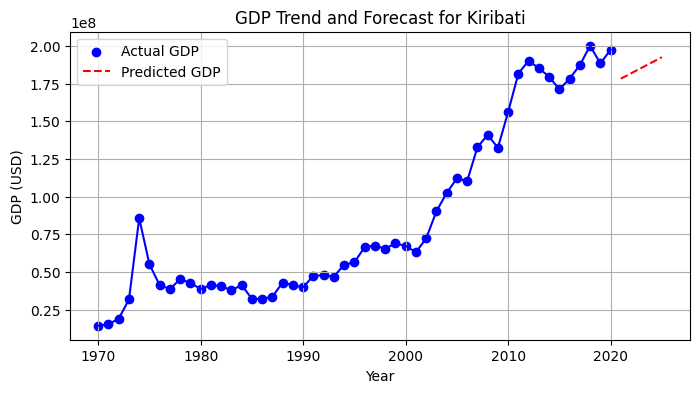

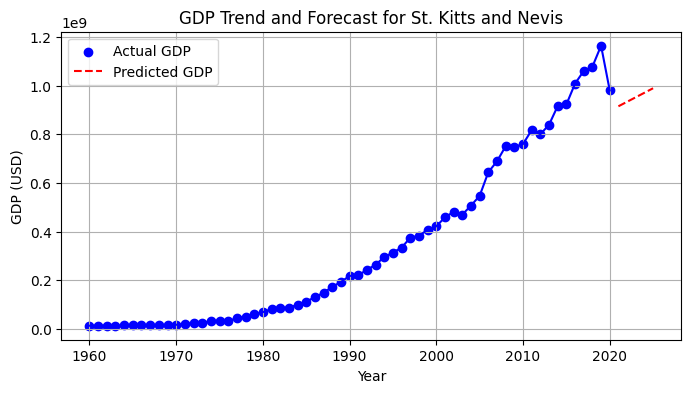

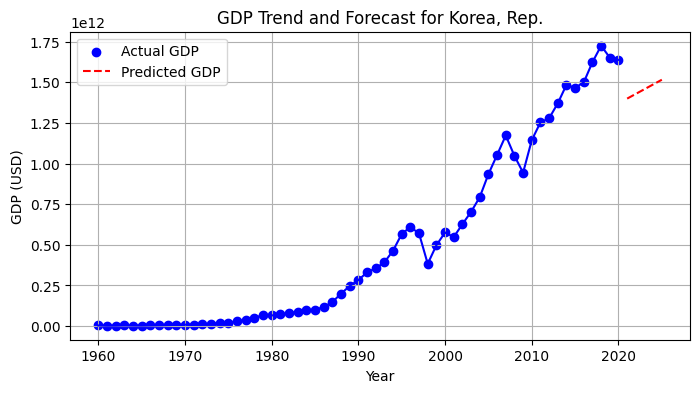

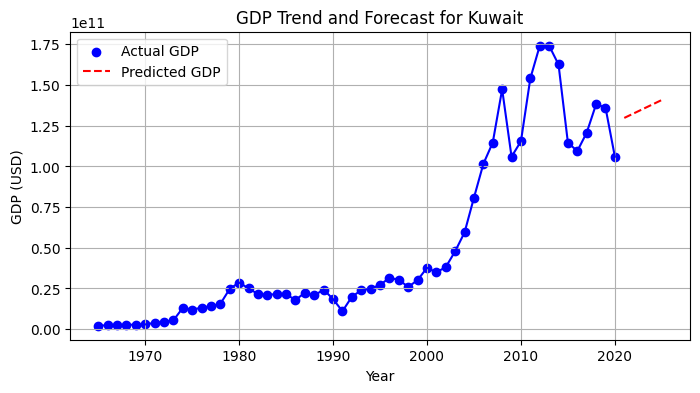

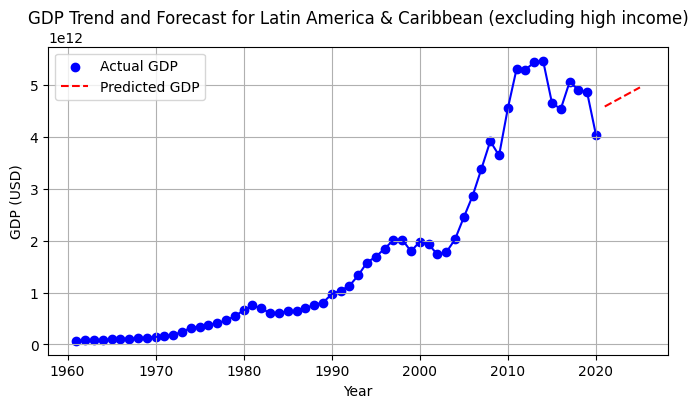

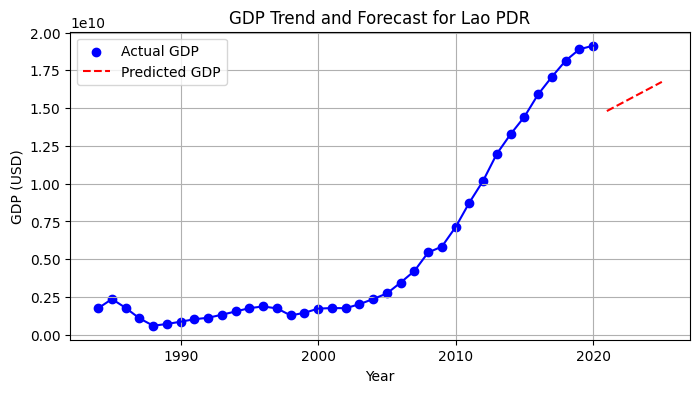

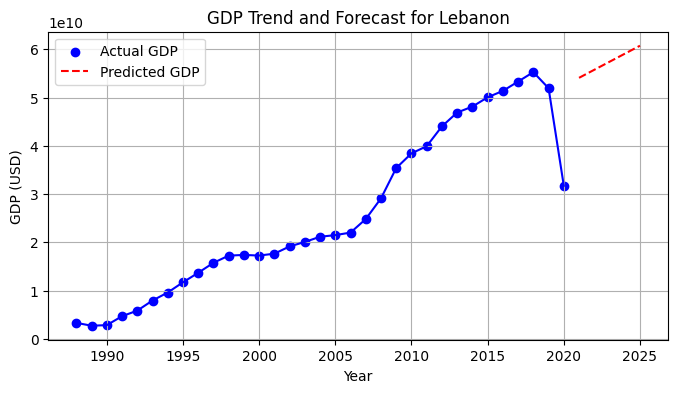

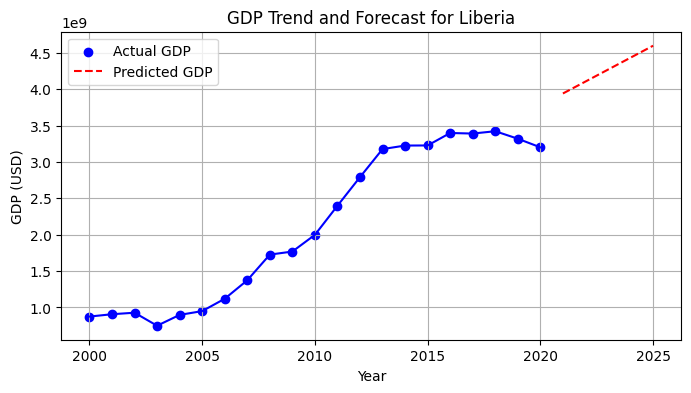

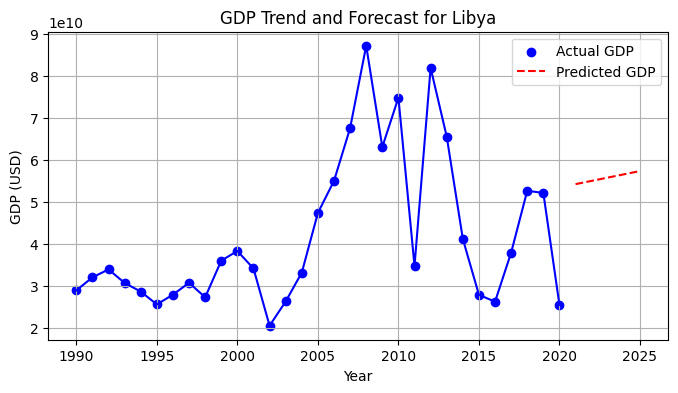

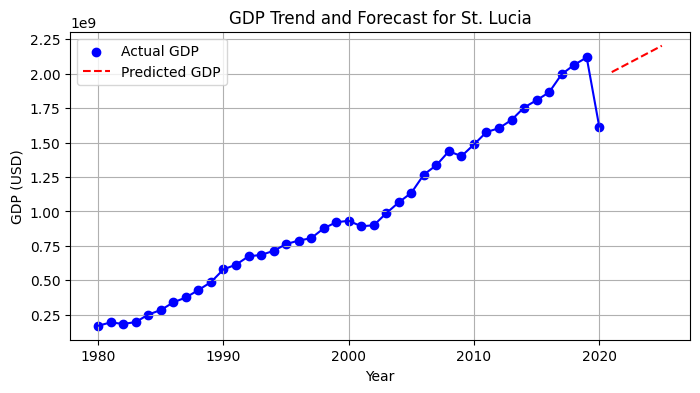

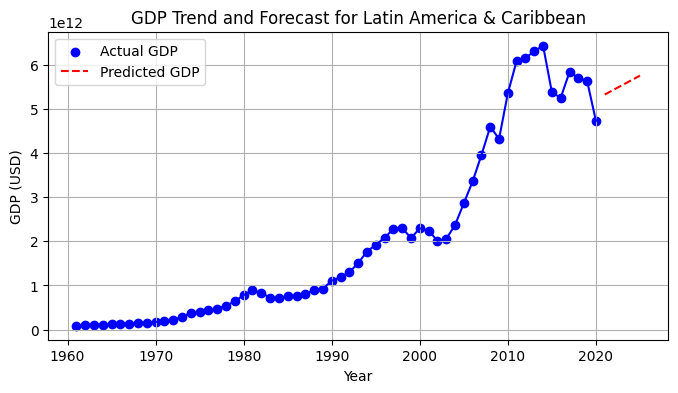

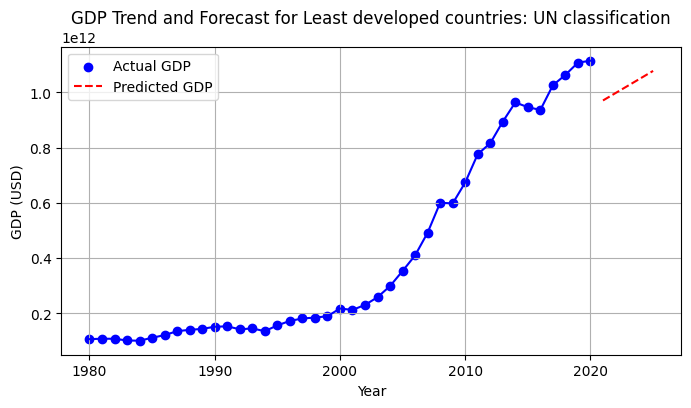

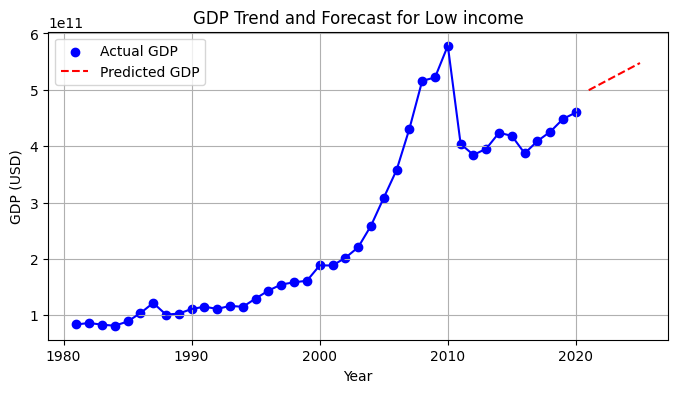

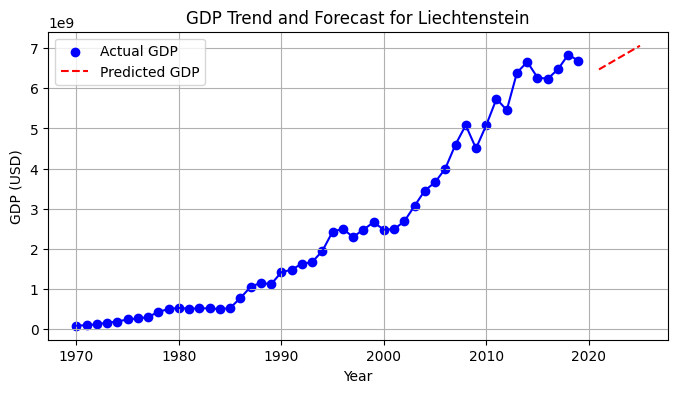

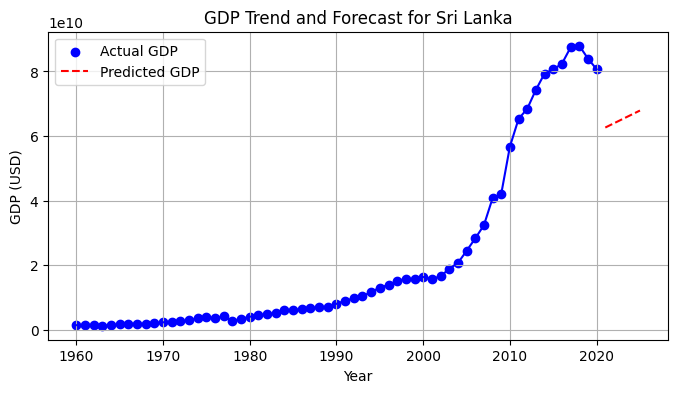

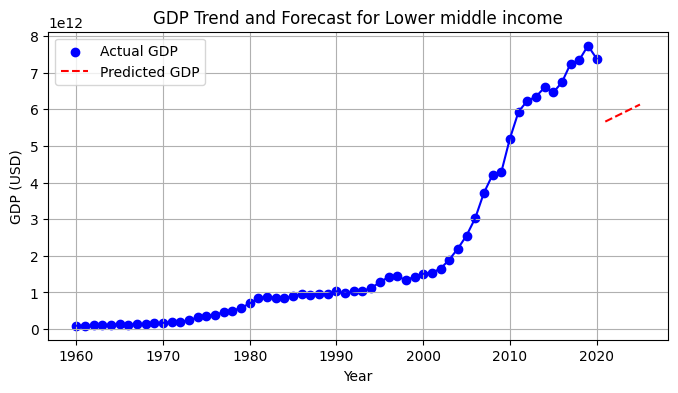

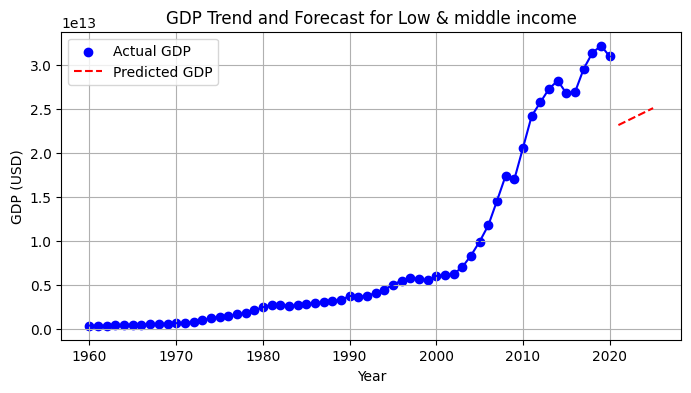

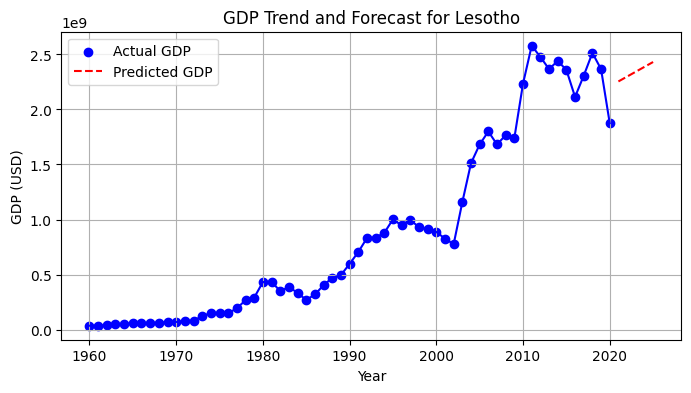

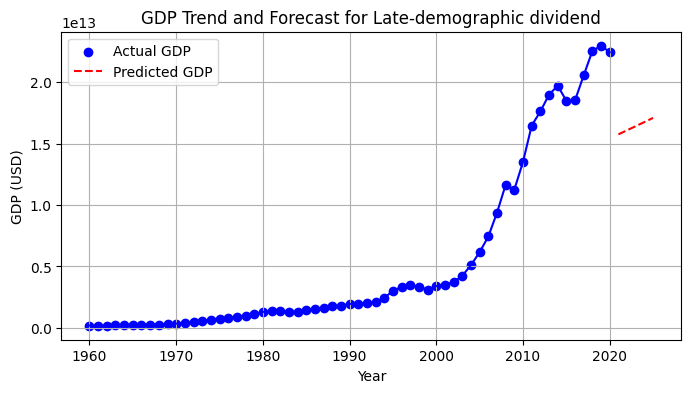

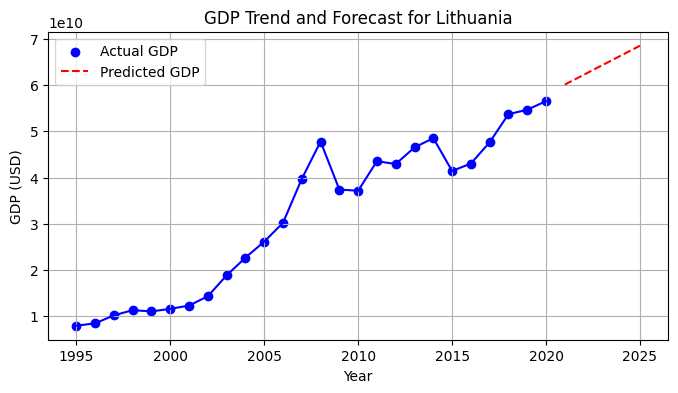

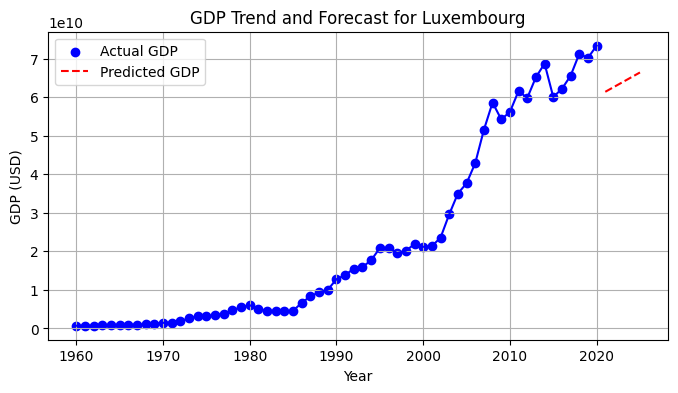

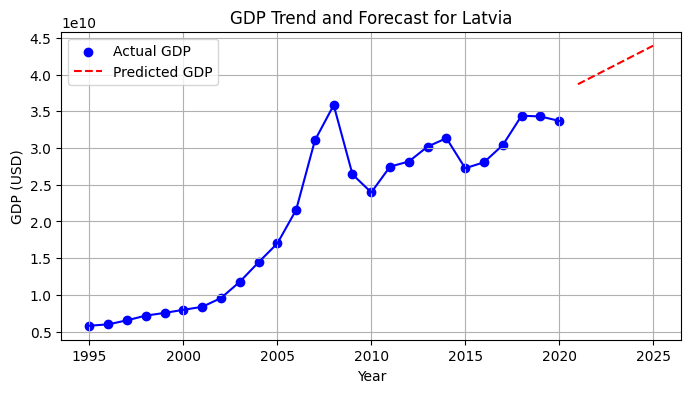

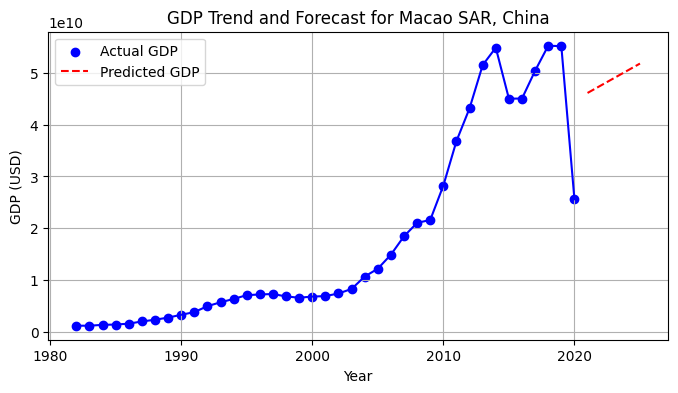

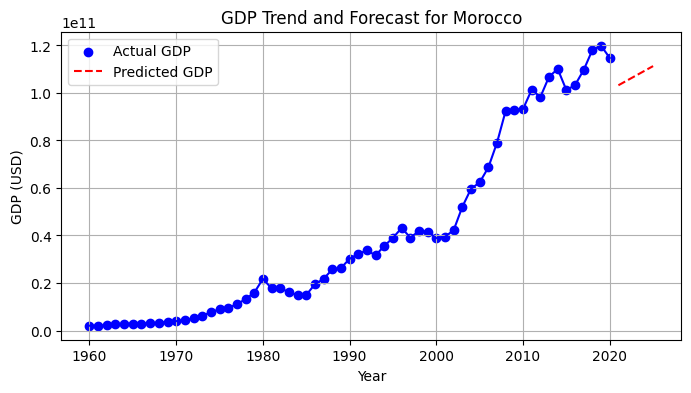

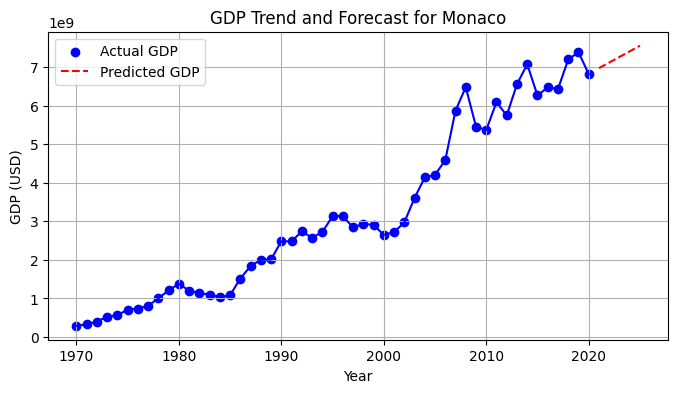

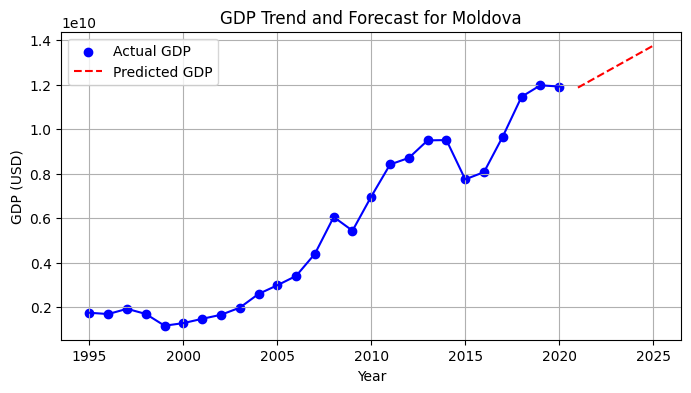

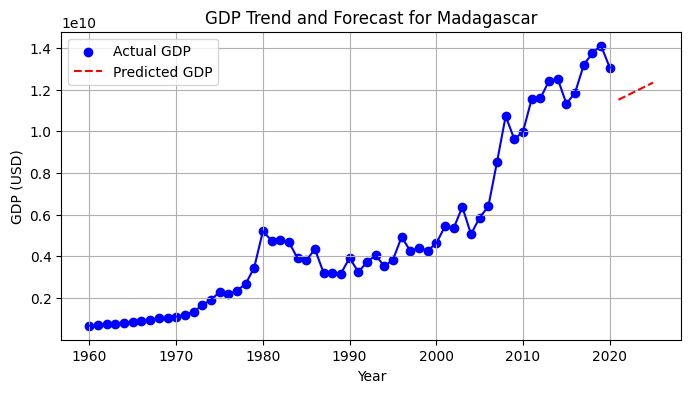

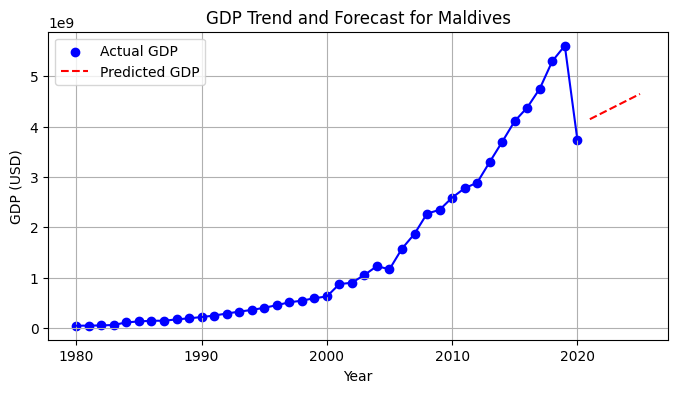

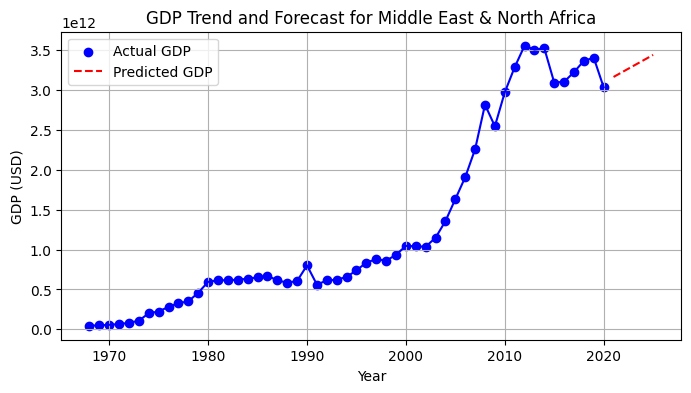

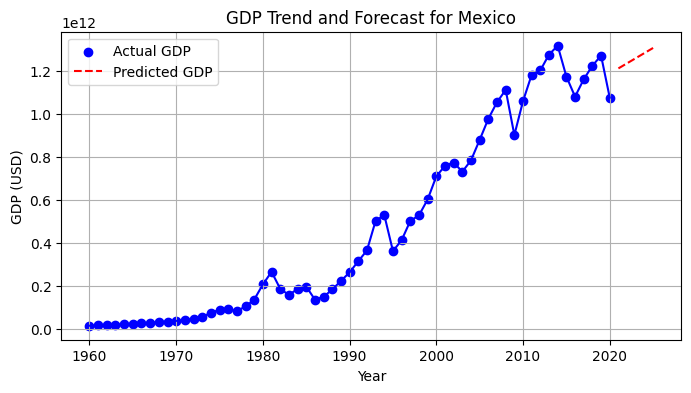

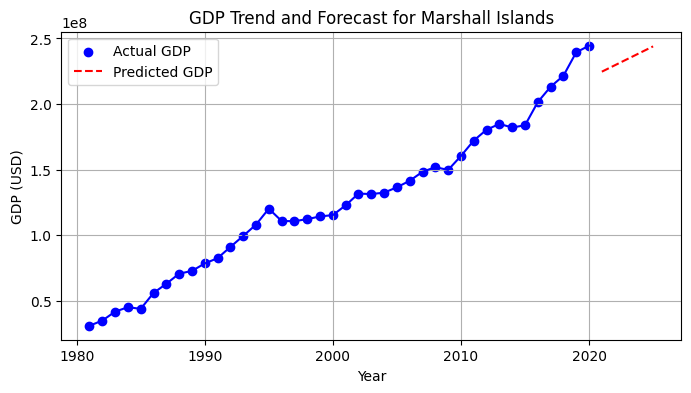

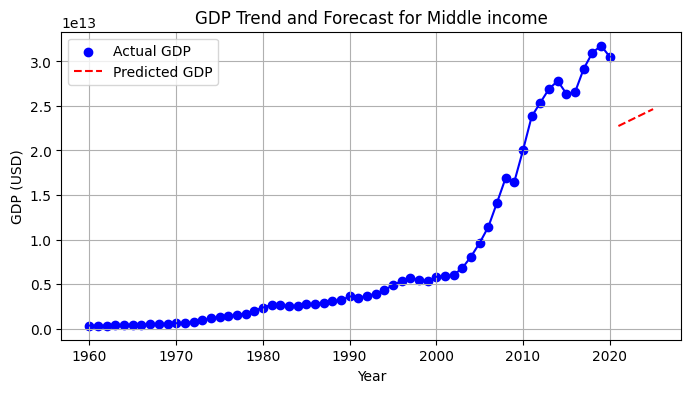

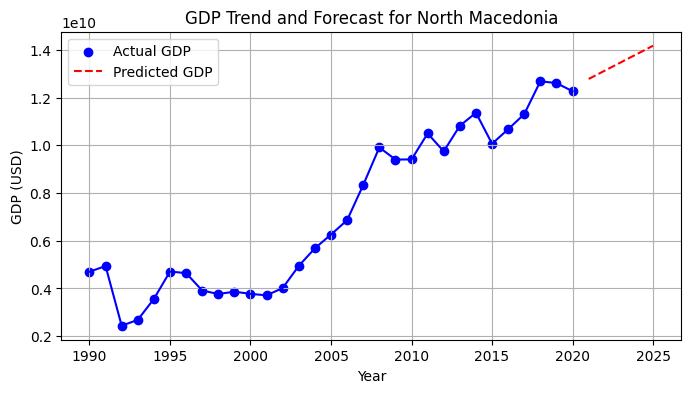

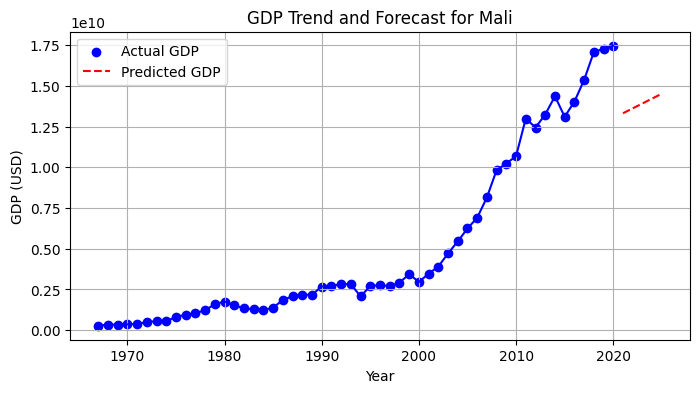

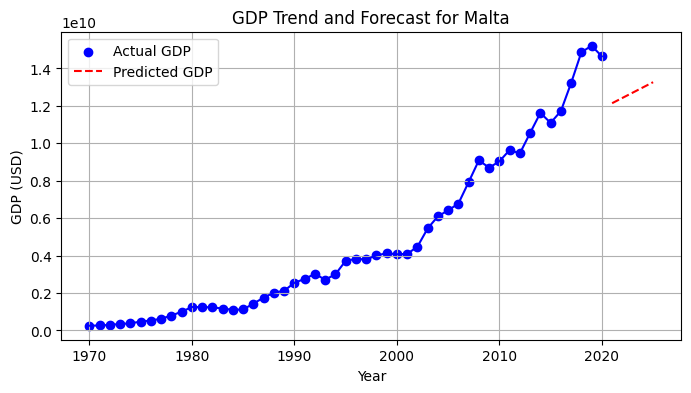

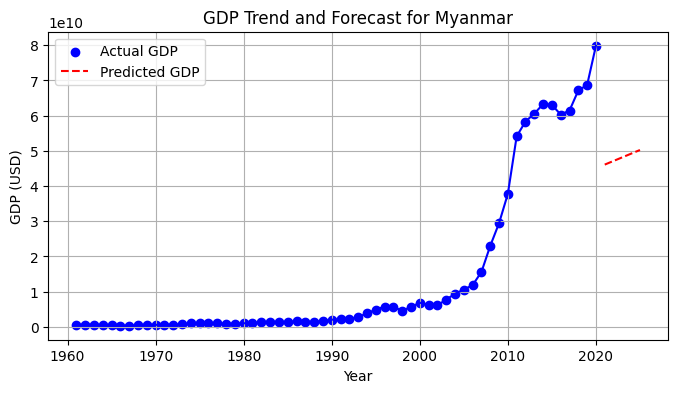

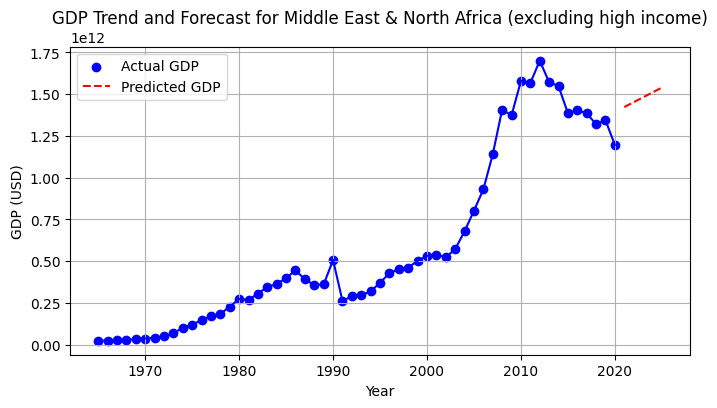

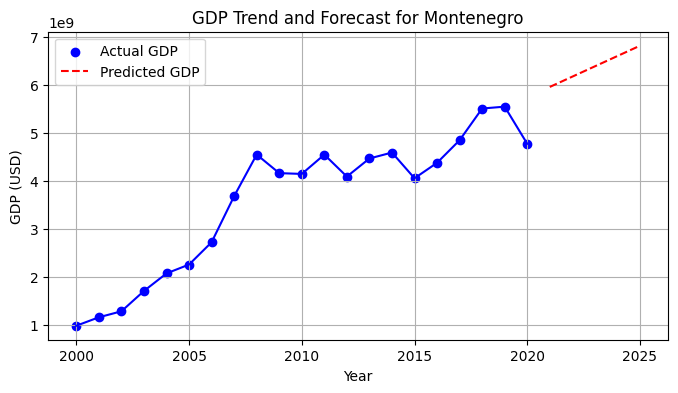

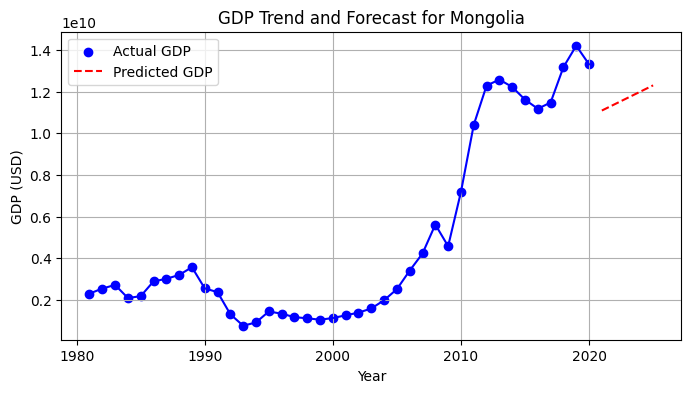

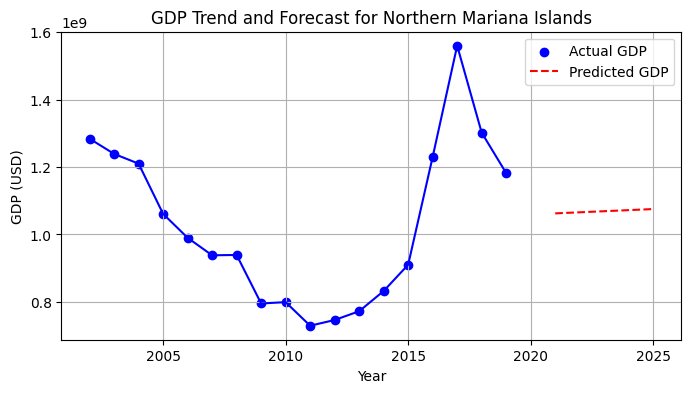

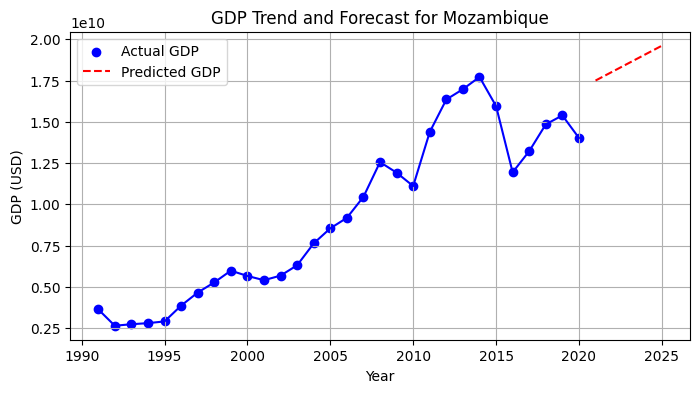

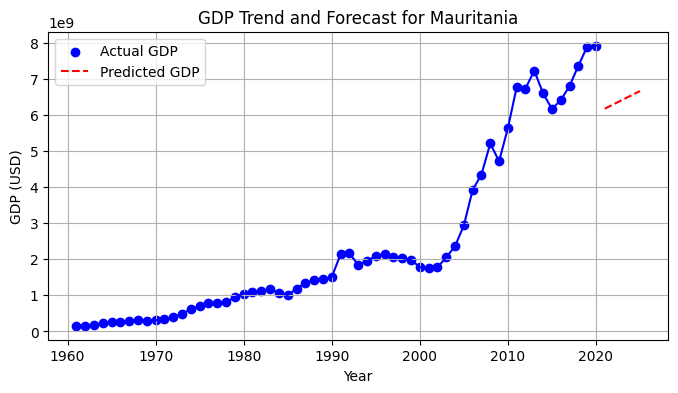

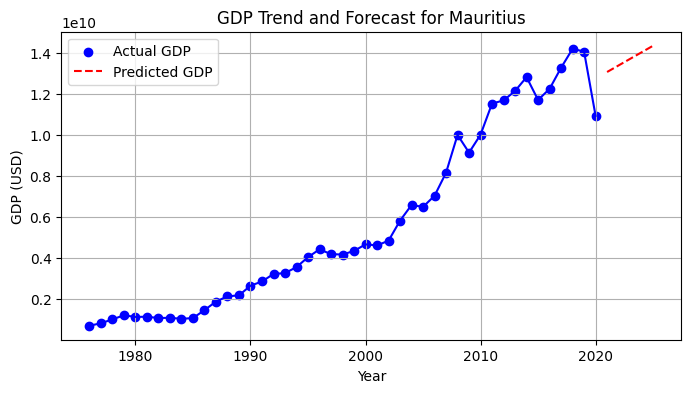

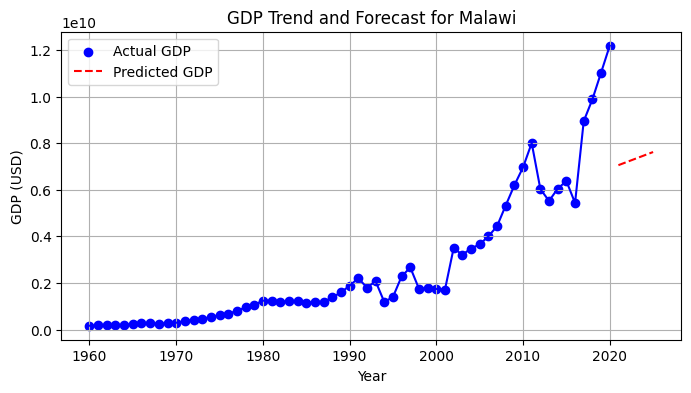

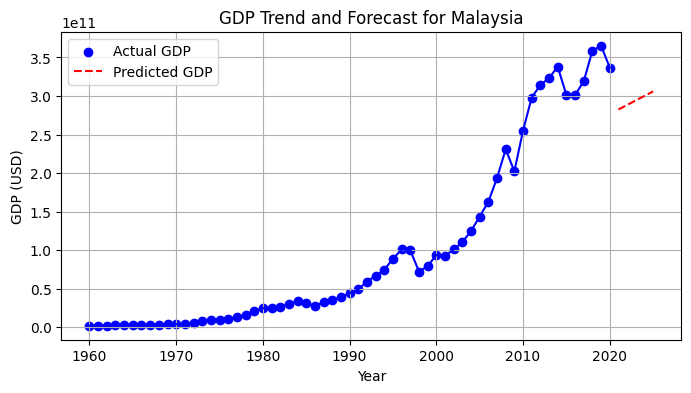

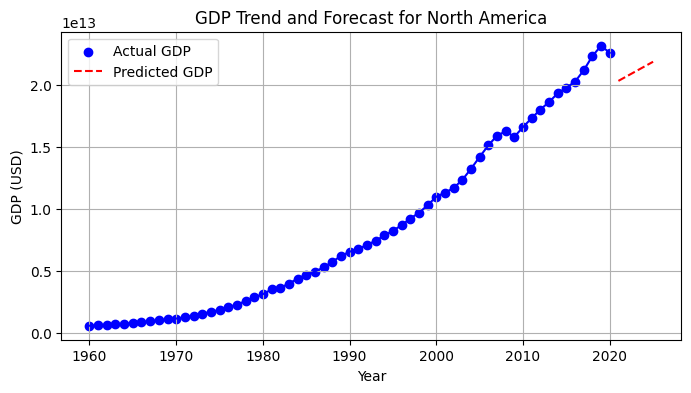

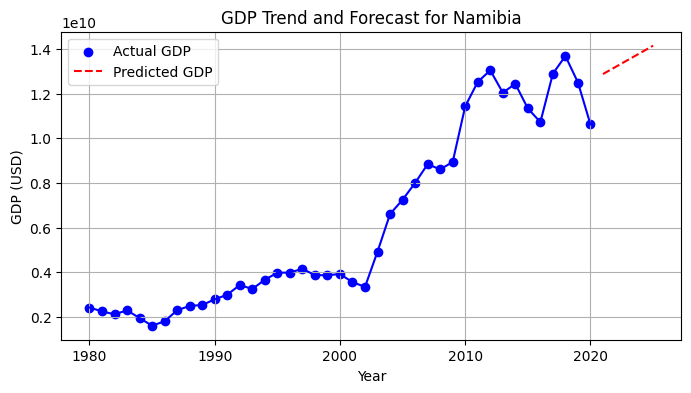

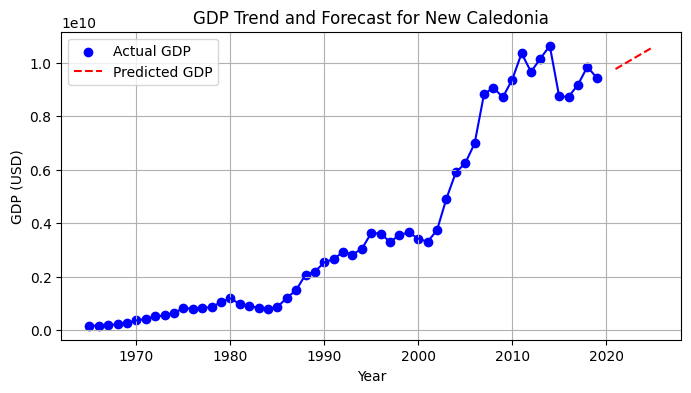

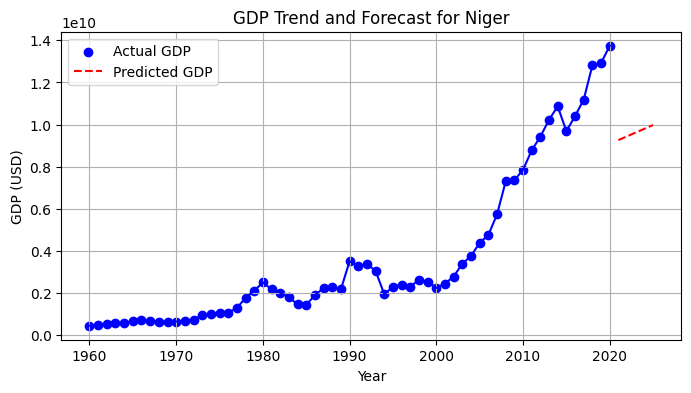

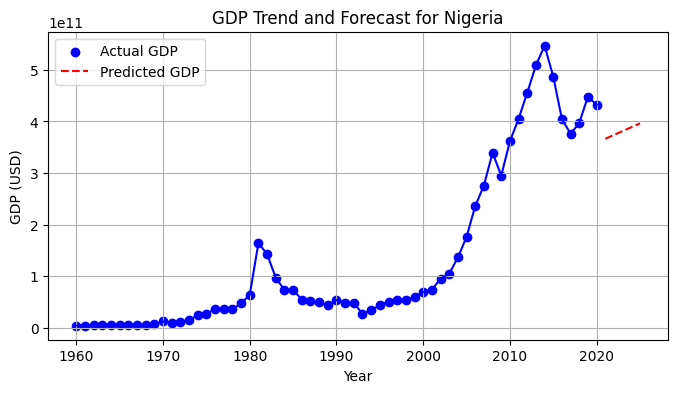

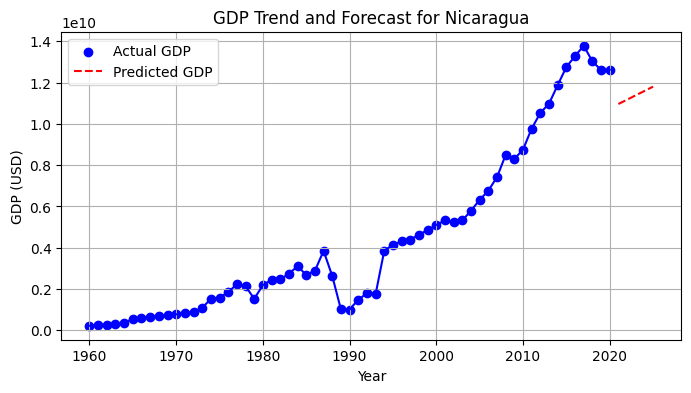

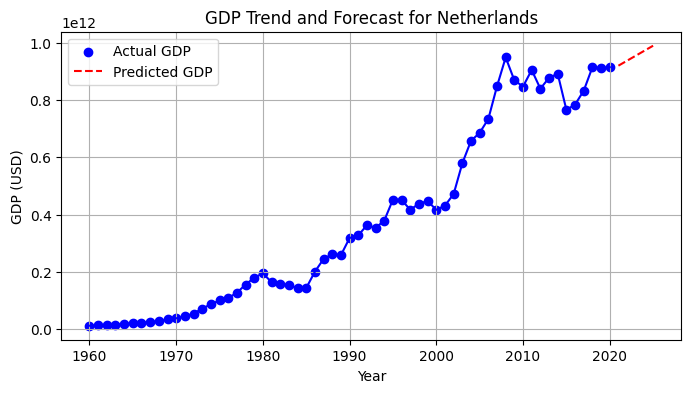

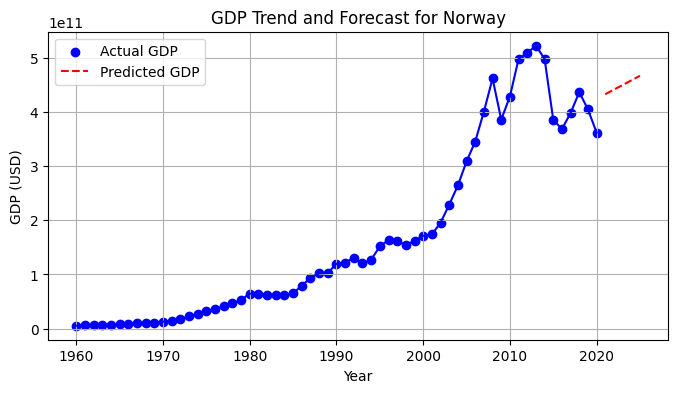

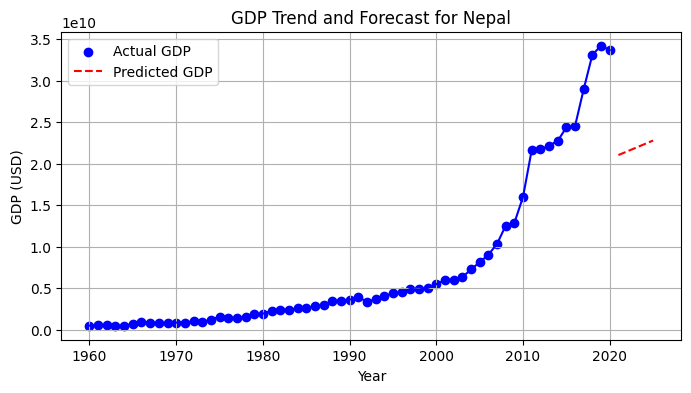

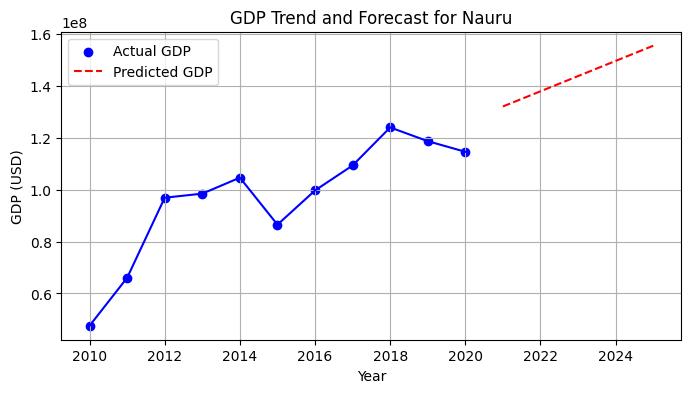

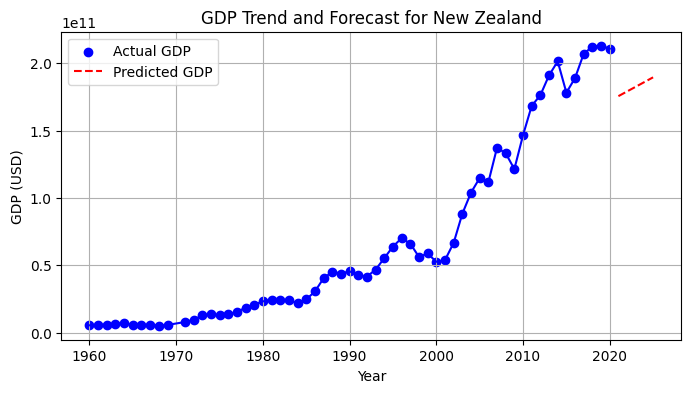

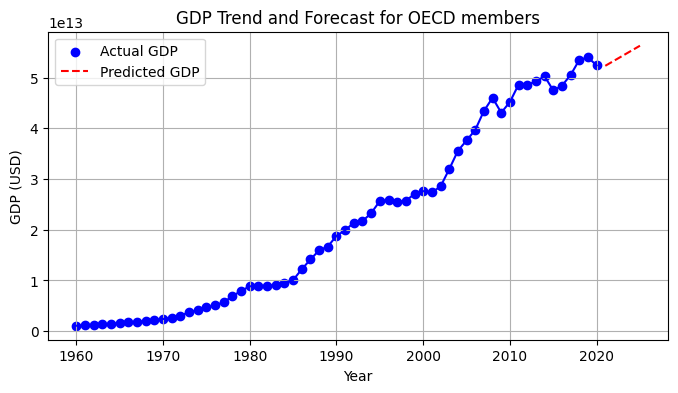

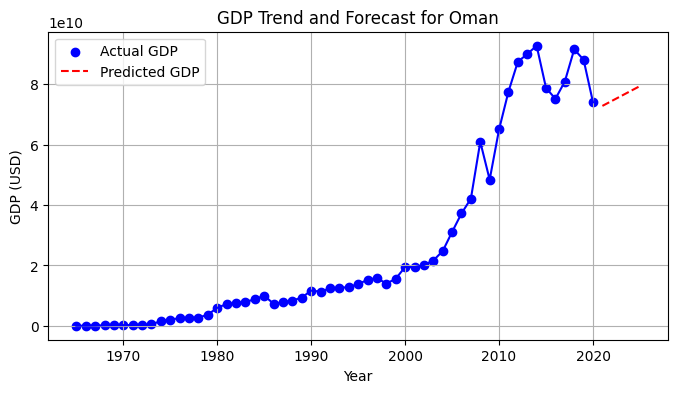

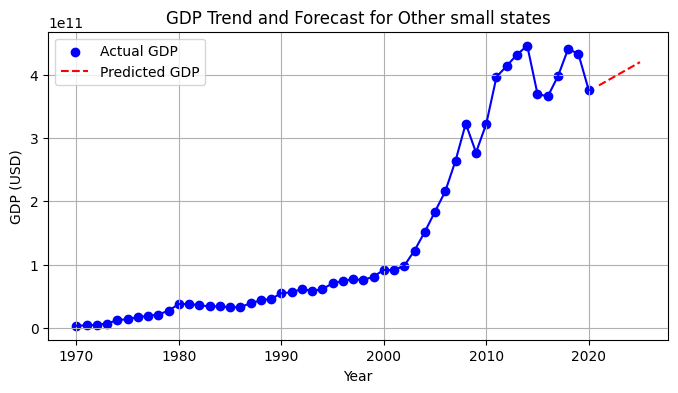

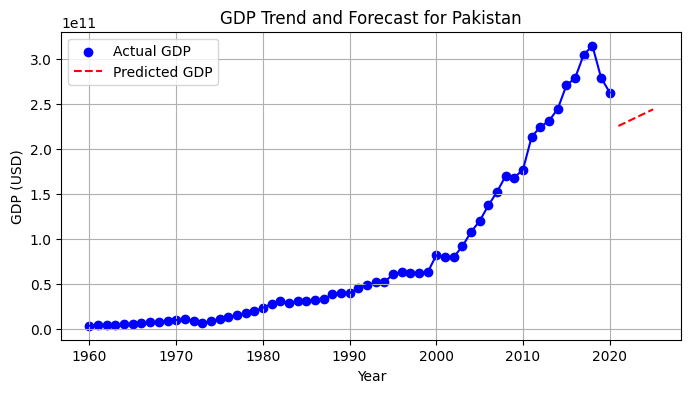

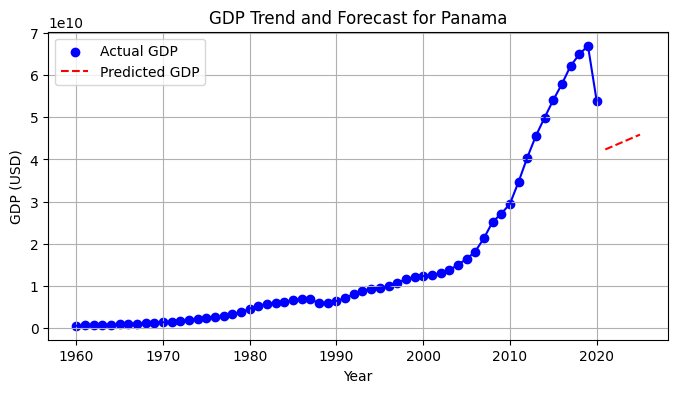

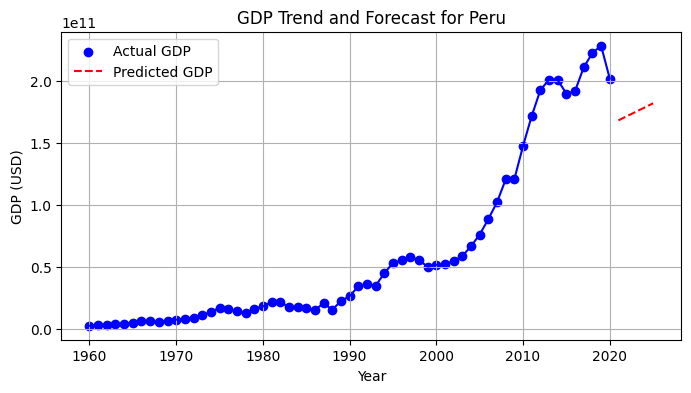

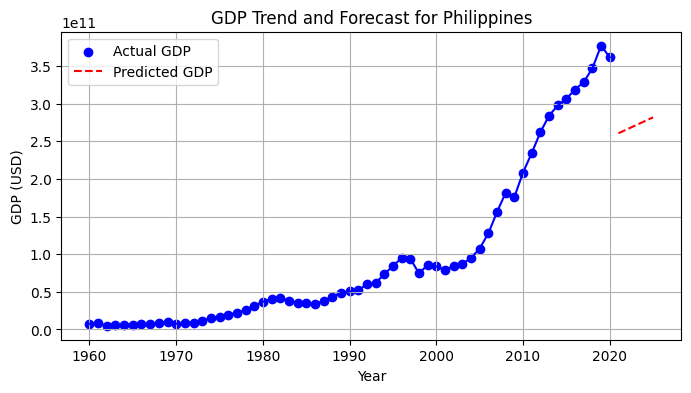

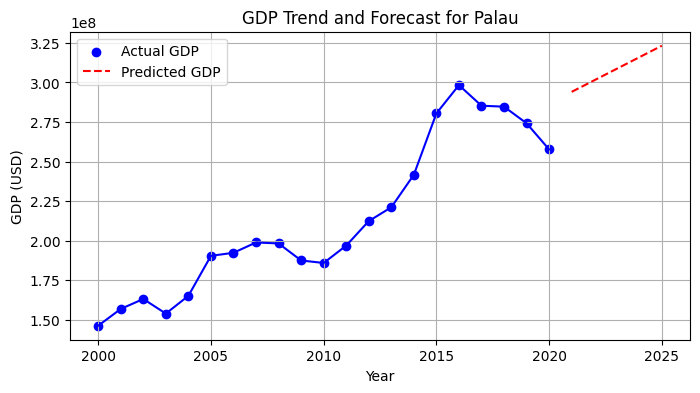

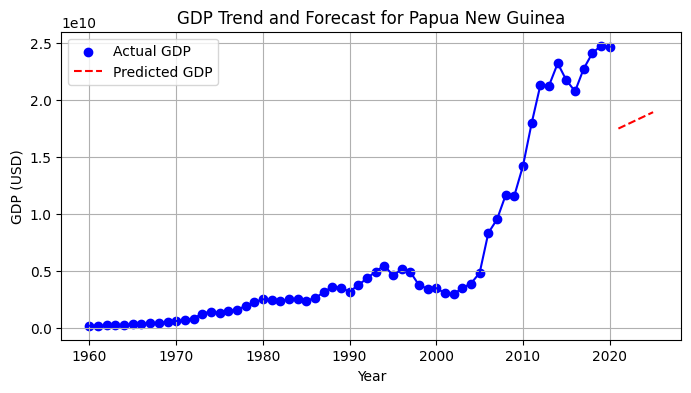

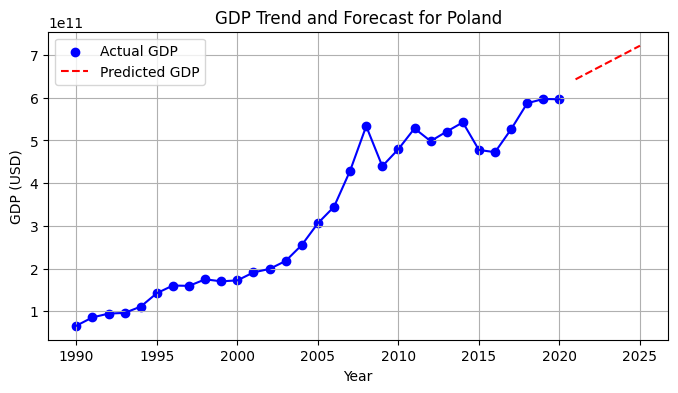

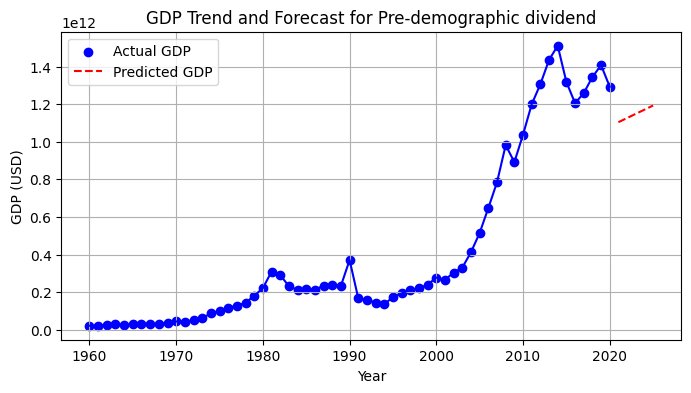

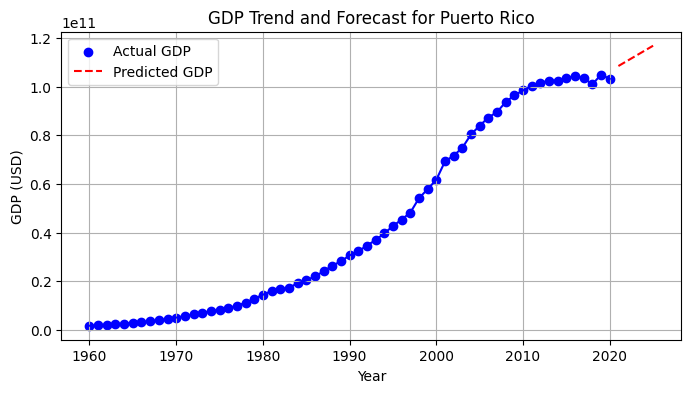

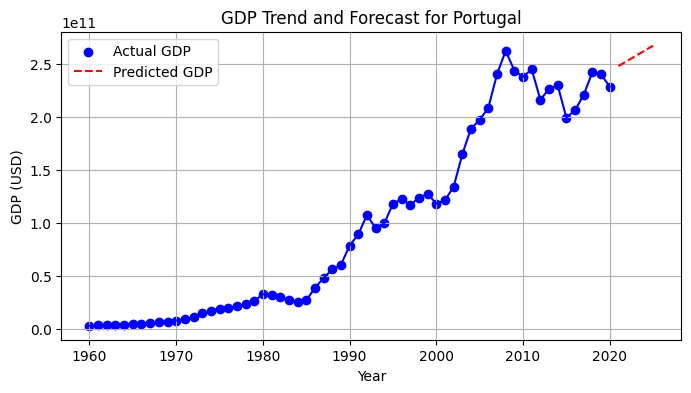

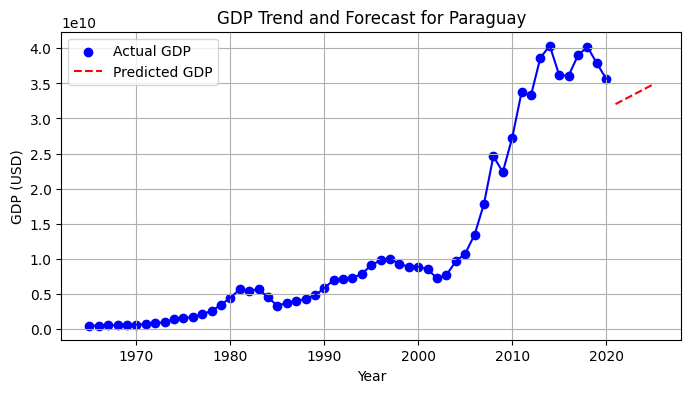

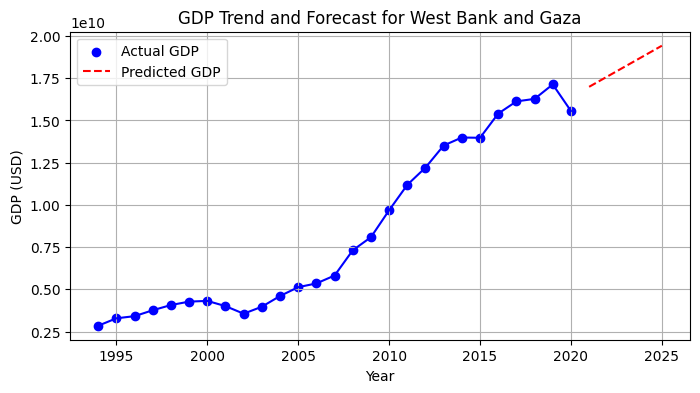

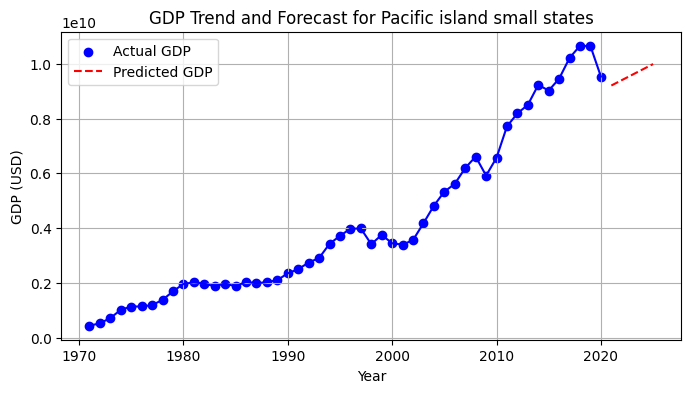

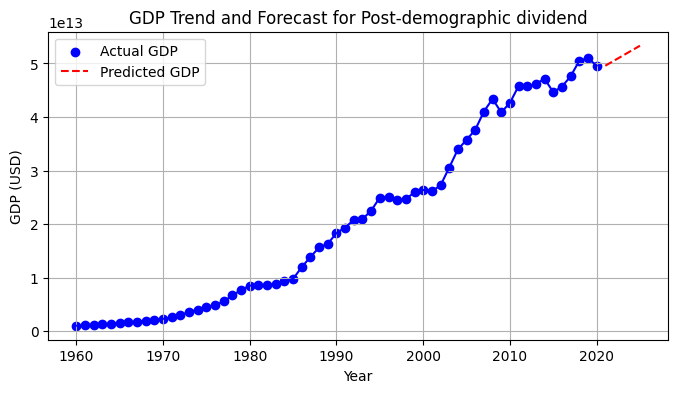

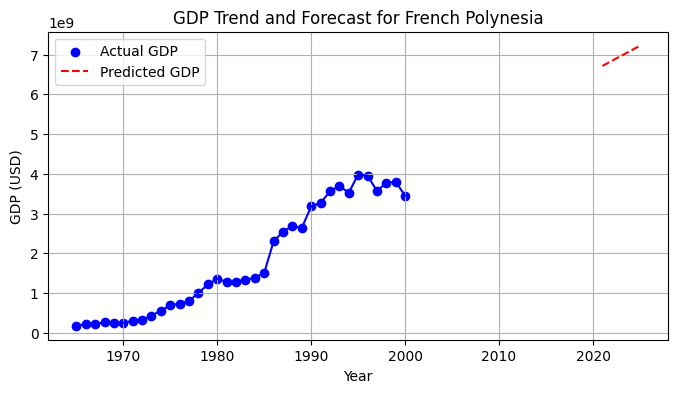

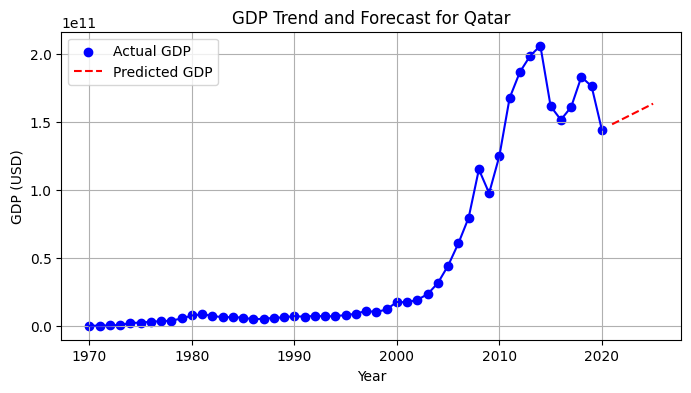

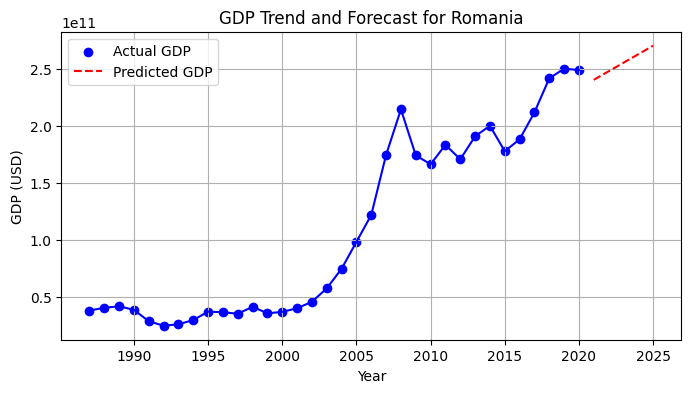

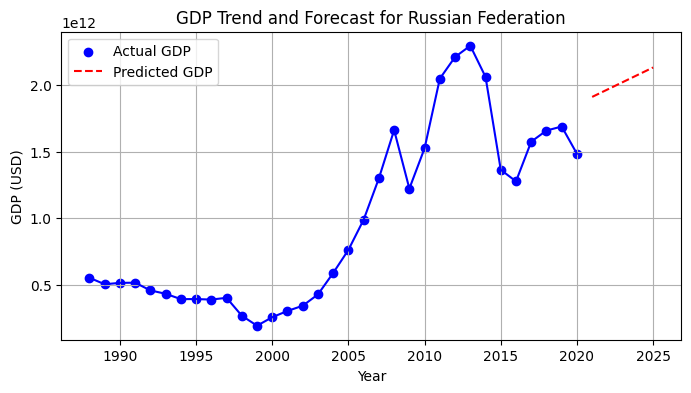

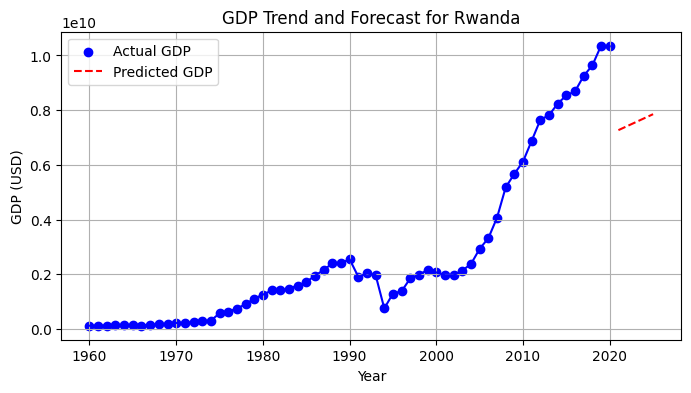

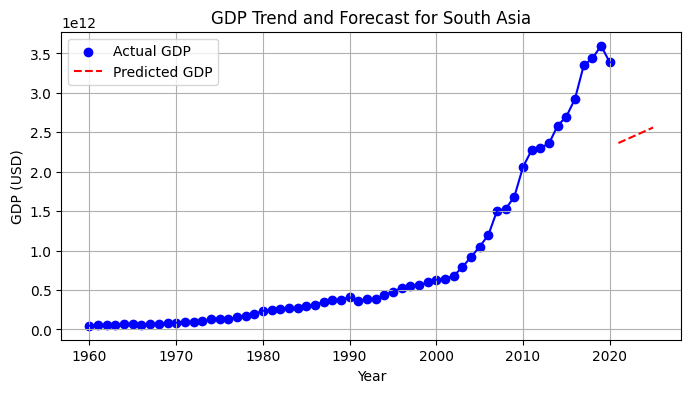

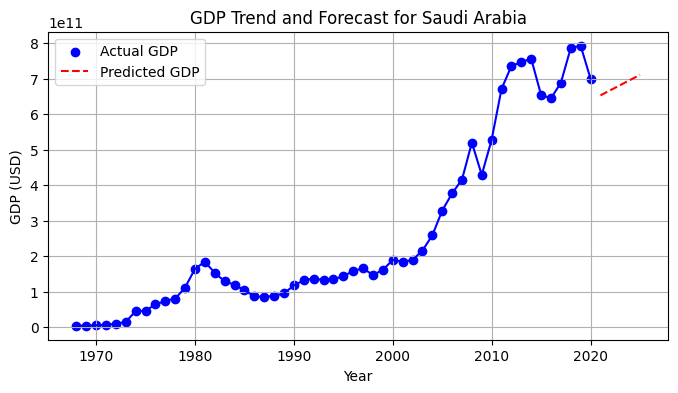

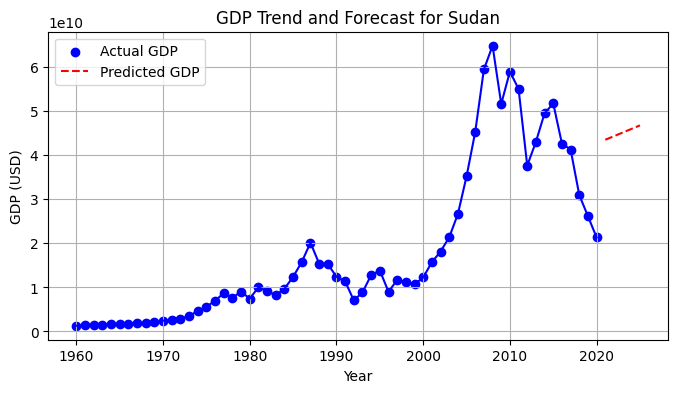

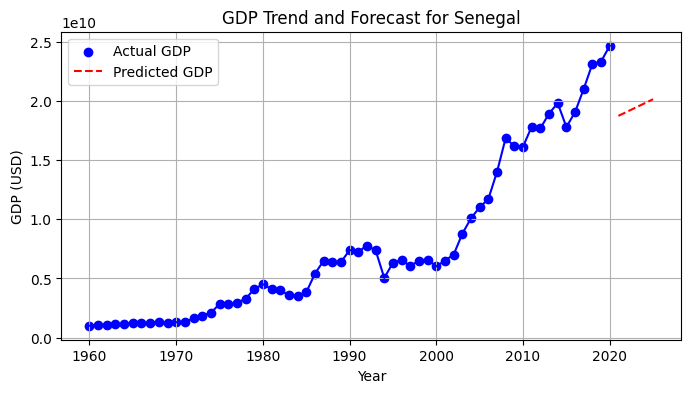

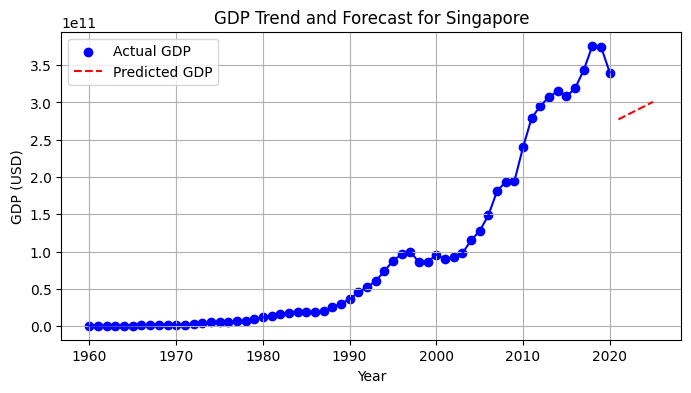

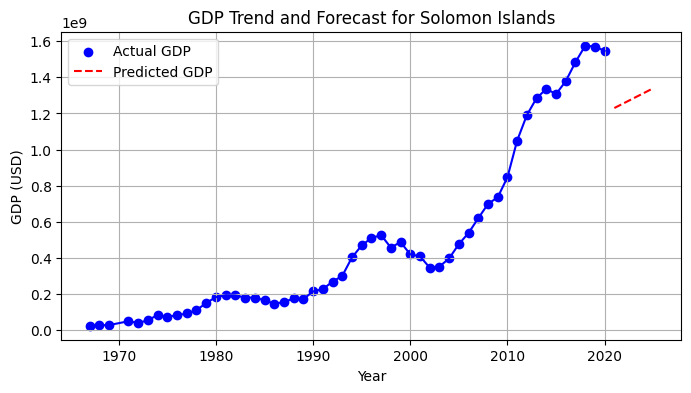

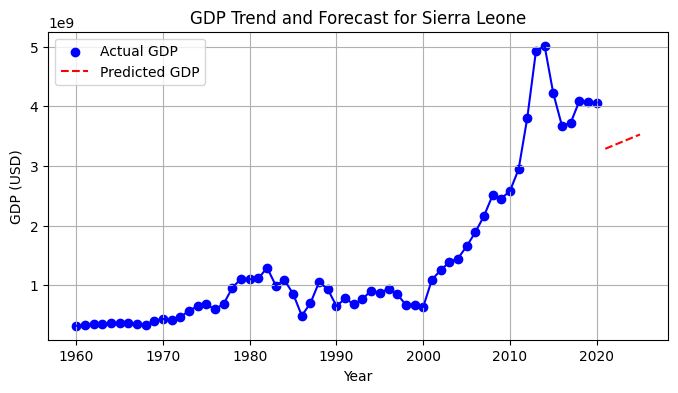

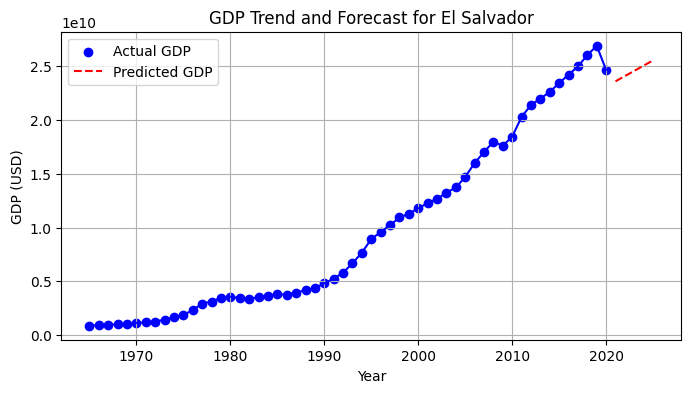

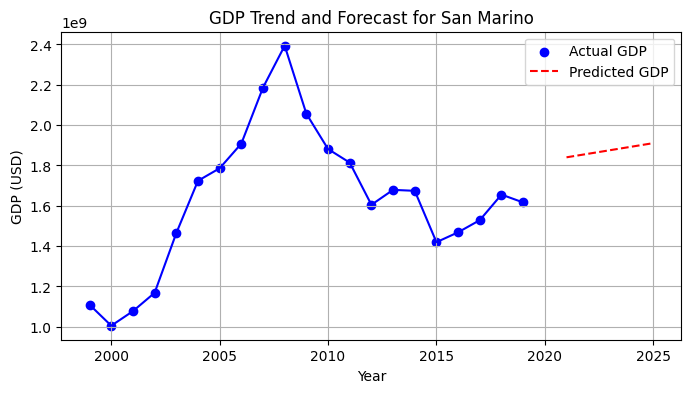

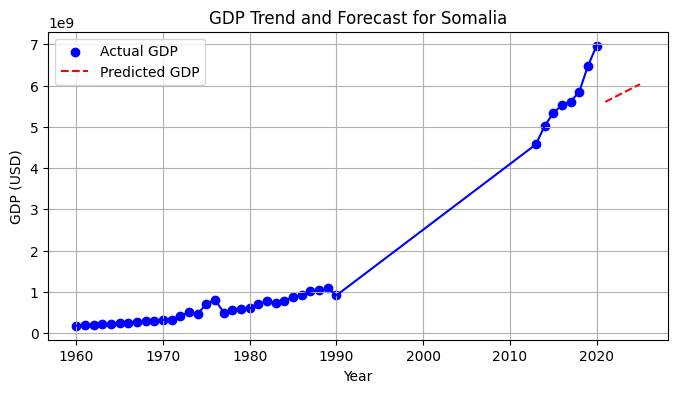

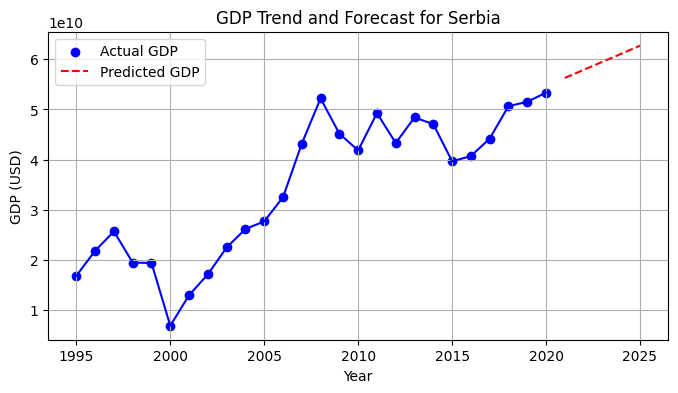

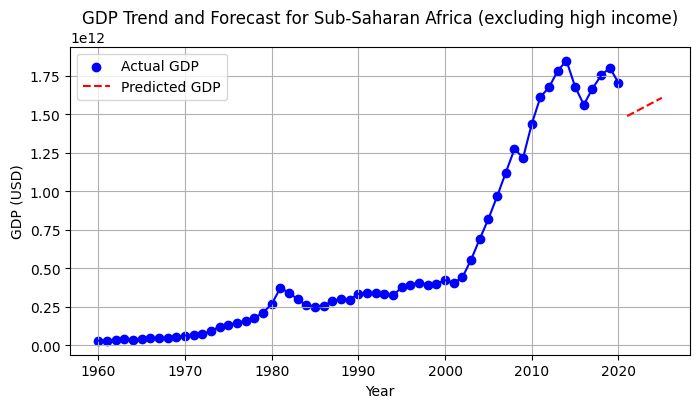

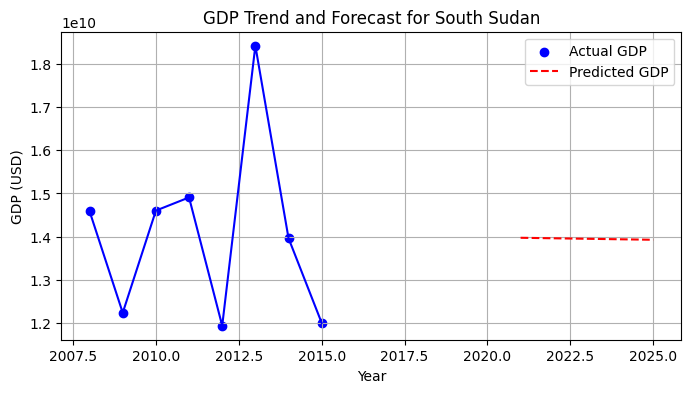

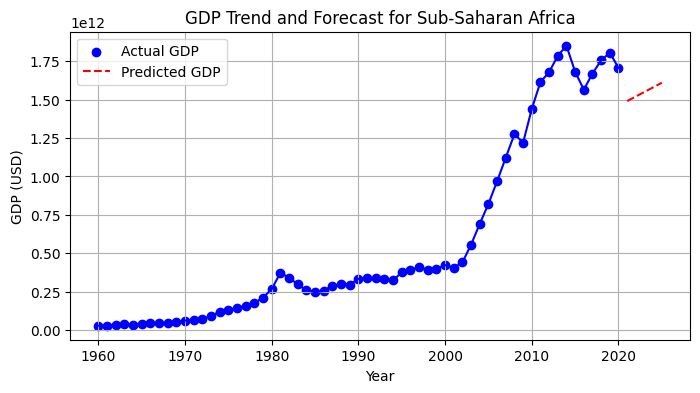

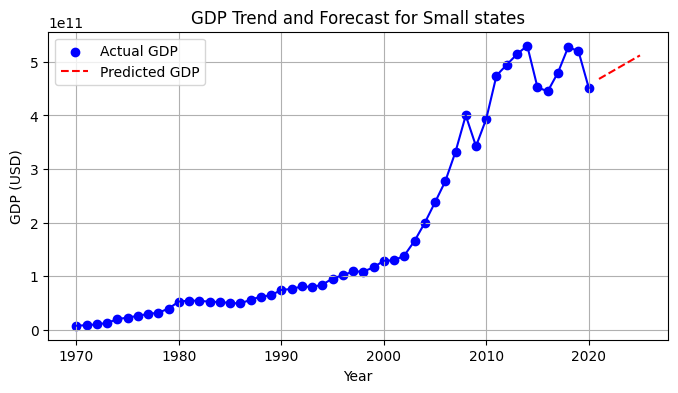

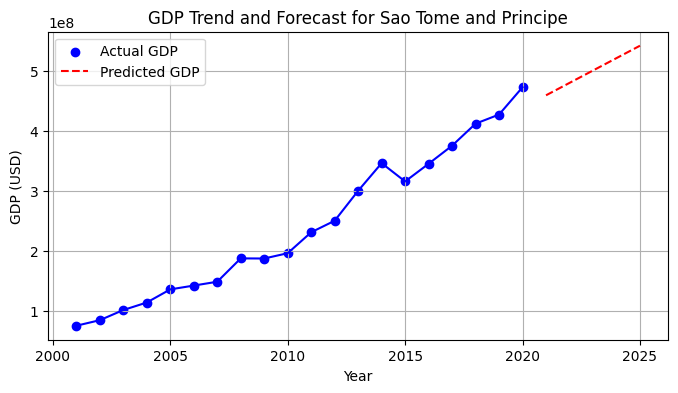

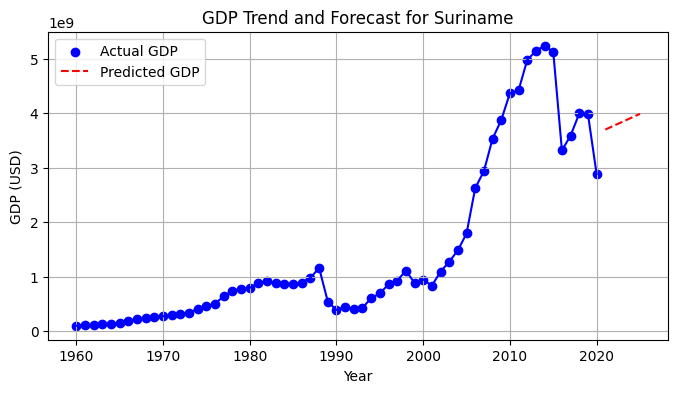

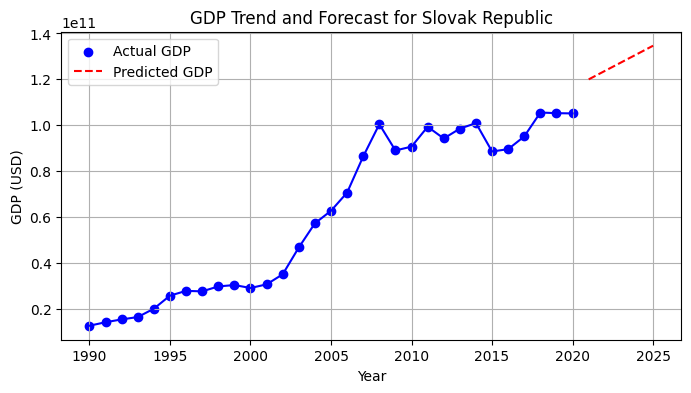

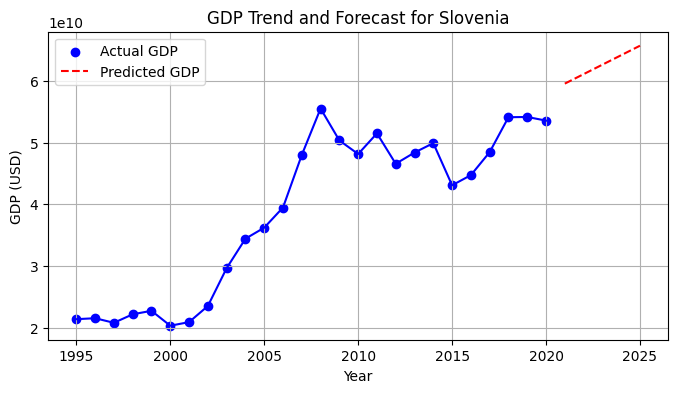

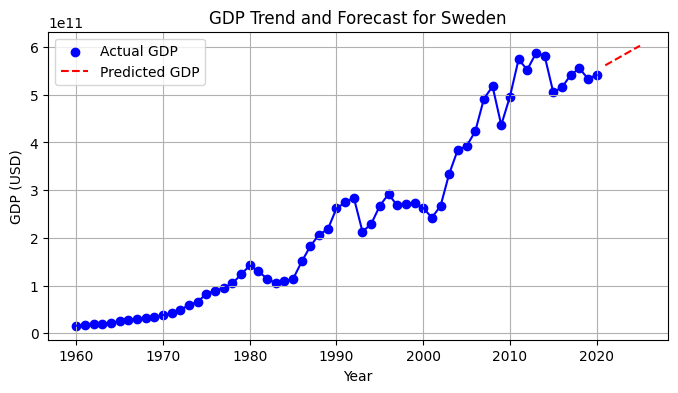

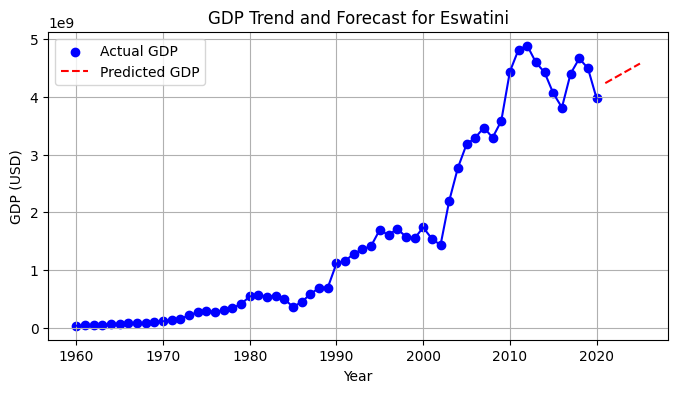

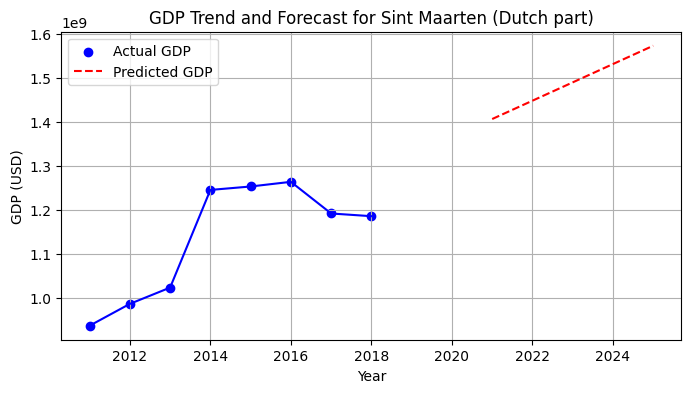

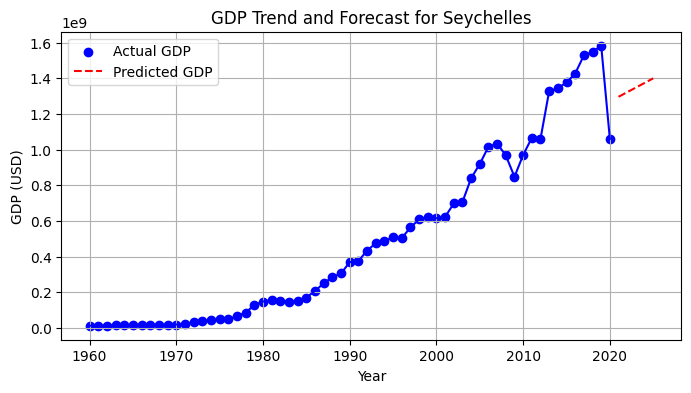

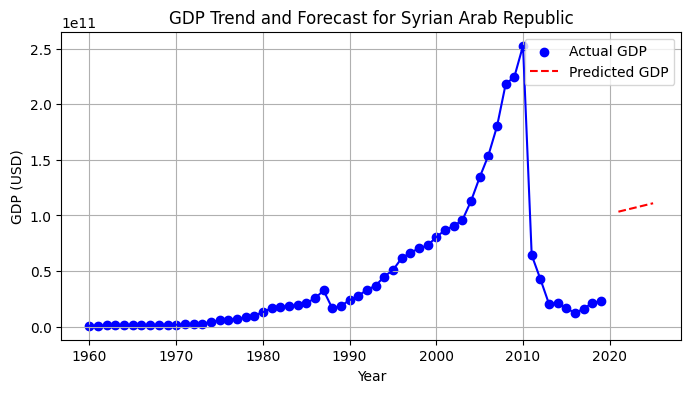

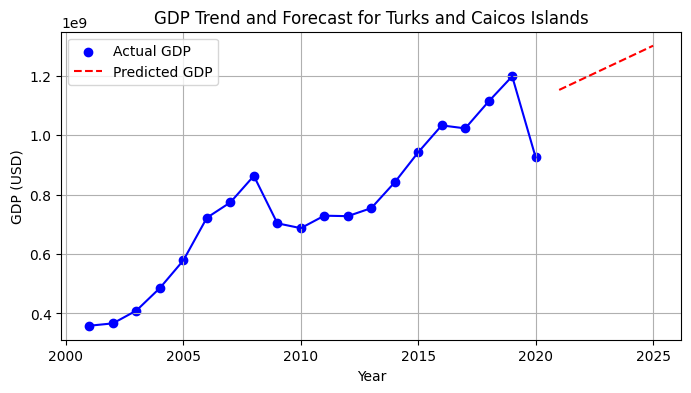

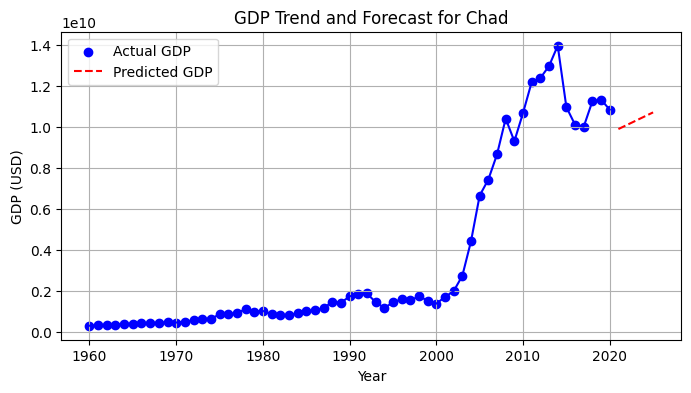

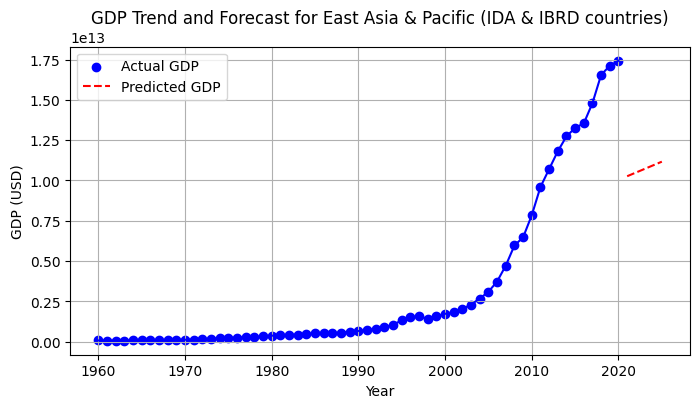

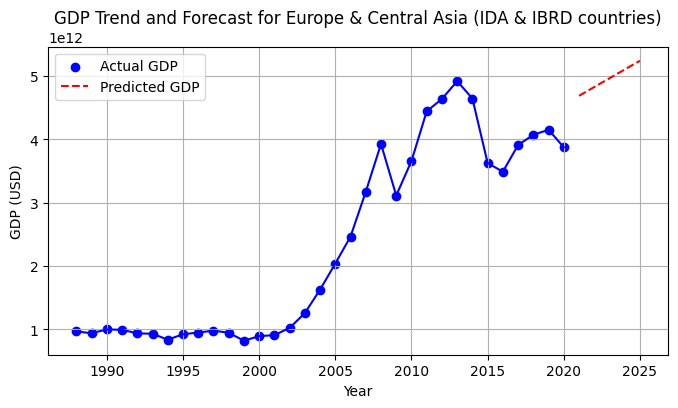

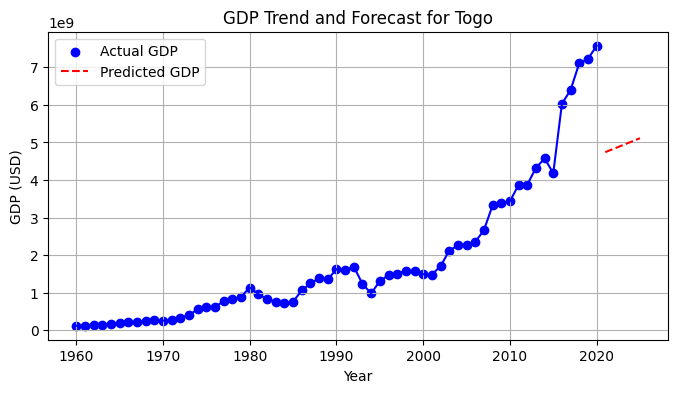

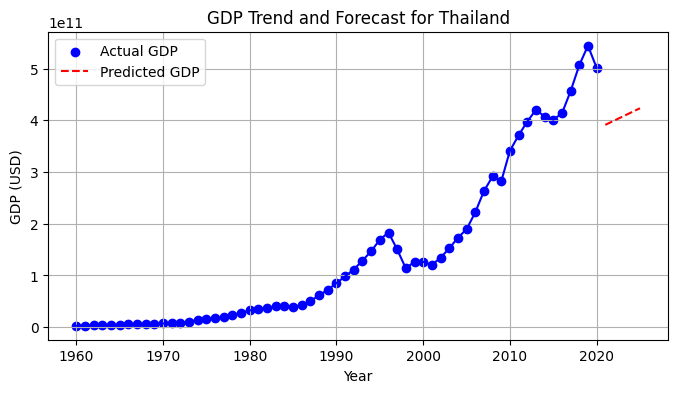

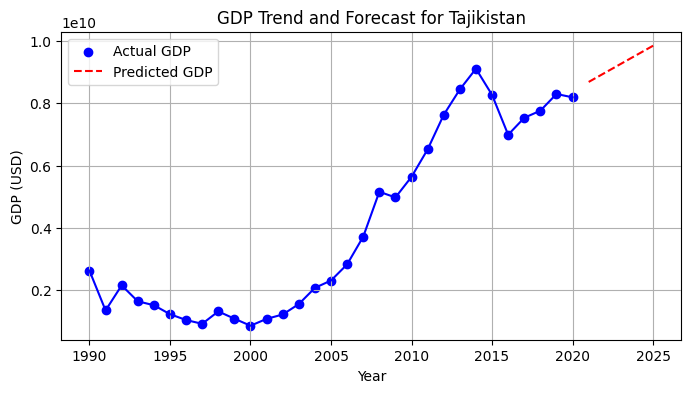

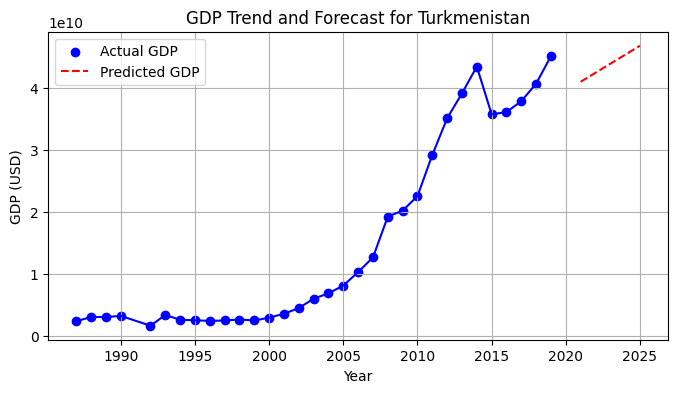

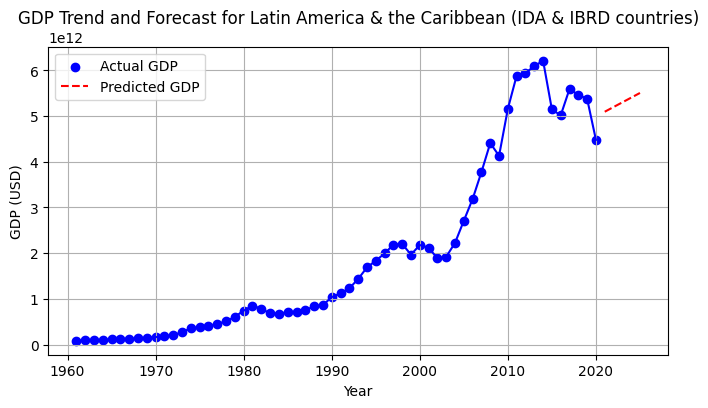

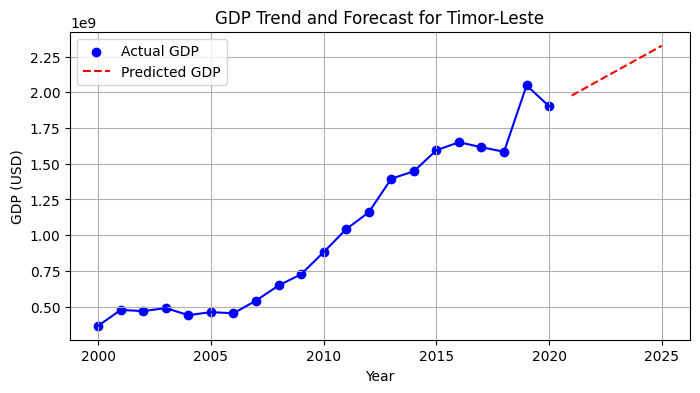

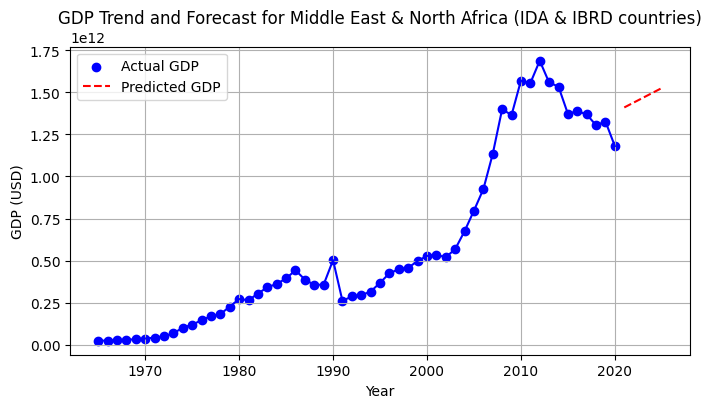

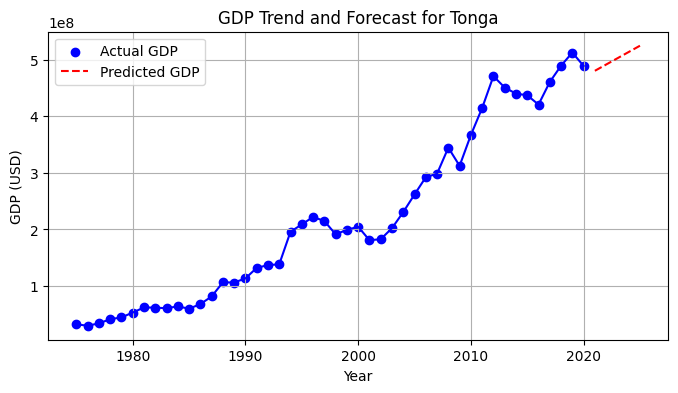

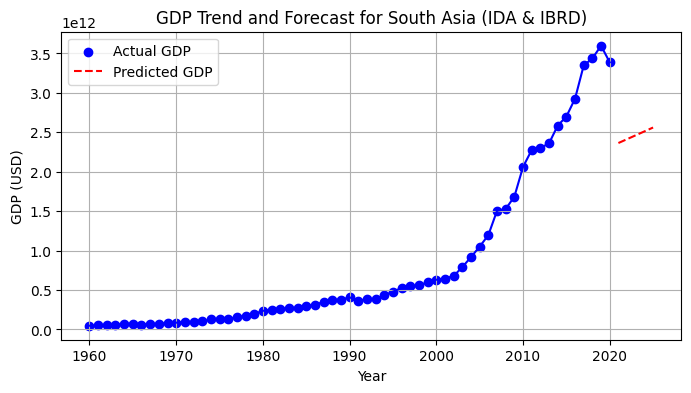

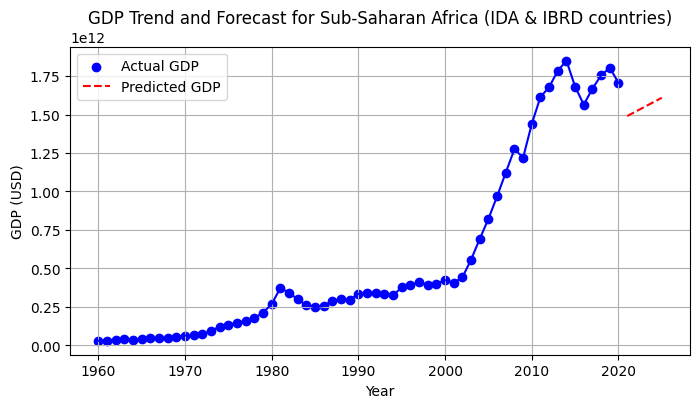

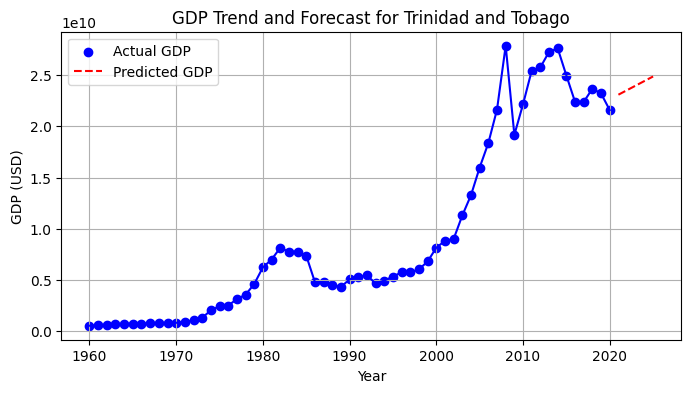

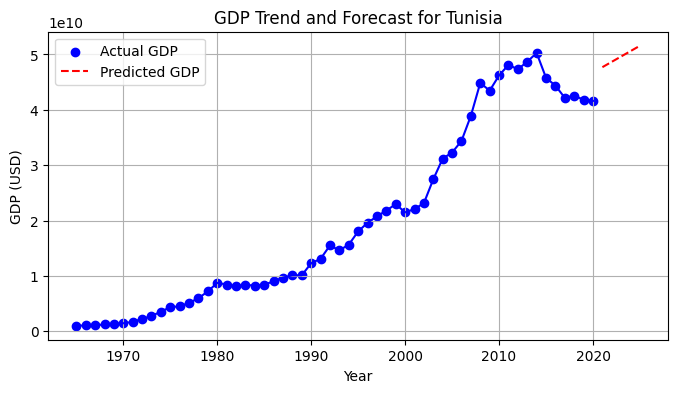

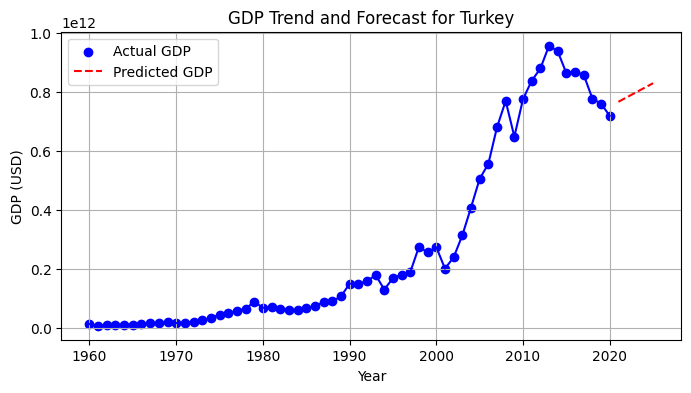

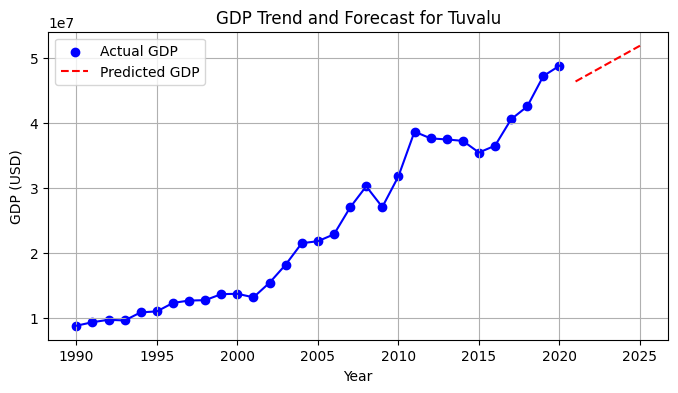

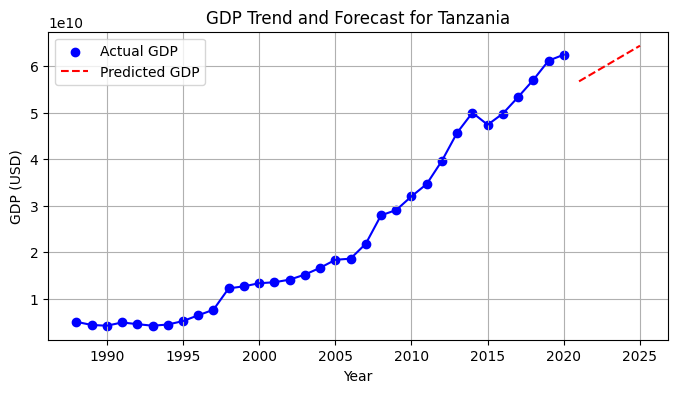

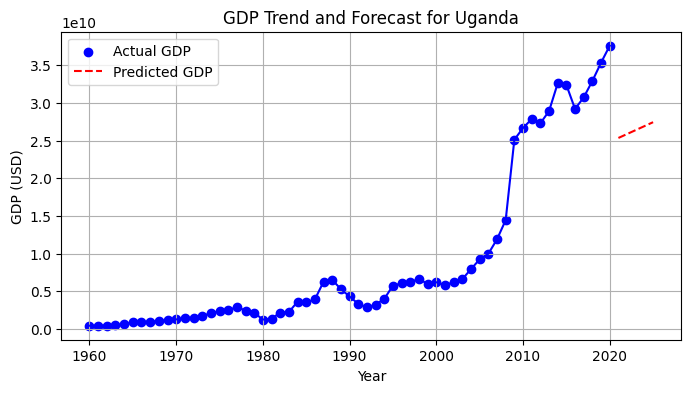

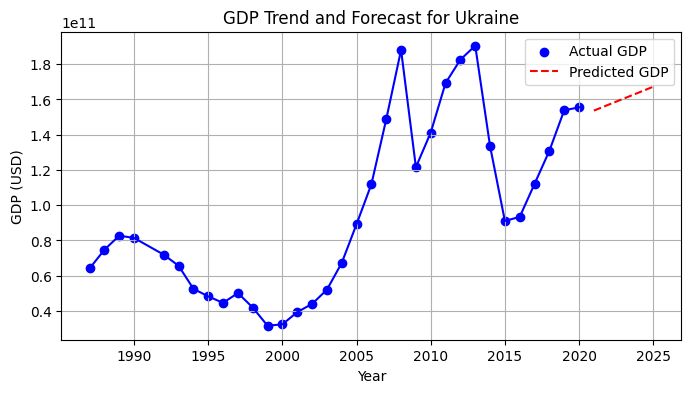

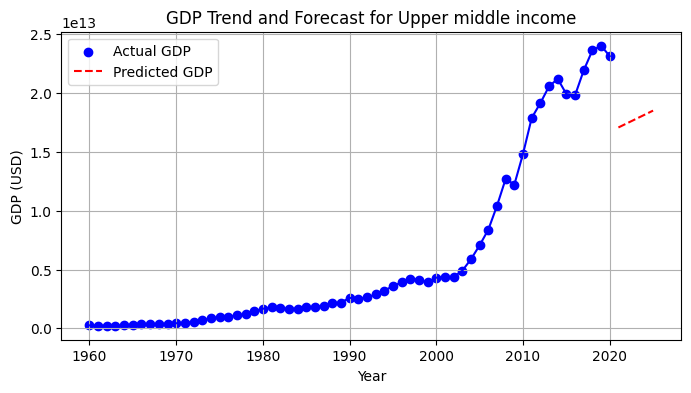

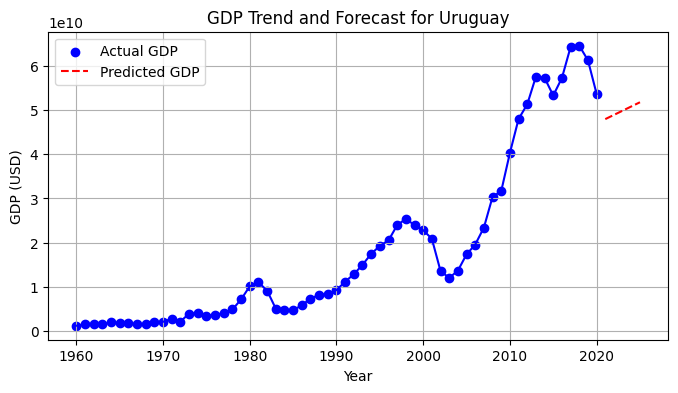

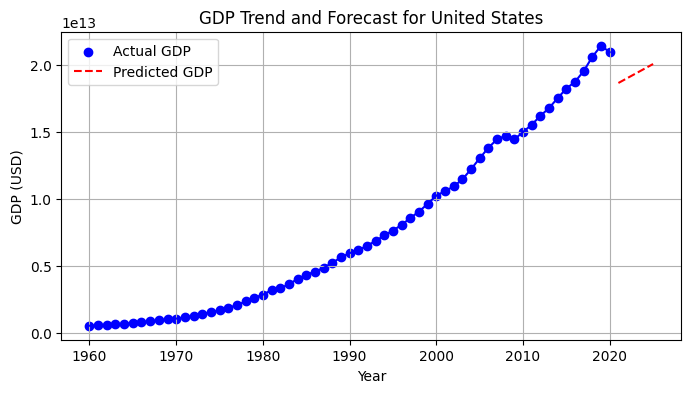

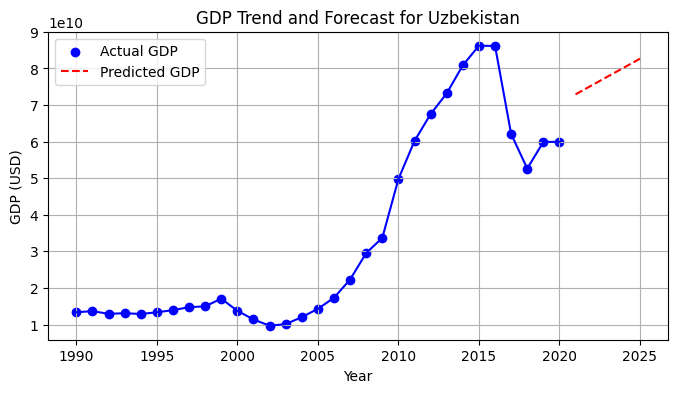

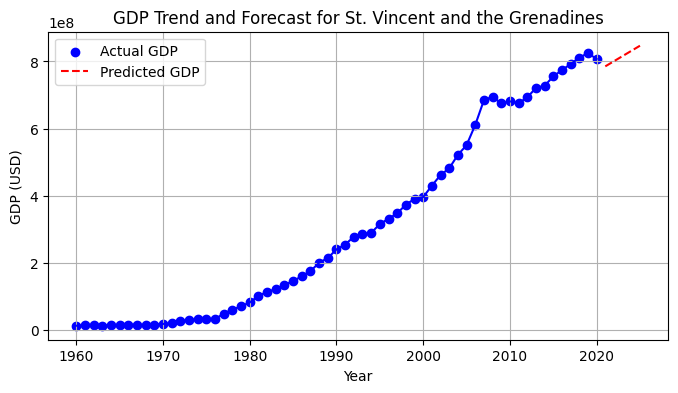

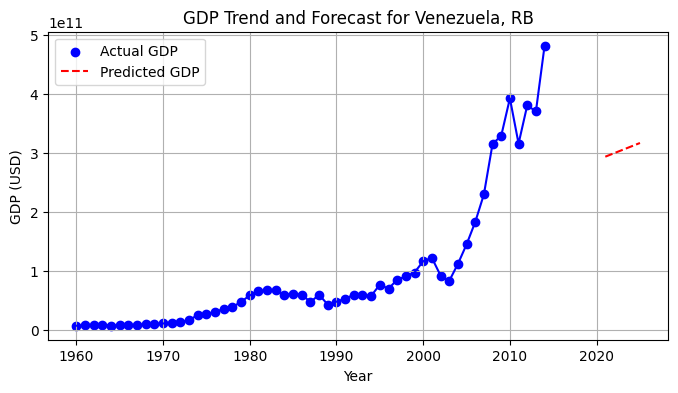

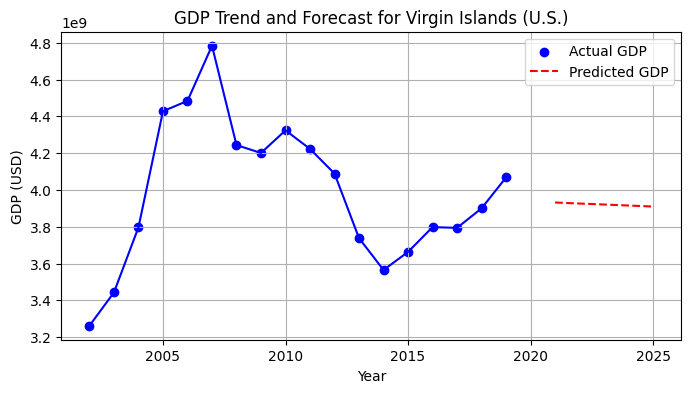

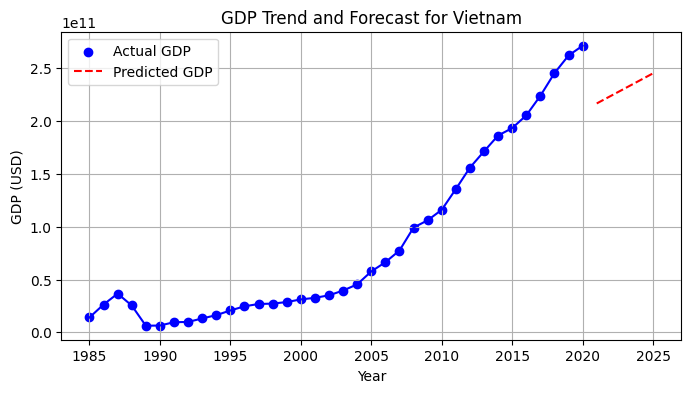

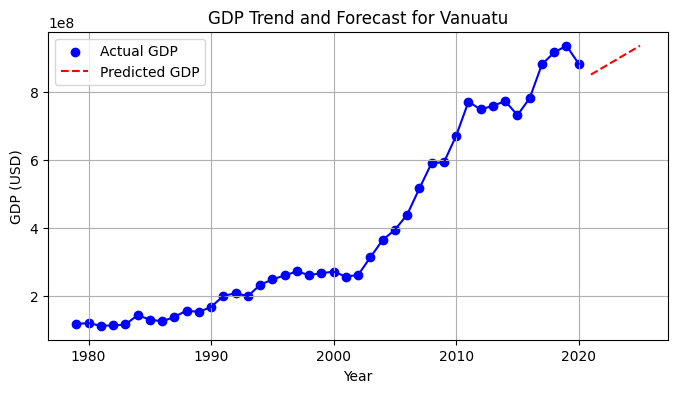

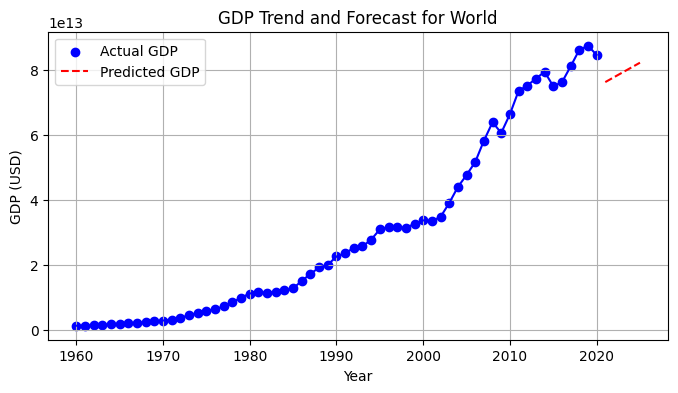

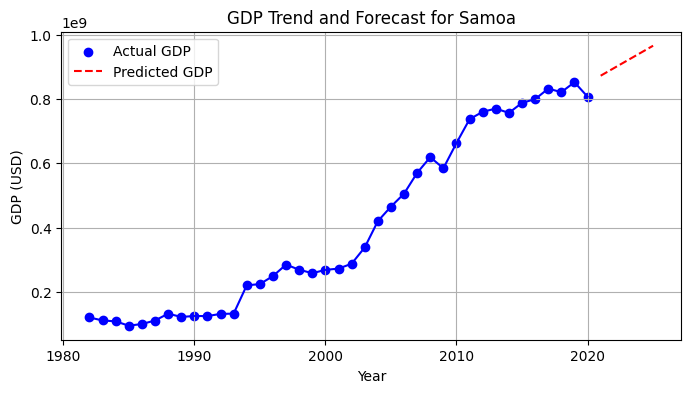

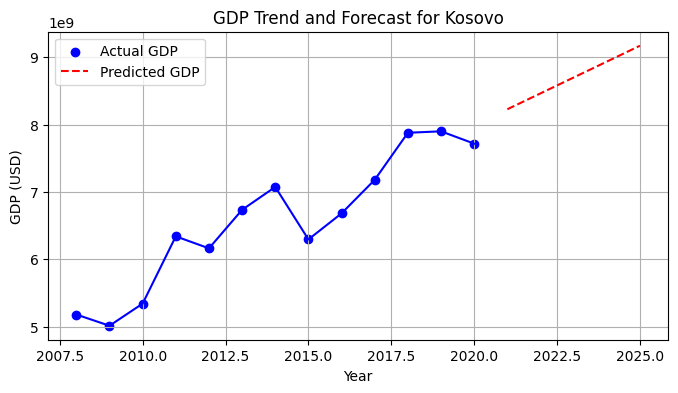

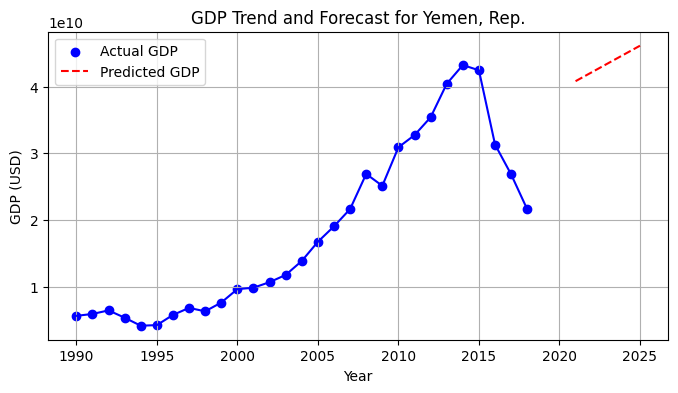

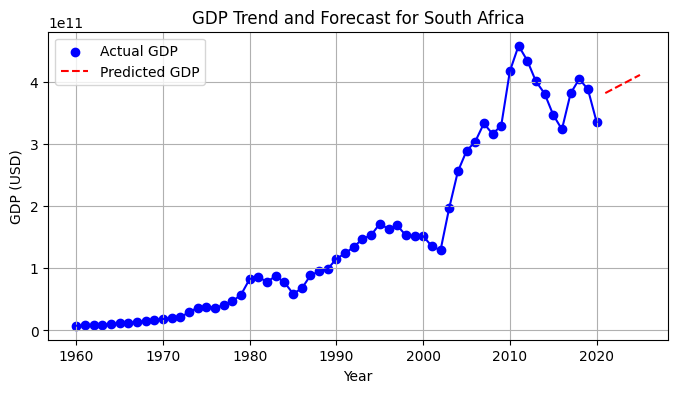

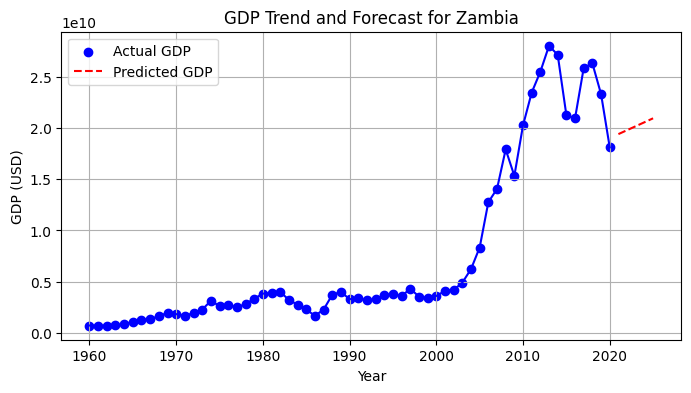

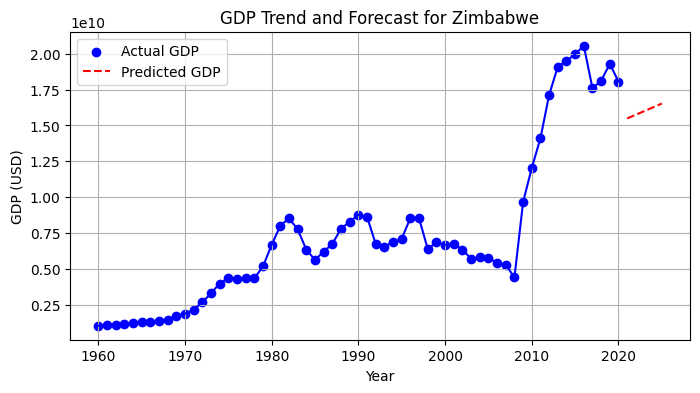

In [14]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = r'C:\Users\Osama\OneDrive\Desktop\BrainyBeam\archive\gdp.csv'
data = pd.read_csv(file_path)

# Get list of all countries
countries = data['Country Name'].unique()

# Prepare year columns automatically
years = np.array([int(col) for col in data.columns[2:-1]])

# Years to predict
future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)

# Store predictions
predictions = {}

for country in countries:
    country_data = data[data['Country Name'] == country]

    # Prepare y values and convert to float
    y = pd.to_numeric(country_data.iloc[0, 2:-1].values, errors='coerce')

    # Remove NaN values
    valid_idx = ~np.isnan(y)
    X_valid = years[valid_idx].reshape(-1, 1)
    y_valid = y[valid_idx]

    if len(X_valid) > 1:  # Proceed only if there are enough data points
        model = LinearRegression()
        model.fit(X_valid, y_valid)

        predicted_gdp = model.predict(future_years)
        predictions[country] = predicted_gdp

        # Plot the GDP trend
        plt.figure(figsize=(8, 4))
        plt.scatter(X_valid, y_valid, color='blue', label='Actual GDP')
        plt.plot(X_valid, y_valid, color='blue')
        plt.plot(future_years, predicted_gdp, color='red', linestyle='--', label='Predicted GDP')
        plt.title(f'GDP Trend and Forecast for {country}')
        plt.xlabel('Year')
        plt.ylabel('GDP (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()


In [15]:
# Print predictions for each country
for country, gdp_values in predictions.items():
    print(f'\nPredicted GDP for {country}:')
    for year, gdp in zip(future_years.flatten(), gdp_values):
        print(f'{year}: {gdp:.2f}')

# Combine all predictions into a single DataFrame
all_predictions = []

for country, gdp_values in predictions.items():
    for year, gdp in zip(future_years.flatten(), gdp_values):
        all_predictions.append({'Country': country, 'Year': year, 'Predicted GDP': gdp})

predicted_df = pd.DataFrame(all_predictions)

# Save to CSV
predicted_df.to_csv('countrywise_gdp_predictions.csv', index=False)
print("\nPredictions saved successfully to 'countrywise_gdp_predictions.csv'")



Predicted GDP for Aruba:
2021: 3528469062.72
2022: 3614396300.61
2023: 3700323538.51
2024: 3786250776.40
2025: 3872178014.30

Predicted GDP for Africa Eastern and Southern:
2021: 858265708641.90
2022: 875212159030.48
2023: 892158609419.07
2024: 909105059807.66
2025: 926051510196.24

Predicted GDP for Afghanistan:
2021: 17490106752.67
2022: 17804904812.28
2023: 18119702871.89
2024: 18434500931.50
2025: 18749298991.11

Predicted GDP for Africa Western and Central:
2021: 632140126078.34
2022: 644919634845.65
2023: 657699143612.96
2024: 670478652380.27
2025: 683258161147.57

Predicted GDP for Angola:
2021: 109851177555.08
2022: 113046030335.59
2023: 116240883116.09
2024: 119435735896.60
2025: 122630588677.10

Predicted GDP for Albania:
2021: 15329125770.77
2022: 15773697018.87
2023: 16218268266.96
2024: 16662839515.06
2025: 17107410763.15

Predicted GDP for Andorra:
2021: 3757081597.41
2022: 3839701471.05
2023: 3922321344.69
2024: 4004941218.34
2025: 4087561091.98

Predicted GDP for Arab 